# 1. Introduction

This is the predictive modelling element (part 2) of a report which aims to identify and analyse data pertinent to answering the question of whether there is a relationship between the weather and traffic collisions in the city of New York - and if so - to explore the nature of that relationship.

Here, the datasets produced in part 1 of this report will be used for linear regression and deep neural network (DNN) modelling, in an attempt to identify correlations between data features and collisions.

# 2. Methodology

The purpose of the following data modelling is to create predictive models for collision numbers based upon the features of the imported pre-prepared datasets. This document is divided into two main subsections: Linear Regression Modelling and Deep Neural Network (DNN) Modelling.

Once produced, the models will also be tested against the sample test data that is likewise imported from part 1 of this report.

Judgement as to whether a linear regression or DNN model is considered to have 'good' predictive potential is based both upon the value of its Root Mean Square Error (RMSE) score, and whether its RMSE score betters (is lower than) that of a 'Mean Model'.

An RMSE score of below 0.1 is considered here, for the purpose of this report, to exhibit 'good' prediction potential.

## 2.1 Linear Regression Modelling

For the linear regression model, every possible combination of the weather and temporal features from imported datasets will be modelled, with the model run 5 times (each time with newly shuffled data of randomised order). 

The model 'learns' patterns during the 'training' phase, then makes predictions for a separate set of unseen data in the 'validation' phase. The datasets are split into these 'training' and 'validation' sets during model configuration (here, the split will be 80% of the dataset for training and 20% for validation).

One additional smaller dataset is reserved for testing the model's performance on data that was unseen during both the training and validation phases. This is used to mitigate issues whereby a model may be optimised to perform so well on the validation data that it is, in fact, 'over tuned' to predict patterns that may be inherent only to the training and validation data. Such scenarios, in essence, 'over fit' the model.

Machine Learning practitioner Dr Brownlee summarises the differences between these datasets thus:

> - Training Dataset: The sample of data used to fit the model.
- Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
- Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

(Brownlee 2020).

Each model is run here 5 times. Following each model run, its RMSE is calculated (RMSE will be further defined later in this document).

The median of those 5 RMSE results, for each combination of features (predictors), is calculated and recorded. For the sake of brevity, the results of each model run are tabulated in the full results text files only if the median RMSE for the 5 runs of the model is under 1.0. A value higher than 1.0 suggests the model performs poorly (albeit based over only 5 model runs). All median RMSE results are, however, recorded and tabulated.

For each model run, a "Mean model" is also calculated. The Mean model reflects the RMSE btween the collision values in the validation data and the mean value of total collisions in the training data (i.e., the sum of all normalised collision values in the training data, divided by the number of data points (dates)). 

The RMSE of the linear regression model should be 'better' (lower in value) than that of the Mean model, to indicate that the regression model is working as a better predictor than simply using a line of best fit as proposed by the Mean model.

Models are then tested using the imported test sample datasets, to determine how well they perform on new data that was not used for training or validation.

This may serve to detect aforementioned 'over-fitting' to the training data, which can happen when a model accurately predicts relationships intrinsic to the training and validation data, but which do not translate to new, unseen data.

The test datasets are small (mostly only 10 rows of data), owing to the relatively small size of the orginal datasets. This renders the test results highly susceptible to 'noisy' and 'bad' data, such as outlier values. The test is run once for every model run, with the RMSE between the prediction and the real (normalised) value calculated each time. The median of the test RMSE values is then calculated, to compare against the median RMSEs for the validation data, which was obtained during the model's train and validate phase.

To illustrate method, an example of the linear regression modelling process will be stepped through and described in detail for the modelling of the first predictor of the dataset `2013 to 2018` [`linear_1.csv`], modelling the predictor of day of week [`day`]. This will occur in subsection 3.1.1, below, and serves to demonstrate process.

Thereafter, linear regression modelling will proceed in the same way for all datasets and predictor selections, using a semi-automated linear regressor process, the code of which was authored for this purpose and is included below (in runnable state).

For the sake of brevity, the modelling process will not be elaborated each time, but results will be recorded in tabular form for each dataset and uploaded in full to Github.com, from where they will be linked to below (Github Inc. 2021). A ranked table of median RMSE results over the 5 model runs will be presented in the subsections below that are dedicated to each dataset.

An overview of results for all datasets will finally be discussed in the 'Linear Regression Modelling - Results Discussion' subsection (3.7).


## 2.2 Deep Neural Network (DNN) Modelling

The DNN modelling will largely use the entire set of features per dataset - however removal of specific features and 'classes' of features will also be modelled. The process will, in essence, work in the same way as the linear regression modelling, by using a semi-automated modelling process, the code of which is included below (in runnable state). 

Modelling for each dataset with given configuration parameters will be conducted 5 times, with the median RMSE of all 5 runs calculated, as per the Linear Regressor process detailed above. Training, validation and test data is defined and used in exactly the same way as described for the Linear Regression modelling.

For brevity, and because the code for the modelling process functions very similarly to the linear regression modelling, the precise process will not be stepped through again as it was before. Results will again be tabulated and discussed in subsections for each of the three imported datasets for DNN modelling. 

Further details regarding the precise configurations of the modelling for each dataset is outlined in the section "DNN Modelling - Process Overview (4.1)".

# 2.3 Results & Outcomes

Following the Linear regression and DNN modelling, the report will be concluded with a summary of modelling outcomes. An attempt will be made to use the findings to answer the question this report in designed to address; namely whether there is a predictive relationship between weather and traffic collisions in the city of New York.

# 3. Linear Regression

The linear regression modelling will now be configured and run using the TensorFlow technology (imported below as a python package) (TensorFlow 2021). 

For this modelling, TensorFlow will be configured to use the 'Adam Optimisation Algorithm'.

The Adam Optimisation Algorithm is, as described by machine learning practitioner and author Jason Brownlee PhD, "an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing." (2021). 

'Adam' was considered an appropriate choice, owing to its being a popular modern extension to the 'stochastic gradient descent' method, well suited to training linear regression and deep learning models. It is able to handle "sparse gradients on noisy problems" (Brownlee 2021), making it ideal for linear regression of the datasets under investigation here.

Other configuration options include the 'learning rate' and 'estimator steps'. These are set to reasonable values chosen for the purpose of this study, of '0.01' and '10000', respectively. These values were arrived at through numerous rounds of experimentation and are considered optimum for the purpose of modelling for this report. They remain unchanged for all linear regression modelling, in order to produce outcomes for each model and dataset that are suitable for comparison on a like-for-like basis. 

However, there is scope to tune these hyperparameter values to seek more accurate linear regression models, and this would be something to consider should any outstanding candidate for linear regression be identified during the initial training, validation and testing processes performed here.

The accuracy of each model will be calculated using the Root Mean Square Error (RMSE) method, defined by the "Statistics How To" web resource as "the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are." (2021).

RMSE, formally defined by the formula in figure 1, shows the concentration of the data around the 'line of best fit' as calculated by the linear regressor. The difference between every observed and forecast value (residual) is squared, then the mean of those squared values is taken (the sum of the squared values is divided by how many there are). Finally the square root of that mean value is calculated to yield the RMSE.

An example in runnable Python code of an RMSE calculation is given below, following figure 1.

The greater the error between prediction and test value, the heavier the weight RMSE ascribes to that error. The lower the RMSE value is, the better the match the 'line of best fit' is to the data and thus the stronger the linear regression model's predictive potential is.

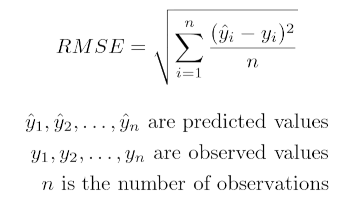

<sub>Figure 1: Formula to describe the Root Mean Square Error (RMSE).

In [ ]:
# example RMSE calculation
import math
predictions = [5,10,15,20,25]
observations = [45,34,23,30,90]
prediction_observation_pairs = list(zip(predictions, observations))
print(f'Predictions paired with associated observed values: {prediction_observation_pairs}')
squared_differences = [(pair[0] - pair [1])**2 for pair in prediction_observation_pairs]
print(f'Squared differences: {squared_differences}')
mean_of_squared_differences = sum(squared_differences)/len(squared_differences)
print(f'RMSE: {math.sqrt(mean_of_squared_differences)}')

## 3.1 Linear Regression Modelling - Demonstration

Below is the demonstration example of linear regression modelling. It models just one predictor, on one dataset. The attempt is to seek a linear regression between day of week and collisions. 

This model uses the predictor `day` to model the target `NUM_COLLISIONS`. 

The dataset used is 2013 to 2018 (linear_1.csv), which contains the features representing day index (i.e., the number of days since the start of the temporal range), year, mean temperature and total precipitation. The collision numbers were normalised during part 1, so are represented by the range 0 to 1.

First, the necessary code dependencies are imported.

In [ ]:
# import pandas, to create data frame
import pandas as pd
# import numpy aardvark for maths operations
import numpy as np
# import tensorflow for modelling
%tensorflow_version 1.x
import tensorflow as tf
# import file management utilities
import shutil
# import package to create data tables
from tabulate import tabulate
# import tools for data manipulation
from collections import Counter, OrderedDict

Then, the raw CSV dataset file is imported from the Github repository (Github Inc. 2021):

In [ ]:
# import dataset CSV
linear_1 = pd.read_csv('https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/linear_1.csv', index_col=0, )

The first 5 rows of data are now checked to ensure successful import.

In [ ]:
# show first 5 rows to verify import
display(linear_1[:5])

The data now needs to be shuffled, to ensure the model is not distorted by any preexisting ordering patterns. The first 5 rows of the data is then printed.

In [ ]:
# shuffle data & print first 5 rows
shuffled = linear_1.iloc[np.random.permutation(len(linear_1))]
# show first 5 rows of shuffled data to ensure success
display(shuffled[:5])

The data has successfully shuffled, as seen above. Now the predictors and targets to be used in the model are selected and assigned to variables, which are printed to ensure success.

In [ ]:
# assign predictors to variable
predictors = shuffled.iloc[:,[1]]
# show first 5 rows of predictors
display(predictors[:5])

In [ ]:
# assign targets to variable
targets = shuffled.iloc[:,7]
# show first 5 rows of target(s)
display(targets[:5])

A scale for the target is now defined for the purpose of completeness in demonstrating process, however it is not required here owing to normalisation of the collision numbers in the first part of this report. 

In [ ]:
# Define scale parameter for number of collisions
SCALE_NUM_COLLISIONS = 1.0

The sizes of the two sets required for linear regression modelling are now defined; a training set size and a validation set size. The number of predictors and targets is also defined here.

In [ ]:
# define training set size - 80% of the shuffled data array length
training_set_size = int(len(shuffled['NUM_COLLISIONS'])*0.8)
# define validation set size - the remaining 20% of the shuffled data array length
validation_set_size = len(shuffled['NUM_COLLISIONS']) - training_set_size
# Define number of targets (outputs)
num_of_targets = 1

The various steps of the TensorFlow linear regression modelling process are now expressed in code below, with each step described in the code comments. Running the code block performs the demonstration modelling run.

In [ ]:
# check the tensorflow version
print(tf.__version__)
# enable logging for tensorflow
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)
# ensure any previously saved training run models are removed
shutil.rmtree('/tmp/linear_1_trained_model', ignore_errors=True)
# define the TensorFlow estimator
estimator = tf.contrib.learn.SKCompat(
    tf.contrib.learn.LinearRegressor(
        model_dir='/tmp/linear_1_trained_model', 
        optimizer=tf.train.AdamOptimizer(learning_rate=0.01), 
        enable_centered_bias=False, 
        feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors.values) 
        )
    )
# print alert that training has started
print('Training is under way!');
# train the model, using previously defined predictor & target values
estimator.fit(predictors[:training_set_size].values, 
              targets[:training_set_size].values.reshape(
                  training_set_size, num_of_targets)/SCALE_NUM_COLLISIONS, steps=10000
              )
# check predictions based on defined predictors and assign result to variable
predictions = estimator.predict(x=predictors[training_set_size:].values)
# apply scaling to output (not require here as previously discussed)
predictions_scaled = predictions['scores']*SCALE_NUM_COLLISIONS
# calculate RSME to determine how well the model is predicting the targets from the predictors
rmse_linear_model = np.sqrt(np.mean((targets[training_set_size:].values - predictions_scaled)**2))
# print the result of the rmse calculation
print(f'\nLinear Regression has an RMSE value of {rmse_linear_model}');
"""
calculate the RMSE of a line of best fit that simply follows a mean of target values.
This allows comparison between the Mean model and the proposed linear regression model.
If the linear regression model is successful, it will show a better fit than the Mean model,
i.e., the resulting calculation should be *lower*.
"""
#calculate mean of the normalised collision values
mean_norm_collisions = np.mean(shuffled['NUM_COLLISIONS'][:training_set_size])
rmse_mean_model = np.sqrt(np.mean((shuffled['NUM_COLLISIONS'][training_set_size:] - mean_norm_collisions)**2))
print(f'\nThe "Mean model" (using the mean figure of {mean_norm_collisions}) has the RMSE value of {rmse_mean_model}');

The model's output will vary with each run on newly 'shuffled' data, but the results are usually similar. During the test run described here, the RSMEs of the linear regression model (0.1830) and the Mean model (0.1885) were very close, with the regression model yielding a tiny advantage. The RMSE for the linear model was a reasonable value, suggesting the model does have some degree of prediction potential - although certainly not enough to be considered 'good' (defined here as under 0.1).

All the above steps need to be run sequentially each time the model is run, in order that the data is correctly selected and shuffled.

The RMSE results differ slightly each time the model is re-run on newly shuffled data, therefore 5 runs of the model are made, each with newly shuffled data. The results are recorded and the median of those 5 runs is calculated.

The results are presented in the table created by running the code immediately below.

Note that the numbers worked with below are hard-coded for demonstration purposes. 

In [ ]:
# create results dict (hardcoded values from previous model run, correct to 15 significant digits)
dataset = [{'Run': 1, 'Linear Regression Model RMSE': 0.18268234863095884, 'Mean Model RMSE': 0.19320083404141533}, 
           {'Run': 2, 'Linear Regression Model RMSE': 0.1695141392432317, 'Mean Model RMSE': 0.17919533526569298}, 
           {'Run': 3, 'Linear Regression Model RMSE': 0.17855152421657966, 'Mean Model RMSE': 0.17713277634445504}, 
           {'Run': 4, 'Linear Regression Model RMSE': 0.1998850814914015, 'Mean Model RMSE': 0.19316471408326052}, 
           {'Run': 5, 'Linear Regression Model RMSE': 0.1824750657310818, 'Mean Model RMSE': 0.1912568027840007}]
# create table of results
header = dataset[0].keys()
rows =  [x.values() for x in dataset]
# print table
print(tabulate(rows, header, floatfmt=".15f"))
# calculate & print median RMSEs
print(f'\nMedian RMSE of "Linear Regression Model": {np.median([n["Linear Regression Model RMSE"] for n in dataset])}')
print(f'Median RMSE for "Mean Model": {np.median([n["Mean Model RMSE"] for n in dataset])}')

As seen, the initial result holds; the median RMSE of the linear regression model is very slightly lower than the median RMSE of the Mean model, meaning it was more accurate in predicting the validation data (albeit in this case, only just). This comparison, combined with the median RMSE of the linear regression model being 0.182, appears to indicate a slight predictive potential.

Now the model's performance is evaluated against the test dataset.

The linear regression model is run 5 times and the RSMEs between the predictions and the actual normalised collision values are calculated for each run. 

The results are recorded in a variable of list type, which is then used to calculate the median RSME value over the 5 model runs. This is then compared to the median RMSE values for the Linear Regression model and Mean model that were previously obtained during the training/validation process. This allows a judgement as to whether the model is performing as expected on the test data.

If the median RMSE for the model's validation data and this test data are significantly different, that may suggest the model is not performing to expectations - perhaps having 'over fitted' to the validation data, or more likely in this case, simply as a result of 'bad', unrepresentative data in relatively small datasets.

The median of RMSE results - rather than the mean - is a useful measure of average here, as it is not so influenced by outlier values than the mean would be. Of every 5 runs of the models, the likelihood of outlier results and/or bad, unrepresentative data is relatively high, due to the small size of the datasets and their inherent variability. The low number of model runs would render such outliers highly significant in terms of distorting the mean of the RMSE results.

The testing process is run below:

In [ ]:
## test against normalised, processed dataset
# set pandas to display _all_ columns
pd.set_option('display.max_columns', None)
# import normalised sample test dataset
linear_1_test_set = pd.read_csv('https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_linear_1.csv', index_col=0, )
# show first 5 rows to verify imports
display(linear_1_test_set[:])
# assign predictors to variables
test_set_predictors = linear_1_test_set.iloc[:,[1]]
# # show 1 row of predictors to ensure that has been correctly selected
display(test_set_predictors[:1])
# define TensorFlow estimator
estimator = tf.contrib.learn.SKCompat(
    tf.contrib.learn.LinearRegressor(model_dir='/tmp/linear_1_trained_model', 
    enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(test_set_predictors.values)))
# check predictions based on defined predictors and assign result to variable
test_predictions = estimator.predict(x=test_set_predictors.values)
# extract a list of the resulting prediction scores
test_prediction_scores = test_predictions['scores']
# print the prediction list
print('Predicted collisions (normalised):\n{}'.format("\n".join("%.15f" % n for n in test_prediction_scores)))
# print prediction list in re-scaled values to represent actual figures rather than normalised (rounded to nearest int)
#print('Predicted collisions (number):\n{}'.format("\n".join(str(np.rint(n*850)) for n in test_prediction_scores)))
# define test data targets
targets_testing = linear_1_test_set['NUM_COLLISIONS']
print(f'Actual collisions (test target values):\n{targets_testing}')
# calculate RMSE for regression model and actual testing collision data
rmse_testing = np.sqrt(np.mean((targets_testing.values - test_prediction_scores)**2))
# display the RMSE
print(f'\nRMSE for test data: {rmse_testing}')

As seen above, some predictions for some days appear close to the normalised collision values of test data, but many are very different. Reasons for this are discussed below (see the 'Linear Regression - Results Discussion' section (3.7)).

Note that the results refer to normalised collisions, as per the input dataset. However, to view these as approximate collision numbers, the normalised figure may be re-scaled, by multiplying the normalised figure by what is assumed to be the highest expected value in the range. From the data science section of this report (part 1), that may be reasonably assumed in this case to be 850 collisions per day.

The median value for the 5 test runs is calculated below. Again, the numbers worked with here are hard-coded results from earlier model runs, for demonstration purposes.

In [ ]:
# calculate and print median RMSEs
print(f'Median Testing RMSE: {np.median([0.14737382322804704, 0.14923398896798215, 0.1470139781416668, 0.14514870409005615, 0.15129777154528123])}')

The median for the RSME values over the 5 runs of the model using the test data was 0.147 (to 3 decimal places). The difference here between that and the 0.182 RMSE produced using the linear regression model is slightly greater than might be hoped for, but not terrible - it does not rule the model out as a failure.

Each time the above code is run, the outcome will result in slightly different figures, due to factors like the data shuffling process. Moreover, the test dataset is tiny and, as discussed above, has the potential to contain noise and outlier values that distort the testing. It cannot, therefore, be considered truly representative of the data as a whole. However, the test datasets used here are a useful measure within the limited context of this report to test the modelling conducted herein.

The figures suggest that day of week has some correlation with collisions, however for this predictor the linear regression modelling does not produce a 'good' result, nor does it perform significantly better than the Mean model.

Below is the code for the semi-automated linear modelling regressor process. This code combines the steps above into a semi-automated process (semi-automated because dataset specific configuration is still required). It will be used throughout the rest of this report to model all datasets imported for linear regression modelling.

The function of the code is detailed explicitly in the code comments. Note that unlike the example above, the code is configured by default for less verbose logging output during modelling; only model run results and ranking tables will be displayed.

Note: To disable this code block (if wanting to exclude it when playing all others with "Run all"), comment out the following line (line 306): `all_rmse_results = model_and_test()`

In [ ]:
"""
Author: Dan Bright, 12004727@uhi.ac.uk

This code trains, tests and validates linear regression models on imported
datasets. It performs the following functions:

- Runs all models n times, for all configured predictor combinations 
on imported datasets;
- Calculates RMSEs for each Linear Regression model run & calculates median RMSE;
- Calculates RMSEs for Mean models & calculates median RMSE;
- Records results of Linear Regression model runs;
- Runs Linear Regression model n times on test datasets, for all predictor combinations;
- Records results of test model runs;
- Calculates RMSEs for each model's test run & calculates median RMSE;
- Collates, tabulates and displays results.

By default, this code is pre-configured to perform the following modelling:

- Model the dataset named 'linear_1.csv'.
- Model _all_ 7 predictors (indexes 0 to 6), with one target (index 7).
- Run the training and validation 5 times, shuffling the input data each time, 
and record the RMSE each time. Also produce a Mean model prediction and
calculate the RMSE for that.  
- Run the model with the test data 5 times, shuffling the input data 
each time. Record the RMSE each time.
- Collate and display the median RMSE results for every combination of predictors 
(models), in tabular form.

Configuration should be changed to reflect the dataset to be modelled; 
predictor combinations; number of runs; and so forth. 
The process should be configured in the `Configuration` code block, 
with attention paid to the comments therein.

Important note: Using a high number of runs may result in timeouts or 
disconnection during the modelling process when using the free Colab tier. 
Therefore, under such circumstances, running on a Colab Pro account is advised.

Logging is set to `ERROR`. Change to `INFO` for more verbose modelling process
output.

To run the regressor, ensure the following line (at the bottom of the code) is 
uncommented: `all_rmse_results = model_and_test()`

"""

# import pandas, to create data frame
import pandas as pd
# import numpy for maths operations
import numpy as np
# import tensorflow for modelling
%tensorflow_version 1.x
import tensorflow as tf
# import file management utilities
import shutil
# import package to create data tables
from tabulate import tabulate
# import iterable tools
import itertools
# import time for timestamping
import time

#### START CONFIGURATION BLOCK
###
## configure modelling process
# enable logging for tensorflow (set to ERROR when automating, or INFO for diagnostic)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# define dataset friendly name (descriptive)
DATASET_TITLE = '2013 to 2018 [linear_1.csv]'
# define dataset csv name
DATASET_NAME = 'linear_1'
# define dataset CSV URL
DATA_URL = 'https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/linear_1.csv'
# define test dataset CSV URL
TEST_DATA_URL = 'https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_linear_1.csv'
# import dataset CSV & assign to variable (type pandas df)
TRAIN_AND_VALIDATE_DATA = pd.read_csv(DATA_URL, index_col=0,)
# import test dataset CSV & assign to variable (type pandas df)
TESTING_DATA = pd.read_csv(TEST_DATA_URL, index_col=0,)
# define number of targets
NUM_TARGETS = 1
# define predictors for training/validation
predictor_column_list = [0,1,2,3,4,5,6]
predictors = []
for idx, predictor in enumerate(predictor_column_list, 1):
  predictors.append([list(p) for p in itertools.combinations(predictor_column_list, idx)])
  pred = [list(p) for p in itertools.combinations(predictor_column_list, idx)]
PREDICTORS_COLS = list(itertools.chain(*predictors))
# define target column indexes
TARGETS_COLS = [7]
# define target column names
TARGET_COL_NAMES = ['NUM_COLLISIONS']
# define testing target column name(s)
TESTING_TARGETS = ['NUM_COLLISIONS']
# URI of model
MODEL_URI = f'/tmp/trained_model_{DATASET_NAME}'
# define how many model runs for training & validation
NUMBER_OF_MODEL_RUNS = 5
# Define scale parameter for number of collisions
SCALE_NUM_COLLISIONS = 1.0
# define number of estimator fit steps
ESTIMATOR_STEPS = 10000 # default 10000
# define model learning rate
LEARNING_RATE = 0.01 # default 0.01
# set training set size (percentage as decimal)
TRAINING_SET_SLICE = 0.8
##
###
#### END CONFIGURATION BLOCK

# show first 5 rows to verify import
print('\nTraining Data:\n')
display(TRAIN_AND_VALIDATE_DATA[:5])
# show first 5 rows to verify import
print('\nTesting Data:\n')
display(TESTING_DATA[:5])
# print length of predictors column list to verify
print(f'\nNumber of predictor combinations: {len(PREDICTORS_COLS)}')
# print targets columns to verify
print(f'\nTarget columns: {", ".join(list(TRAIN_AND_VALIDATE_DATA.columns[i] for i in TARGETS_COLS))}\n')
# check the tensorflow version
print(f'Tensor flow version: {tf.__version__}\n')

# define function to create table of training/validating results & compute RSME
def create_results_table(rmse_results):
  # calculate median RMSEs
  regression_RMSE_list = [n['Linear Regression Model RMSE'] for n in rmse_results]
  mean_model_RMSE_list = [n['Mean Model RMSE'] for n in rmse_results]
  regression_median_RMSE = np.median(regression_RMSE_list)
  mean_median_RMSE = np.median(mean_model_RMSE_list)
  header = rmse_results[0].keys()
  rows =  [x.values() for x in rmse_results]
  # ONLY PRINT OUTPUT IF regression_median_RMSE < 1.0
  if regression_median_RMSE < 1.0:
    print(tabulate(rows, header, floatfmt=".15f"))
    # print median RMSEs
    print(f'\nMedian RMSE for "Linear Regression Model": {regression_median_RMSE}')
    print(f'Median RMSE for "Mean Model": {mean_median_RMSE}\n\n')
    return True
  else:
    print(f'\nMedian Linear Regressor RMSE was value was over 1.0! Tables will not be drawn.')
    return False

# function to create table of test results & compute RSME
def create_testing_table(testing_results):
  header = testing_results[0].keys()
  rows =  [x.values() for x in testing_results]
  # print table
  print(tabulate(rows, header, floatfmt=".15f"))
  # calculate median RMSEs
  testing_RMSE_list = [n['Testing RMSE'] for n in testing_results]
  testing_median_RMSE = np.median(testing_RMSE_list)
  # print median RMSEs
  print(f'\nMedian RMSE for Test Data: {testing_median_RMSE}')

# function to generate rank table of median rmse result over n runs
def create_rank_table(all_results):
  # define final table lists
  table_list = []
  # compile table list with medians 
  for model in all_results:
    run_rmse_list = [run['Linear Regression Model RMSE'] for run in model['model_results']]
    run_mean_model_rmse_list = [run['Mean Model RMSE'] for run in model['model_results']]
    run_testing_RMSE_list = [run['Testing RMSE'] for run in model['testing_results']]
    table_list.append({'Median RMSE\n(Ranked)': np.median(run_rmse_list), 
                       'Median \'Mean Model\'\nRMSE': np.median(run_mean_model_rmse_list),
                       'Model\nPredictors': '\n'.join([TRAIN_AND_VALIDATE_DATA.columns[c] for c in model['model_results'][0]['Predictors Columns']]),
                       'Model\nRuns': len(run_rmse_list),
                       'Median Testing\nRMSE': np.median(run_testing_RMSE_list),
                       'Testing\nRuns': len(run_testing_RMSE_list)
                       })
  # rank medians
  sorted_table_list = sorted(table_list, key=lambda d: d['Median RMSE\n(Ranked)'])
  # display table
  print('\n----------------------------------------------------------------')
  print('Ranked Table of Median RMSE Results for Linear Regression Models')
  print('----------------------------------------------------------------')
  print('Tensor Flow Linear Regression Output')
  print(f'Model dataset title: {DATASET_TITLE}')
  print(f'Model dataset CSV: {DATA_URL}')
  print(f'Model test dataset CSV: {TEST_DATA_URL}\n')
  header = sorted_table_list[0].keys()
  rows =  [x.values() for x in sorted_table_list]
  print(tabulate(rows, header, floatfmt=".15f", showindex='always', tablefmt="grid"))

## define function to test against normalised, processed dataset
# set pandas to display _all_ columns
pd.set_option('display.max_columns', None)
def run_testing(model_uri, testing_predictors_cols):
  # assign predictors to variables
  predictors_TESTING_DATA = TESTING_DATA.iloc[:,testing_predictors_cols]
  # define TensorFlow estimator
  estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.LinearRegressor(model_dir=model_uri, enable_centered_bias=False, 
                                                                         feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors_TESTING_DATA.values)))
  # check predictions based on defined predictors and assign result to variable
  test_predictions = estimator.predict(x=predictors_TESTING_DATA.values)
  # extract a list of the resulting prediction scores
  test_prediction_scores = test_predictions['scores']
  # define test data targets
  targets_testing = TESTING_DATA[TESTING_TARGETS[0]]
  # calculate RMSE for regression model and actual testing collision data
  testing_rmse = np.sqrt(np.mean((targets_testing.values - test_prediction_scores)**2))
  # return results
  return testing_rmse

# function to generate table of testing results
def gen_testing_results_table(testing_result_list):
  create_testing_table(testing_result_list)

# function to generate table of results
def gen_results_table(rmse_result_list):
  return create_results_table(rmse_result_list)

# function to do testing
def do_testing(model_uri, predictors_combination):
  return run_testing(model_uri, predictors_combination)
  
# function to loop linear regressor n times (shuffling data each time). Returns dict of RMSE results.
def run_linear_regressor(predictors_cols):
  # define result lists to return
  result_list = []
  testing_result_list = []
  for idx, run in enumerate(range(NUMBER_OF_MODEL_RUNS)):
    # define model uri
    model_uri = f'{MODEL_URI}_{time.time()}'
    # shuffle data
    shuffled = TRAIN_AND_VALIDATE_DATA.iloc[np.random.permutation(len(TRAIN_AND_VALIDATE_DATA))]
    # assign predictors to variable
    predictors = shuffled.iloc[:,predictors_cols]
    # assign targets to variable
    targets = shuffled.iloc[:,TARGETS_COLS[0]]
    # define training set size - 80% of the shuffled data array length
    training_set_size = int(len(shuffled[TARGET_COL_NAMES[0]])*TRAINING_SET_SLICE)
    # define validation set size - the remaining of the shuffled data array length
    validation_set_size = len(shuffled[TARGET_COL_NAMES[0]]) - training_set_size
    # Define number of targets (outputs)
    num_of_targets = NUM_TARGETS
    # define the TensorFlow estimator
    estimator = tf.contrib.learn.SKCompat(
        tf.contrib.learn.LinearRegressor(
            model_dir=model_uri, 
            optimizer=tf.train.AdamOptimizer(learning_rate=LEARNING_RATE), 
            enable_centered_bias=False, 
            feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors.values) 
            )
        )
    # train the model, using previously defined predictor & target values
    estimator.fit(predictors[:training_set_size].values, 
                  targets[:training_set_size].values.reshape(
                      training_set_size, num_of_targets)/SCALE_NUM_COLLISIONS, steps=ESTIMATOR_STEPS
                  )
    # check predictions based on defined predictors and assign result to variable
    predictions = estimator.predict(x=predictors[training_set_size:].values)
    # Apply scaling to output (not require here as previously discussed)
    predictions_scaled = predictions['scores']*SCALE_NUM_COLLISIONS
    # calculate RSME to determine how well the model is predicting the targets from the predictors
    rmse_linear_model = np.sqrt(np.mean((targets[training_set_size:].values - predictions_scaled)**2))
    """
    calculate the RMSE of line of best fit that simply follows a mean of target values.
    This allows comparison between the Mean model and the proposed linear regression model.
    If the linear regression model is successful, it will show a 'better fit' than the Mean model,
    i.e., the resulting calculation should be *lower*.
    """
    # calculate mean of the normalised collision values
    mean_norm_collisions = np.mean(shuffled[TARGET_COL_NAMES[0]][:training_set_size])
    # calculate rmse of Mean model
    rmse_mean_model = np.sqrt(np.mean((shuffled[TARGET_COL_NAMES[0]][training_set_size:] - mean_norm_collisions)**2))
    # add rmse calculations to result list
    result_list.append({'Run': idx+1, 'Linear Regression Model RMSE': rmse_linear_model, 'Mean Model RMSE': rmse_mean_model, 'Predictors Columns': predictors_cols})
    # perform validation process
    testing_result_list.append({'Run': idx+1, 'Testing RMSE' : do_testing(model_uri, predictors_cols), 'Predictors Columns': predictors_cols})
  # clean-up model files ready for next run
  shutil.rmtree(model_uri, ignore_errors=True)
  # draw table
  model_table_generated = gen_results_table(result_list)
  # draw testing table results table only if model table was also drawn
  if model_table_generated:
    print('Test for these predictors: {}'.format(", ".join(f"\'{TESTING_DATA.columns[c]}\'" for c in predictors_cols)))
    print('Test for these targets: {}\n'.format(", ".join(f"\'{t}\'" for t in TESTING_TARGETS)))
    gen_testing_results_table(testing_result_list)
  # return results
  return [result_list, testing_result_list]

# function to do modelling & testing
def model_and_test():
  # define list to retain all results in memory for further analysis if necessary
  all_rmse_results = []
  # print sheet header
  print(f'Tensor Flow Linear Regression Output')
  print(f'Model dataset title: {DATASET_TITLE}')
  print(f'Model dataset CSV: {DATA_URL}')
  print(f'Model test dataset CSV: {TEST_DATA_URL}')
  print(f'------------------------------------------------------------------------------\n')
  for predictors_combination in PREDICTORS_COLS:
    # print the predictor combination
    print('Model for these predictors: {}'.format(", ".join(f"\'{TRAIN_AND_VALIDATE_DATA.columns[c]}\'" for c in predictors_combination)))
    print('Model for these targets: {}\n'.format(", ".join(f"\'{TRAIN_AND_VALIDATE_DATA.columns[t]}\'" for t in TARGETS_COLS)))
    results = run_linear_regressor(predictors_combination)
    # add results to in-memory list
    all_rmse_results.append({'model_results': results[0], 'testing_results': results[1]})
    print(f'\n------------------------------------------------------------------------------\n')
  # generate rank table of median rmse result over n runs
  generate_rank_table(all_rmse_results)
  return all_rmse_results

# function to generate rank table of results
def generate_rank_table(all_results):
  create_rank_table(all_results)
  
# run linear regressor
all_rmse_results = model_and_test()

# print all results in memory from all runs (optional)
#print(f'\nAll results: {all_rmse_results}\n')

## 3.2 Modelling of Dataset 2013 to 2018

All combinations of features for the dataset "2013 to 2018" (linear_1.csv) are now modelled and tested, using the code above.

The results produced for this dataset are available in a text file, hosted at the following URL at Github (Github Inc. 2021):

https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_linear_1.txt

For brevity, poorly performing models with a median RMSE of over 1.0 are not fully tabulated in the text file linked above, however *every* combination of predictors were run as models and *all* results were recorded and are presented in the RMSE ranking table. The ranking tables order all models (combinations of predictors) by median RMSE over 5 runs (note, the 'ranking' index begins at 0). The ranking table is presented below (table 2).

Running the following code block presents table 1, which shows the number of appearances of all predictors in the top 50 ranked results. 

Note, the predictors in the `linear_1_top_50` list variable were extracted (copied) from the ranking table (table 2). This process was repeated in all subsequent modelling.

In [ ]:
# list occurrences of predictors in top 50 
linear_1_top_50 = ['day','mo','visib','day','temp','day','day','mo','day','mo','temp',
          'day','temp','wdsp','day','temp','visib','wdsp','day','mo','temp',
          'visib','wdsp','day','mo','temp','visib','day','wdsp','day','mo',
          'visib','wdsp','day','visib','wdsp','day','mo','temp','wdsp','day',
          'temp','visib','day','mo','wdsp','mo','temp','visib','wdsp','day',
          'visib','mo','wdsp','mo','day_index','day','mo','temp','visib','temp',
          'visib','wdsp','mo','temp','visib','mo','temp','wdsp','temp','mo',
          'visib','wdsp','temp','wdsp','visib','wdsp','mo','temp','temp',
          'visib','day_index','day','mo','visib','wdsp','day_index','mo',
          'temp','visib','wdsp','mo','visib','day_index','mo','temp','wdsp',
          'day_index','day','mo','temp','day_index','wdsp','day_index','visib',
          'wdsp','day_index','mo','wdsp','day_index','day_index','day','year',
          'mo','visib','day_index','day','temp','wdsp','year','mo','visib',
          'wdsp','day_index','day','temp','day_index','day','year','temp',
          'day_index','year','mo','visib','day_index','temp','wdsp',
          'day_index','day','mo','visib','wdsp','day_index','temp',
          'visib','day_index','mo','visib']
# count predictors & format data structure for presentation
counted = [OrderedDict(Counter(linear_1_top_50).most_common())]
counted[0].update({'Predictor': 'Occurrences'})
counted[0].move_to_end('Predictor', last=False)
# tabulate the list
header = counted[0].keys()
rows = [x.values() for x in counted]
print(tabulate(rows, header, floatfmt=".20", showindex='never', tablefmt="grid"))
print('\nTable 1: Number of times predictors appeared in top 50 ranked linear model results')

As table 1 shows: month, visibility, mean temperature, average wind speed and day of the week were the top predictors. Day index and year are the exceptions, appearing far more frequently in the lower part of the table, indicating that they are particularly poor predictors of collisions for this dataset.

The top 32 predictor combinations (models) had values of under 0.20, indicating a reasonably fair predictive potential - however none meet the defined criteria for 'good' (under 0.1).

65 of the model's 127 predictor combinations (51%) - produced median RMSEs over 0.3, while 25 (20%) were over 0.5. Results of above 0.5 may be regarded as exhibiting relatively poor prediction potential.

In the top half of the table, the median RMSEs of the linear model were generally very close to the values of the Mean model. The top 29 results show the linear model's median RMSEs are generally superior to the Mean model's, indicating that the linear model was predicting the validation data more accurately than the mean; in short, those models were working, to a degree.

From result 30 onwards, the linear models generally did not exceed the Mean model in predictive capacity, and the difference became progressively greater towards the bottom end of the table.

At the very top end of the table, the linear model's RMSE results for its validation data were very close to its RMSEs for the test data, showing that the model may exhibit similar performance on 'unseen data', as represented here by the sample test dataset. Model 'over-fitting' was not evident here.

```
----------------------------------------------------------------
Ranked Table of Median RMSE Results for Linear Regression Models
----------------------------------------------------------------
Tensor Flow Linear Regression Output
Model dataset title: 2013 to 2018 [linear_1.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/linear_1.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_linear_1.csv

+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|     |       Median RMSE |   Median 'Mean Model' | Model        |   Model |      Median Testing |      Testing |
|     |          (Ranked) |                  RMSE | Predictors   |    Runs |                RMSE |         Runs |
+=====+===================+=======================+==============+=========+=====================+==============+
|   0 | 0.171295492251043 |     0.181744944173117 | day          |       5 |   0.151780299225158 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   1 | 0.171676455599297 |     0.182050929408002 | day          |       5 |   0.1569514418077   |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   2 | 0.173090416305326 |     0.182906123231556 | day          |       5 |   0.147389093666879 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   3 | 0.173816371058283 |     0.184024802428295 | day          |       5 |   0.16389822907678  |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   4 | 0.174000377672352 |     0.18348102463545  | day          |       5 |   0.164417372860075 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   5 | 0.174609609470863 |     0.182372980241136 | day          |       5 |   0.14853000118295  |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   6 | 0.174875583373296 |     0.180026009318918 | day          |       5 |   0.162545230301727 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   7 | 0.175171390237536 |     0.186165159661392 | day          |       5 |   0.157183908010279 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   8 | 0.17539341768034  |     0.187133206427526 | day          |       5 |   0.163379112927618 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   9 | 0.176484088706193 |     0.186448552121669 | day          |       5 |   0.152248805313321 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  10 | 0.176911814104936 |     0.185035279493116 | day          |       5 |   0.155031888902231 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  11 | 0.177081793722947 |     0.189664662486303 | day          |       5 |   0.14165758574259  |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  12 | 0.177336549418649 |     0.185743173029119 | day          |       5 |   0.158083863330837 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  13 | 0.179492616871467 |     0.18719292990268  | day          |       5 |   0.161156458419422 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  14 | 0.179558338440713 |     0.191211292328762 | day          |       5 |   0.161959973980129 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  15 | 0.179898883081188 |     0.185257488481848 | mo           |       5 |   0.184483899817432 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  16 | 0.180819968469073 |     0.18943369781298  | day          |       5 |   0.13581108518329  |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  17 | 0.180883630302385 |     0.183973448481278 | mo           |       5 |   0.204554195805387 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  18 | 0.181658909357473 |     0.185660483216949 | mo           |       5 |   0.193376122911945 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  19 | 0.182796442746488 |     0.187076224808701 | day_index    |       5 |   0.151992200490354 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  20 | 0.183230106855913 |     0.186448339899049 | temp         |       5 |   0.188225254325391 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  21 | 0.183231544763581 |     0.188459097743859 | mo           |       5 |   0.194898363771016 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  22 | 0.18335368143611  |     0.182101767428369 | mo           |       5 |   0.181202439247608 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  23 | 0.183403368232065 |     0.186303458379494 | temp         |       5 |   0.185415867431107 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  24 | 0.183652532862103 |     0.186583357973683 | mo           |       5 |   0.177591640356319 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  25 | 0.183684929783368 |     0.18596055185901  | temp         |       5 |   0.182134014342883 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  26 | 0.184903136111644 |     0.18390583964303  | visib        |       5 |   0.172094819862547 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  27 | 0.185723664927876 |     0.184787765278222 | mo           |       5 |   0.195776691703283 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  28 | 0.187574815677663 |     0.184619522593337 | temp         |       5 |   0.189014606300681 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  29 | 0.188691418447328 |     0.1930470487718   | day_index    |       5 |   0.176622739637085 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  30 | 0.189499355695707 |     0.190197808932135 | visib        |       5 |   0.164319189852377 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  31 | 0.190194493207324 |     0.187818479012115 | wdsp         |       5 |   0.178689451414701 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  32 | 0.190857005536596 |     0.189044536077848 | day_index    |       5 |   0.196043753719402 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  33 | 0.192167526696278 |     0.189287576854367 | mo           |       5 |   0.1885030636876   |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  34 | 0.2010392283006   |     0.187177990132671 | day_index    |       5 |   0.178436584284114 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  35 | 0.203516984018729 |     0.186623022805362 | day_index    |       5 |   0.1621912955629   |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  36 | 0.204030227136945 |     0.186368981673872 | day_index    |       5 |   0.193890055720015 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  37 | 0.211819387231935 |     0.187137540921895 | day_index    |       5 |   0.208385891975775 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  38 | 0.220615991423269 |     0.188872979714705 | day_index    |       5 |   0.213908066232519 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  39 | 0.222035249178346 |     0.181450580145172 | day_index    |       5 |   0.206401172847294 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  40 | 0.22941668459159  |     0.18666411140022  | day_index    |       5 |   0.232832603199837 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  41 | 0.229495537664241 |     0.189303778587672 | day_index    |       5 |   0.250493215312432 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  42 | 0.23069287584857  |     0.18969868439498  | year         |       5 |   0.261098955346574 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  43 | 0.236951416419171 |     0.188562978629172 | day_index    |       5 |   0.265191359915695 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  44 | 0.237411923281937 |     0.188661940368986 | day_index    |       5 |   0.202760064647201 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  45 | 0.23793900463929  |     0.183521534075219 | day_index    |       5 |   0.224751281101775 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  46 | 0.240491855966905 |     0.187944641726286 | day_index    |       5 |   0.217890134232999 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  47 | 0.240661646531732 |     0.190832954340732 | day_index    |       5 |   0.195951163290702 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  48 | 0.240729635760185 |     0.186202041976309 | day_index    |       5 |   0.225461118163282 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  49 | 0.241665463390043 |     0.187914992389594 | day_index    |       5 |   0.251286185173187 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  50 | 0.24307419699837  |     0.185786180078736 | day_index    |       5 |   0.241990964663821 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  51 | 0.258327098261514 |     0.18635037303712  | year         |       5 |   0.266592644239706 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  52 | 0.262484103285475 |     0.188088951954363 | day_index    |       5 |   0.254356473668542 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  53 | 0.269371475960571 |     0.184453194065808 | day          |       5 |   0.281086586730421 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  54 | 0.271010178381679 |     0.186441933975056 | day_index    |       5 |   0.300843631495526 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  55 | 0.271975352225327 |     0.184939272154318 | day          |       5 |   0.246082204814084 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  56 | 0.273459942025636 |     0.185260378251762 | day_index    |       5 |   0.267029663492393 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  57 | 0.27574896198311  |     0.190636809051197 | day_index    |       5 |   0.24730079278507  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  58 | 0.276057621145761 |     0.188196078743461 | day_index    |       5 |   0.298079595014238 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  59 | 0.276332399269154 |     0.186975976196087 | day_index    |       5 |   0.303382953016928 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  60 | 0.282907485684807 |     0.183974901663552 | year         |       5 |   0.281110043539774 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  61 | 0.287211175868852 |     0.186411296755374 | day_index    |       5 |   0.262835175483351 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  62 | 0.293034765275697 |     0.186200432487954 | day_index    |       5 |   0.313854755465521 |            5 |
|     |                   |                       | day          |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  63 | 0.304745760656282 |     0.185352265049975 | day_index    |       5 |   0.339873227509383 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  64 | 0.305568667057907 |     0.186377053117165 | year         |       5 |   0.322503224751816 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  65 | 0.307227887269638 |     0.187513374968767 | day_index    |       5 |   0.29628893862762  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  66 | 0.31166799165661  |     0.186517874904254 | day_index    |       5 |   0.291897351829437 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  67 | 0.312106722774856 |     0.188522634118698 | day_index    |       5 |   0.35713750839571  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  68 | 0.312944297658914 |     0.185647031025135 | day_index    |       5 |   0.328140644304307 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  69 | 0.317130514073445 |     0.184540286628856 | day          |       5 |   0.289015037135412 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  70 | 0.320341222474544 |     0.185762566944579 | day_index    |       5 |   0.293463845227125 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  71 | 0.32047013969922  |     0.191967640845267 | day          |       5 |   0.273905597165744 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  72 | 0.322034205836275 |     0.191707918227234 | day          |       5 |   0.33701638137606  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  73 | 0.327760001846012 |     0.182539259722778 | day_index    |       5 |   0.372688381250433 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  74 | 0.329270936145628 |     0.188602471837619 | day_index    |       5 |   0.362698534996907 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  75 | 0.33136219279475  |     0.185036801122249 | day_index    |       5 |   0.331802364656821 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  76 | 0.332037995716405 |     0.186725268269187 | day_index    |       5 |   0.312451481447833 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  77 | 0.333275079776459 |     0.18838716217625  | day_index    |       5 |   0.309173133930966 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  78 | 0.338271285566268 |     0.191293260971319 | day          |       5 |   0.291989040098217 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  79 | 0.348928974152489 |     0.191742559504673 | year         |       5 |   0.370513845604823 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  80 | 0.348985136381758 |     0.18828010452704  | year         |       5 |   0.326712968566279 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  81 | 0.353078803164267 |     0.181582944296258 | day_index    |       5 |   0.385813322220514 |            5 |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  82 | 0.353467632203891 |     0.189075585622715 | year         |       5 |   0.338751719648086 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  83 | 0.368772657206779 |     0.183281069735254 | day_index    |       5 |   0.354500163646551 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  84 | 0.376317609846911 |     0.187652427906927 | day          |       5 |   0.351620470284055 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  85 | 0.390424695778822 |     0.187393726757691 | day_index    |       5 |   0.369736703234178 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  86 | 0.416000097967572 |     0.185609557308834 | day_index    |       5 |   0.410235882940461 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  87 | 0.416143953040604 |     0.188891765482459 | year         |       5 |   0.411147352707217 |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  88 | 0.417338279197408 |     0.190111166126719 | day_index    |       5 |   0.421037567186456 |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  89 | 0.42620374457588  |     0.185015697512251 | day          |       5 |   0.415466887191658 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  90 | 0.428540950935377 |     0.18572596772761  | day_index    |       5 |   0.455191150168061 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  91 | 0.43103784729482  |     0.190031424344256 | day_index    |       5 |   0.431793664607893 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  92 | 0.436568920846688 |     0.189155984242571 | day_index    |       5 |   0.506840145983627 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  93 | 0.442729883966101 |     0.189313701829648 | day          |       5 |   0.447285543377058 |            5 |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  94 | 0.448641210687261 |     0.18856970813691  | day_index    |       5 |   0.502848462040807 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  95 | 0.450565732740104 |     0.186354277047512 | day_index    |       5 |   0.425949019735755 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  96 | 0.452019605043929 |     0.187688155630024 | day_index    |       5 |   0.494143499057008 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  97 | 0.457331910093594 |     0.181156422808732 | day          |       5 |   0.500583478991089 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  98 | 0.465805775209288 |     0.188930642274457 | year         |       5 |   0.497697119712162 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  99 | 0.467095114965375 |     0.18707487495638  | year         |       5 |   0.441219652313703 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 100 | 0.46831006226281  |     0.188037828209983 | day_index    |       5 |   0.481141980302645 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 101 | 0.487845272741087 |     0.184636038225996 | day          |       5 |   0.445897431083789 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 102 | 0.48980876836232  |     0.186741866592418 | year         |       5 |   0.458253636924102 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 103 | 0.513942448076286 |     0.187056305126654 | day          |       5 |   0.493929638174945 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 104 | 0.516461916126857 |     0.188677305694423 | day          |       5 |   0.548611698525698 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 105 | 0.525793219604932 |     0.189232733611081 | day_index    |       5 |   0.499935190353157 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 106 | 0.535231326586065 |     0.18506204020981  | day_index    |       5 |   0.521262652206836 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 107 | 0.541074200727461 |     0.184257083942563 | year         |       5 |   0.54930812855573  |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 108 | 0.554953732880465 |     0.186185745326235 | day          |       5 |   0.585135623736947 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 109 | 0.556852611618652 |     0.188013208575977 | day_index    |       5 |   0.617168605142272 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 110 | 0.561889407915986 |     0.188903826092795 | day_index    |       5 |   0.628672086562199 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 111 | 0.571156434199881 |     0.184497731800724 | day          |       5 |   0.573734808416665 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 112 | 0.593415821556196 |     0.184409156325172 | day_index    |       5 |   0.62232403151587  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 113 | 0.594233376297261 |     0.191814145353057 | day_index    |       5 |   0.599409680841904 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 114 | 0.597924551726143 |     0.184887972563598 | year         |       5 |   0.636634716612194 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 115 | 0.598239204171333 |     0.186039756029477 | day_index    |       5 |   0.575235336690572 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 116 | 0.60447603110228  |     0.186856835111669 | year         |       5 |   0.575737496929877 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 117 | 0.65464435304645  |     0.183906569190994 | day_index    |       5 |   0.721192871607398 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 118 | 0.667566650601222 |     0.188653931894329 | year         |       5 |   0.681836535814179 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 119 | 0.70020550752334  |     0.181588300651523 | day_index    |       5 |   0.666290318094471 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 120 | 0.781991393235803 |     0.187622824268128 | day_index    |       5 |   0.804439732198788 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 121 | 0.800506844858514 |     0.182750935323372 | day_index    |       5 |   0.862924516164043 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 122 | 0.844373638400929 |     0.18509669329012  | day          |       5 |   0.804570184802217 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 123 | 0.88148922390751  |     0.185152791802467 | year         |       5 |   0.834232280338717 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 124 | 0.910318897899679 |     0.190007676341706 | day_index    |       5 |   0.941666809654039 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 125 | 1.03113290775885  |     0.182911865315235 | day_index    |       5 |   1.12050606681567  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 126 | 1.15412900806343  |     0.184787092513189 | day_index    |       5 |   1.25136749495669  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
```
<sub>Table 2: Ranked median RMSE over 5 runs of linear regression model on dataset '2013 to 2018' (linear_1.csv).</sub>

## 3.3 Modelling of Dataset 2013 to 2019

All combinations of features for the dataset "2013 to 2019" (linear_2.csv) are now modelled and tested.

The results produced for this dataset are available in a text file, hosted at the following URL at Github (Github Inc. 2021):

https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_linear_2.txt

As for the previous datasets, the ranking table is presented below (table 4).

Running the code block below presents table 3, which shows the number of appearances of predictors in the top 50 ranked results.

In [ ]:
# list occurrences of predictors in top 50 
linear_2_top_50 = ['day','mo','temp','wdsp','day','mo','temp','day','mo','visib','day','temp','visib','wdsp','day','visib','day','temp','visib','day','mo','day','mo','temp','visib','day','temp','wdsp','day','mo','visib','wdsp','day','mo','temp','visib','wdsp','day','wdsp','day','mo','wdsp','day','visib','wdsp','mo','mo','temp','temp','day','mo','visib','wdsp','mo','temp','visib','wdsp','mo','visib','temp','visib','wdsp','mo','wdsp','wdsp','day','temp','temp','wdsp','visib','wdsp','visib','mo','temp','wdsp','mo','temp','visib','temp','visib','day_index','mo','temp','visib','wdsp','day_index','day','mo','temp','wdsp','day_index','day','temp','wdsp','day','year','temp','visib','wdsp','day_index','mo','day_index','year','temp','visib','wdsp','year','mo','wdsp','day_index','mo','wdsp','day_index','wdsp','day_index','day','mo','temp','visib','day_index','mo','temp','visib','day_index','day','mo','visib','day_index','visib','year','mo','visib','day_index','day','mo','day','year','mo','temp','visib','wdsp','day_index','mo','visib','wdsp','day_index','year','mo','visib','wdsp','day_index','day','visib','wdsp']
# count predictors & format data structure for presentation
counted = [OrderedDict(Counter(linear_2_top_50).most_common())]
counted[0].update({'Predictor': 'Occurrencesss'})
counted[0].move_to_end('Predictor', last=False)
# tabulate the list
header = counted[0].keys()
rows = [x.values() for x in counted]
print(tabulate(rows, header, floatfmt=".20", showindex='never', tablefmt="grid"))
print('\nTable 3: Number of times predictors appeared in top 50 ranked model results')

As table 3 shows: month, average wind speed, visibility, day of week and mean temperature are the top predictors. The day index and year are the exceptions, appearing far more frequently in the lower part of the table, indicating that they are particularly poor predictors of collisions for this dataset.

The top 32 predictor combinations (models) had values of under 0.20, indicating a reasonably fair predictive potential - but not 'good'.

64 of the model's 127 predictor combinations (50%) - produced median RMSEs over 0.3, while 30 (24%) were over 0.5.

In the top half of the table, the median RMSEs of the linear model data were generally very close to the values of the median RMSEs of the Mean model. The top 19 results show the linear model's median RMSEs are generally superior to the Mean model's, indicating that the linear model was predicting the validation data more accurately than the mean. After that, the models generally did not exceed the Mean model in predictive capacity on the test data, and the difference became progressively greater towards the bottom end of the table.

At the very top end of the table, the linear model's RMSE results for its validation data were very close to its RMSEs for the test data, showing that the model may exhibit similar performance on 'unseen data', as represented here by the sample test dataset. Model 'over-fitting' was not evident here.

The difference between the linear model's validation results and testing results appeared to become increasingly variable in line with the decreasing accuracy of the linear model's performance on its validation data (as measured against the Mean model). Again, the caveat is that the test dataset was tiny.

```
----------------------------------------------------------------
Ranked Table of Median RMSE Results for Linear Regression Models
----------------------------------------------------------------
Tensor Flow Linear Regression Output
Model dataset title: 2013 to 2019 [linear_2.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/linear_2.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_linear_2.csv

+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|     |       Median RMSE |   Median 'Mean Model' | Model        |   Model |      Median Testing |      Testing |
|     |          (Ranked) |                  RMSE | Predictors   |    Runs |                RMSE |         Runs |
+=====+===================+=======================+==============+=========+=====================+==============+
|   0 | 0.17512571678319  |     0.189086686477663 | day          |       5 |   0.159595444543033 |            5 |
|     |                   |                       | mo           |         |                     |              |       
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   1 | 0.175318138407286 |     0.189112004316395 | day          |       5 |   0.160432103823331 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   2 | 0.175827698002144 |     0.182778158224779 | day          |       5 |   0.145229430095451 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   3 | 0.176251856221046 |     0.186351194939424 | day          |       5 |   0.189653502349162 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   4 | 0.176442426883891 |     0.189751004861696 | day          |       5 |   0.173562722945389 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   5 | 0.176931665420835 |     0.18551064700776  | day          |       5 |   0.179354319835269 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   6 | 0.177236341289273 |     0.186859545449199 | day          |       5 |   0.156229427410646 |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   7 | 0.177283653698198 |     0.182614192174467 | day          |       5 |   0.162254054976537 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   8 | 0.177465245670233 |     0.181760137091759 | day          |       5 |   0.167260784528345 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   9 | 0.18002314987674  |     0.189105428148083 | day          |       5 |   0.147063683010484 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  10 | 0.18008311411931  |     0.187892159051763 | day          |       5 |   0.165250169226752 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  11 | 0.180444018365595 |     0.188220307683225 | day          |       5 |   0.163198686089282 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  12 | 0.180858417431003 |     0.194253258690253 | day          |       5 |   0.151343005858393 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  13 | 0.181182429658325 |     0.191384402823707 | day          |       5 |   0.157513976123026 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  14 | 0.181980012948159 |     0.184594560303938 | mo           |       5 |   0.151046426614081 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  15 | 0.182122281760628 |     0.186738870578681 | mo           |       5 |   0.160307776750367 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  16 | 0.182710846630645 |     0.186926337379031 | temp         |       5 |   0.158170586458517 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  17 | 0.184391098056537 |     0.190998980814432 | day          |       5 |   0.157680273538894 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  18 | 0.185194939925253 |     0.18720894834881  | mo           |       5 |   0.153711062215484 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  19 | 0.186729235305232 |     0.184628761904844 | mo           |       5 |   0.169173454283509 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  20 | 0.186984425394473 |     0.190495077301628 | mo           |       5 |   0.14534177540845  |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  21 | 0.187187317081119 |     0.186803209444789 | temp         |       5 |   0.173726246096344 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  22 | 0.187408245353721 |     0.187674341085759 | mo           |       5 |   0.159153415516162 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  23 | 0.18746789084905  |     0.187040767452163 | wdsp         |       5 |   0.163296504247688 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  24 | 0.187979310987964 |     0.188208588568959 | day          |       5 |   0.158264147141968 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  25 | 0.188444138998267 |     0.190506320973876 | temp         |       5 |   0.173326252839528 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  26 | 0.189292748034804 |     0.187233854083107 | visib        |       5 |   0.170476925425842 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  27 | 0.189560584461695 |     0.189400150907946 | visib        |       5 |   0.163266449645169 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  28 | 0.19128513399067  |     0.19068998432165  | mo           |       5 |   0.167554204097889 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  29 | 0.193124491319963 |     0.18816872399467  | mo           |       5 |   0.197076098182827 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  30 | 0.193884159062514 |     0.187228272910161 | temp         |       5 |   0.206633591051629 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  31 | 0.195194539720278 |     0.188052615109725 | day_index    |       5 |   0.128048303283999 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  32 | 0.195845014875198 |     0.184618709068273 | day_index    |       5 |   0.2288575861612   |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  33 | 0.19864002837147  |     0.188875626944309 | day_index    |       5 |   0.190677839434736 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  34 | 0.200111742354731 |     0.183250339718777 | day          |       5 |   0.203786690130558 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  35 | 0.200659752728066 |     0.185704990087127 | day_index    |       5 |   0.221595760833325 |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  36 | 0.21207009457351  |     0.192606688284704 | day_index    |       5 |   0.170327442264731 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  37 | 0.214975661281681 |     0.187148405273403 | year         |       5 |   0.186149394594452 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  38 | 0.224010725966931 |     0.187247304852355 | day_index    |       5 |   0.130007302363577 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  39 | 0.225464742018676 |     0.186989265975021 | day_index    |       5 |   0.151459578358849 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  40 | 0.225557087964128 |     0.186152732704188 | day_index    |       5 |   0.176629185392386 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  41 | 0.230873557158346 |     0.186085196355322 | day_index    |       5 |   0.187735143105332 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  42 | 0.233844844293975 |     0.186184391928396 | day_index    |       5 |   0.27835651168134  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  43 | 0.234009837874428 |     0.190339193242887 | day_index    |       5 |   0.131155636504003 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  44 | 0.235890749307358 |     0.186582799754789 | year         |       5 |   0.264198828692735 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  45 | 0.243653689346249 |     0.18777950158554  | day_index    |       5 |   0.190016802710192 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  46 | 0.245296215091843 |     0.183713127967635 | day          |       5 |   0.29819594863166  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  47 | 0.246078112861296 |     0.187336167967472 | day_index    |       5 |   0.193252169910498 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  48 | 0.24674740306879  |     0.185999317119842 | day_index    |       5 |   0.230127556444594 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  49 | 0.248732049515904 |     0.191952896586733 | day_index    |       5 |   0.19242717653045  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  50 | 0.251630211337474 |     0.185845819696573 | day_index    |       5 |   0.11071578795347  |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  51 | 0.261544353089864 |     0.18719407168025  | day_index    |       5 |   0.17772511879082  |            5 |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  52 | 0.266379267929087 |     0.197465092328238 | day_index    |       5 |   0.322563254095486 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  53 | 0.26783393477479  |     0.185597777925148 | day_index    |       5 |   0.273530133712471 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  54 | 0.271018254163221 |     0.194586990352179 | day_index    |       5 |   0.321487561623628 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  55 | 0.271360379893069 |     0.187714889079419 | day_index    |       5 |   0.327908578277661 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  56 | 0.273701916868166 |     0.187305805740592 | year         |       5 |   0.225822259437939 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  57 | 0.277461868832892 |     0.186561292788037 | day          |       5 |   0.196367787475106 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  58 | 0.281677331018462 |     0.190675375696766 | year         |       5 |   0.35917322557456  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  59 | 0.282087512675875 |     0.185928565839363 | day_index    |       5 |   0.18686518537598  |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  60 | 0.282468900728245 |     0.189095685135043 | day_index    |       5 |   0.291460589291302 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  61 | 0.284001499242392 |     0.191334491702867 | day_index    |       5 |   0.18528310839023  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  62 | 0.284082123980491 |     0.185069949854666 | day_index    |       5 |   0.202805697885378 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  63 | 0.29066271474272  |     0.18692955804992  | day_index    |       5 |   0.340381993773686 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  64 | 0.302046854292779 |     0.185674281394313 | day_index    |       5 |   0.194413422893407 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  65 | 0.302708615106214 |     0.189846089479917 | day_index    |       5 |   0.364790560970643 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  66 | 0.305784331222779 |     0.191395817492877 | day_index    |       5 |   0.189904188111204 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  67 | 0.312392290366408 |     0.188277461853324 | day_index    |       5 |   0.361966420848358 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  68 | 0.318458730742618 |     0.190663619690892 | day_index    |       5 |   0.205604871848326 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  69 | 0.322565121722429 |     0.192624089021124 | year         |       5 |   0.35876301196437  |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  70 | 0.327093005169584 |     0.183871100395323 | year         |       5 |   0.350838743288745 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  71 | 0.328181863613605 |     0.188824409284077 | day_index    |       5 |   0.397318767755956 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  72 | 0.338419069577248 |     0.183558133116972 | day_index    |       5 |   0.395323558548738 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  73 | 0.348930957897817 |     0.189390605136567 | day          |       5 |   0.412607169168331 |            5 |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  74 | 0.356204058552283 |     0.186710015775729 | day_index    |       5 |   0.250459912896381 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  75 | 0.366009411113805 |     0.188210007920613 | day_index    |       5 |   0.208163103417005 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  76 | 0.367802577294234 |     0.187494086492307 | day          |       5 |   0.325495169756234 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  77 | 0.37710375876302  |     0.188954005569631 | day_index    |       5 |   0.444689292580086 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  78 | 0.384520817961006 |     0.192776204613434 | day_index    |       5 |   0.308735651169181 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  79 | 0.38921114916841  |     0.187869210496963 | day          |       5 |   0.323183907143672 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  80 | 0.394182426787889 |     0.184500738989558 | day_index    |       5 |   0.339144081352564 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  81 | 0.394995046678764 |     0.187471586574787 | day_index    |       5 |   0.291763555760915 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  82 | 0.395110581750709 |     0.182754000533679 | day          |       5 |   0.442446233638926 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  83 | 0.40448039892481  |     0.184191813217854 | day_index    |       5 |   0.359345783006511 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  84 | 0.40728703765627  |     0.189656217153072 | day          |       5 |   0.322015660963647 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  85 | 0.407706655592914 |     0.191601886295513 | day_index    |       5 |   0.303621622880909 |            5 |
|     |                   |                       | day          |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  86 | 0.418455738796154 |     0.186835369785836 | year         |       5 |   0.488933645761563 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  87 | 0.422712652993855 |     0.186038535661669 | day_index    |       5 |   0.282157159367222 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  88 | 0.425648688182343 |     0.186893187229601 | day_index    |       5 |   0.395356733920513 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  89 | 0.430783974013697 |     0.186121272722264 | year         |       5 |   0.519633447010033 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  90 | 0.431731186616262 |     0.183776989163975 | day_index    |       5 |   0.293889282341249 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  91 | 0.43927427996341  |     0.184578013825563 | day_index    |       5 |   0.364837016420858 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  92 | 0.44400744815564  |     0.187652625012145 | year         |       5 |   0.322235763435686 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  93 | 0.44757472864395  |     0.188839929489669 | year         |       5 |   0.521723882858597 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  94 | 0.448526366903317 |     0.182555411859532 | day_index    |       5 |   0.500286850299553 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  95 | 0.451945658766326 |     0.184835149453307 | day          |       5 |   0.497009133884273 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  96 | 0.470935455423645 |     0.191755786411808 | day          |       5 |   0.389328053028971 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  97 | 0.494852958424762 |     0.192169203988194 | year         |       5 |   0.387371813607175 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  98 | 0.522491997021829 |     0.185186428199695 | day_index    |       5 |   0.3999113862346   |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  99 | 0.525602496569547 |     0.18809072315455  | day_index    |       5 |   0.397127104538337 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 100 | 0.531800708643321 |     0.187667914884458 | day_index    |       5 |   0.480791832901414 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 101 | 0.537727647098096 |     0.188092834214054 | year         |       5 |   0.518410613608516 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 102 | 0.550495656964323 |     0.187948885458566 | year         |       5 |   0.430793051083807 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 103 | 0.560491980576077 |     0.185325436430448 | day_index    |       5 |   0.54247154046926  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 104 | 0.584548507581086 |     0.186871510389447 | year         |       5 |   0.541800202539538 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 105 | 0.586721567898627 |     0.19006872604241  | day          |       5 |   0.498659803804279 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 106 | 0.587619482932821 |     0.186170823584826 | day_index    |       5 |   0.538679450422014 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 107 | 0.605662055973182 |     0.188006706442169 | day          |       5 |   0.692453768462019 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 108 | 0.606136684354022 |     0.185015377884125 | day_index    |       5 |   0.647870470512106 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 109 | 0.607058735684539 |     0.188706046576749 | day_index    |       5 |   0.66250027573935  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 110 | 0.608784701356709 |     0.1832702997283   | day          |       5 |   0.582539689552456 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 111 | 0.616129198820251 |     0.190243452422004 | day_index    |       5 |   0.522772469235579 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 112 | 0.635313855978364 |     0.189711696321658 | day_index    |       5 |   0.535318057229661 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 113 | 0.652244835789559 |     0.189703499313917 | year         |       5 |   0.715733912144923 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 114 | 0.660783129675601 |     0.185257580897272 | day          |       5 |   0.733569683034429 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 115 | 0.676662710760167 |     0.191380546952268 | day_index    |       5 |   0.53668129189248  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 116 | 0.68369713844923  |     0.187036254166995 | day_index    |       5 |   0.746409377997321 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 117 | 0.689078347854507 |     0.19172410835217  | day_index    |       5 |   0.793013414074794 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 118 | 0.692424088271487 |     0.193126626360427 | year         |       5 |   0.583090076290777 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 119 | 0.721080226001462 |     0.185774385610493 | day_index    |       5 |   0.580602382014191 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 120 | 0.845680525200406 |     0.179042182553754 | day_index    |       5 |   0.926904514699323 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 121 | 0.893187885115556 |     0.18790846049076  | day          |       5 |   0.958704693617521 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 122 | 1.01889692142522  |     0.186309827441761 | day          |       5 |   0.913792168130142 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 123 | 1.04428906996912  |     0.187999698630961 | day_index    |       5 |   0.937655174663203 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 124 | 1.07023402225211  |     0.19279721030286  | day_index    |       5 |   0.943540285998127 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 125 | 1.37364002495903  |     0.187391258364834 | day_index    |       5 |   1.28452759031132  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 126 | 1.3950165969934   |     0.191200370528338 | day_index    |       5 |   1.4766107984689   |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
```
<sub>Table 4: Ranked median RMSE over 5 runs of linear regression model on dataset '2013 to 2019' (linear_2.csv)</sub>

## 3.3 Modelling of Dataset 2013 to 2019 - Week Beginning Saturday

All combinations of features for the dataset "2013 to 2019 - Week Beginning Saturday" (linear_3.csv) are now modelled and tested.

The results produced for this dataset are available in a text file, hosted at the following URL at Github (Github Inc. 2021):

https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_linear_3.txt

As for the previous datasets, the ranking table is presented below (table 6).

Running the code block below presents table 5, which shows the number of appearances of predictors in the top 50 ranked results.

In [ ]:
# list occurrences of predictors in top 50 
linear_3_top_50 = ['day','temp','visib','day','temp','day','mo','visib','day','temp','wdsp','day','mo','temp','visib','wdsp','day','mo','day','visib','day','temp','visib','wdsp','day','mo','temp','day','wdsp','day','day','mo','wdsp','day','day_index','visib','wdsp','day','mo','visib','wdsp','day','mo','temp','visib','day','visib','wdsp','day','day_index','visib','day','mo','temp','wdsp','day','day_index','temp','mo','visib','wdsp','temp','mo','visib','mo','temp','visib','mo','temp','mo','temp','wdsp','mo','temp','visib','day_index','temp','visib','wdsp','mo','wdsp','wdsp','temp','wdsp','visib','day','year','visib','wdsp','mo','temp','visib','wdsp','temp','visib','wdsp','day','day_index','temp','visib','wdsp','day_index','visib','day_index','year','temp','visib','day_index','mo','temp','visib','year','temp','visib','day_index','mo','temp','wdsp','day_index','mo','visib','day','day_index','mo','day','day_index','mo','visib','day','day_index','year','visib','wdsp','day_index','year','temp','day','day_index','wdsp','day_index','year','temp','wdsp','day','day_index','year','visib']
# count predictors & format data structure for presentation
counted = [OrderedDict(Counter(linear_3_top_50).most_common())]
counted[0].update({'Predictor': 'Occurrences'})
counted[0].move_to_end('Predictor', last=False)
# tabulate the list
header = counted[0].keys()
rows = [x.values() for x in counted]
print(tabulate(rows, header, floatfmt=".20", showindex='never', tablefmt="grid"))
print('\nTable 5: Number of times predictors appeared in top 50 ranked model results')

As table 5 shows: Visibility, day of the week, mean temperature, average wind speed and month are the top predictors. The day index is not far behind month in the rankings, whilst year is still the notable exception, appearing far more frequently in the lower part of the table.

It is notable that the appearance of month as a predictor in the 'top 50' dropped from 29 in the 2013 to 2019 dataset, to 21 here, where the week was defined to begin on on Saturday, rather than Monday. 

The top 37 predictor combinations (models) had values of under 0.20, indicating a reasonably fair predictive potential - but not 'good'.

61 of the model's 127 predictor combinations (48%) - produced median RMSEs over 0.3, while 24 (19%) were over 0.5.

In the top half of the table, the median RMSEs for the linear model were generally very close to the values for the Mean model. The top 22 results show the linear model's median RMSEs are generally superior to the Mean model median RMSEs, indicating that the linear model was predicting the validation data more accurately than the mean. After that, the linear models generally did not exceed the Mean models in predictive accuracy, and the difference became progressively greater towards the bottom end of the table.

At the very top end of the table, the linear model's RMSE results for its validation data were very close to its RMSEs for the test data, showing that the model may exhibit similar performance on 'unseen data', as represented here by the sample test dataset. Model 'over-fitting' was not evident here.

The difference between the linear model's validation results and the testing results appeared to become increasingly variable in line with the decreasing accuracy of the linear model's performance on its validation data (as measured against the Mean model). Again, the caveat is that the test dataset was tiny.

```
----------------------------------------------------------------
Ranked Table of Median RMSE Results for Linear Regression Models
----------------------------------------------------------------
Tensor Flow Linear Regression Output
Model dataset title: 2013 to 2019 - Week Beginning on Saturday [linear_3.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/linear_3.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_linear_3.csv

+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|     |       Median RMSE |   Median 'Mean Model' | Model        |   Model |      Median Testing |      Testing |
|     |          (Ranked) |                  RMSE | Predictors   |    Runs |                RMSE |         Runs |
+=====+===================+=======================+==============+=========+=====================+==============+
|   0 | 0.16017493182675  |     0.188582040969905 | day          |       5 |   0.150441742981376 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   1 | 0.16255513772436  |     0.189462446347902 | day          |       5 |   0.154249184484735 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   2 | 0.162818725886721 |     0.189525712459031 | day          |       5 |   0.157641168867083 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   3 | 0.163050213995263 |     0.189261378832929 | day          |       5 |   0.149455846031694 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   4 | 0.163732053896108 |     0.189052563824943 | day          |       5 |   0.149178850544955 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   5 | 0.163865371534657 |     0.186067039517223 | day          |       5 |   0.16035656827267  |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   6 | 0.165422019600852 |     0.181504773505416 | day          |       5 |   0.181637149003952 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   7 | 0.165432387476081 |     0.192647364296679 | day          |       5 |   0.157844831589231 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   8 | 0.166233258033343 |     0.18658614628852  | day          |       5 |   0.156738560497465 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   9 | 0.167100713056    |     0.184461874719114 | day          |       5 |   0.183659661032881 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  10 | 0.167699716789576 |     0.186848828522343 | day          |       5 |   0.181110840624245 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  11 | 0.167724725452657 |     0.18655496544679  | day          |       5 |   0.170357123779177 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  12 | 0.167908394630172 |     0.187871579438942 | day          |       5 |   0.189832160102336 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  13 | 0.168317996456371 |     0.190315519911871 | day          |       5 |   0.15734826301029  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  14 | 0.169568518847121 |     0.188868127884192 | day          |       5 |   0.137265919779618 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  15 | 0.17347364561004  |     0.185476902221026 | day          |       5 |   0.188188474220565 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  16 | 0.177814941218396 |     0.181205475631949 | day          |       5 |   0.20533643196847  |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  17 | 0.179482846622447 |     0.188364530032458 | day          |       5 |   0.14963329491845  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  18 | 0.18171763448642  |     0.186162963022489 | day          |       5 |   0.183574202310136 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  19 | 0.183115295114713 |     0.186906176355549 | mo           |       5 |   0.202622974199003 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  20 | 0.184639344015138 |     0.182534447667985 | temp         |       5 |   0.20029070135326  |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  21 | 0.184840064666202 |     0.187565260472628 | mo           |       5 |   0.201763413938596 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  22 | 0.185670725054226 |     0.187096182462186 | mo           |       5 |   0.197718457721578 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  23 | 0.186536251250307 |     0.1871079091451   | mo           |       5 |   0.190574388582274 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  24 | 0.18662199626536  |     0.185427404408744 | mo           |       5 |   0.185750456071505 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  25 | 0.188505685938514 |     0.187285343186047 | mo           |       5 |   0.208317322529387 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  26 | 0.188667859481372 |     0.186145893869396 | temp         |       5 |   0.209625570543179 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  27 | 0.189825157062369 |     0.188660384793214 | day_index    |       5 |   0.198533336917776 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  28 | 0.190122324181052 |     0.193420476714468 | mo           |       5 |   0.211214490067518 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  29 | 0.190367886645956 |     0.190289161249461 | wdsp         |       5 |   0.219573515012836 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  30 | 0.190842195246026 |     0.18792447151584  | temp         |       5 |   0.19460538786437  |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  31 | 0.191050202866303 |     0.189754742754911 | visib        |       5 |   0.215923178042515 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  32 | 0.191123249521026 |     0.183322232612423 | day          |       5 |   0.189369790684881 |            5 |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  33 | 0.191989895784342 |     0.188241712296771 | visib        |       5 |   0.220535003272792 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  34 | 0.193685812676072 |     0.189425816095249 | mo           |       5 |   0.190145649431254 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  35 | 0.194459694118751 |     0.185303901462825 | temp         |       5 |   0.201936439363215 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  36 | 0.195878308680812 |     0.188483185039612 | day          |       5 |   0.178826380981097 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  37 | 0.197097374294449 |     0.190037961590257 | day_index    |       5 |   0.234727976982192 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  38 | 0.199057994904495 |     0.188044823014051 | day_index    |       5 |   0.204296083303374 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  39 | 0.201856122588714 |     0.1843135027756   | day_index    |       5 |   0.192705358977084 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  40 | 0.210100251579151 |     0.189773483157294 | year         |       5 |   0.20591457497226  |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  41 | 0.210273720125219 |     0.189014481368088 | day_index    |       5 |   0.215785584477576 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  42 | 0.21288143494018  |     0.189786773614083 | day_index    |       5 |   0.235052965760656 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  43 | 0.215793169203214 |     0.190332021300138 | day          |       5 |   0.229096573788995 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  44 | 0.215925836470777 |     0.184933185214957 | day          |       5 |   0.227104475173416 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  45 | 0.219391700369336 |     0.187351371359268 | day          |       5 |   0.212568156920819 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  46 | 0.223123890226347 |     0.185544388682562 | day_index    |       5 |   0.22287528787259  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  47 | 0.227039729574839 |     0.183260245935091 | day          |       5 |   0.213574544408903 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  48 | 0.243618006983471 |     0.187513578306358 | day_index    |       5 |   0.265840447997461 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  49 | 0.246700568428504 |     0.190454909912387 | day          |       5 |   0.272084760328211 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  50 | 0.249690345484456 |     0.18589807458407  | day          |       5 |   0.228075902049744 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  51 | 0.251931524695952 |     0.187300120029128 | year         |       5 |   0.256287731880706 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  52 | 0.259240996427432 |     0.186793439352988 | day          |       5 |   0.22183871850617  |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  53 | 0.260085413340723 |     0.185809121613893 | day          |       5 |   0.206944918785157 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  54 | 0.265613465667816 |     0.191373532315112 | day_index    |       5 |   0.272199621562544 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  55 | 0.2689970766949   |     0.189534692939054 | year         |       5 |   0.286953451617327 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  56 | 0.271971494401475 |     0.188147494174105 | day          |       5 |   0.294206553431306 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  57 | 0.276824953302694 |     0.192365303012626 | day          |       5 |   0.228435476329149 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  58 | 0.281546190572926 |     0.186400963726702 | day_index    |       5 |   0.254017136189136 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  59 | 0.285093973556275 |     0.191264517728594 | day          |       5 |   0.261380090112716 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  60 | 0.288462771906419 |     0.184936004312765 | day_index    |       5 |   0.277257070764269 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  61 | 0.288771869232781 |     0.189430973758615 | day          |       5 |   0.29239161048622  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  62 | 0.298256413912843 |     0.186398204159109 | year         |       5 |   0.313710060120196 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  63 | 0.301712532412663 |     0.190135826884316 | day          |       5 |   0.295028122082922 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  64 | 0.301748239877902 |     0.190167493020961 | day          |       5 |   0.312216122576733 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  65 | 0.302969052874502 |     0.186128001272838 | day          |       5 |   0.264898120458684 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  66 | 0.3045762344733   |     0.187601101687453 | day_index    |       5 |   0.25958435187344  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  67 | 0.308504099599975 |     0.18870995609155  | day_index    |       5 |   0.280673405272778 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  68 | 0.313008017823438 |     0.189265884364741 | day_index    |       5 |   0.298083137268887 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  69 | 0.313895579472266 |     0.188371340814267 | day          |       5 |   0.247451004433396 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  70 | 0.314650417181861 |     0.189580570186887 | day          |       5 |   0.297743038944754 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  71 | 0.318499597590485 |     0.185719606883906 | day_index    |       5 |   0.330437968746937 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  72 | 0.319250382765432 |     0.184807413642452 | day          |       5 |   0.355376125600867 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  73 | 0.321237232000175 |     0.189515537276622 | day          |       5 |   0.335437632620362 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  74 | 0.321536875710044 |     0.185914525906595 | day_index    |       5 |   0.325688205936278 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  75 | 0.327286462978698 |     0.187330612255656 | day          |       5 |   0.251856727504113 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  76 | 0.328093507283171 |     0.189233436693889 | day          |       5 |   0.298893763124427 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  77 | 0.333053232053407 |     0.187253189715019 | day          |       5 |   0.302736840576983 |            5 |
|     |                   |                       | day_index    |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  78 | 0.340023815703967 |     0.18445119113642  | day          |       5 |   0.355033326364465 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  79 | 0.343612324506689 |     0.185453578322313 | day_index    |       5 |   0.283971332386594 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  80 | 0.346843490366617 |     0.191765645577061 | day          |       5 |   0.3010262843445   |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  81 | 0.358674762409033 |     0.185870111639843 | day          |       5 |   0.362181593214832 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  82 | 0.362269219561963 |     0.189061567011385 | year         |       5 |   0.378376263497554 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  83 | 0.364522553427337 |     0.189152658248414 | day_index    |       5 |   0.348469677983601 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  84 | 0.37089978421169  |     0.192196385717238 | day          |       5 |   0.348371925936872 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  85 | 0.38000315256705  |     0.187843995116122 | day          |       5 |   0.388220471864984 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  86 | 0.382622439781679 |     0.188958090236691 | year         |       5 |   0.381245624062724 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  87 | 0.388304538443409 |     0.19146650902897  | day_index    |       5 |   0.400817730807274 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  88 | 0.392992165693895 |     0.189161086565755 | year         |       5 |   0.407137468936375 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  89 | 0.397499491863382 |     0.188024455582579 | day_index    |       5 |   0.392008438343348 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  90 | 0.400792932088114 |     0.183600472531209 | day_index    |       5 |   0.392504982946111 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  91 | 0.405103037045806 |     0.190029855724646 | year         |       5 |   0.420519361119785 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  92 | 0.410329154718257 |     0.186908253973111 | year         |       5 |   0.422759730711171 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  93 | 0.413061643777997 |     0.191483049191598 | day_index    |       5 |   0.381594610798881 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  94 | 0.425734880929451 |     0.187638020060949 | year         |       5 |   0.438530451449056 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  95 | 0.428199999457689 |     0.186467616862461 | day_index    |       5 |   0.37115976802919  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  96 | 0.436994670909071 |     0.186677750874695 | day          |       5 |   0.478709490927448 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  97 | 0.437224917767589 |     0.182916868097738 | day          |       5 |   0.360557372521652 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  98 | 0.441781369839877 |     0.186974740176374 | day          |       5 |   0.45446770104199  |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  99 | 0.453775946376541 |     0.184677730481306 | year         |       5 |   0.46413331395432  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 100 | 0.476631985899195 |     0.186005704842242 | day_index    |       5 |   0.485059826114457 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 101 | 0.481667784503541 |     0.184401937600254 | day          |       5 |   0.449100974854582 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 102 | 0.48269901833507  |     0.190593897772807 | day_index    |       5 |   0.464266466533575 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 103 | 0.48530429583585  |     0.190314727882743 | day_index    |       5 |   0.493446013252911 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 104 | 0.493092220937061 |     0.183662857074993 | day          |       5 |   0.503465987778748 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 105 | 0.501262047396486 |     0.190470361038046 | day_index    |       5 |   0.460206243777736 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 106 | 0.51263669438082  |     0.184697321681965 | day          |       5 |   0.470987309615517 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 107 | 0.512663051808382 |     0.191348817067304 | day          |       5 |   0.471537372053376 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 108 | 0.516052055841119 |     0.181996784999147 | year         |       5 |   0.522789023647467 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 109 | 0.53364115032863  |     0.18896792127682  | day          |       5 |   0.495654653522243 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 110 | 0.534338910692622 |     0.187821616535404 | year         |       5 |   0.525478586190564 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 111 | 0.571730588553464 |     0.187254557684335 | day          |       5 |   0.595705207500415 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 112 | 0.573528099710912 |     0.18691417831774  | day          |       5 |   0.605850846306106 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 113 | 0.58998673252889  |     0.190371334243607 | day_index    |       5 |   0.545929453382335 |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 114 | 0.593626824440834 |     0.188025032847212 | day          |       5 |   0.516429367973868 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 115 | 0.605000838661137 |     0.190084973015585 | day          |       5 |   0.640715167530178 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 116 | 0.624130146630499 |     0.185019700228219 | year         |       5 |   0.6157139025265   |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 117 | 0.626294249737598 |     0.185681350154052 | year         |       5 |   0.622189656178496 |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 118 | 0.63356984810589  |     0.191715519042634 | day          |       5 |   0.594144793729749 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 119 | 0.637873232474213 |     0.190290888912347 | day          |       5 |   0.609352866754483 |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 120 | 0.660772217506597 |     0.195028201004549 | day          |       5 |   0.68851006088572  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 121 | 0.700241109712132 |     0.190083181804499 | day_index    |       5 |   0.689459849573162 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 122 | 0.786738611609945 |     0.184238745877764 | year         |       5 |   0.792178581938825 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 123 | 0.84732166789062  |     0.183646123842227 | day_index    |       5 |   0.806877323662114 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 124 | 0.872020319173991 |     0.18489145569779  | day_index    |       5 |   0.841212126782565 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 125 | 0.903416452499424 |     0.188131179316436 | day_index    |       5 |   0.876315178996761 |            5 |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 126 | 1.09115359472294  |     0.188795818479125 | day          |       5 |   1.00618313788405  |            5 |
|     |                   |                       | day_index    |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
```
<sub>Table 6: Ranked median RMSE over 5 runs of linear regression model on dataset '2013 to 2019 - Week Beginning Saturday' (linear_3.csv)</sub>

## 3.4 Modelling of Dataset 2013 to 2019 - First 175 Days of Each Year

All combinations of features for the dataset "2013 to 2019 - First 175 Days of Each Year" (linear_4.csv) are now modelled and tested.

The results produced for this dataset are available in a text file, hosted at the following URL at Github (Github Inc. 2021):

https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_linear_4.txt

As for the previous datasets, the ranking table is presented below (table 8).

Running the code block below presents table 7, which shows the number of appearances of predictors in the top 50 ranked results.

In [ ]:
# list occurrences of predictors in top 50 
linear_4_top_50 = ['day','mo','visib','day','mo','temp','wdsp','day','mo','wdsp','day','mo','mo','temp','day','temp','day','mo','temp','visib','wdsp','mo','temp','visib','wdsp','day','mo','temp','day','mo','visib','wdsp','day_index','day','mo','visib','wdsp','mo','temp','wdsp','day_index','mo','visib','wdsp','mo','visib','day','mo','temp','visib','day','temp','visib','wdsp','day_index','mo','mo','visib','wdsp','mo','mo','temp','visib','day','temp','visib','day','visib','day','temp','wdsp','day','visib','wdsp','mo','wdsp','temp','wdsp','day','temp','visib','day_index','mo','temp','wdsp','day','wdsp','day_index','day','mo','temp','visib','wdsp','day_index','temp','day_index','day','visib','wdsp','temp','visib','wdsp','visib','visib','wdsp','temp','year','mo','wdsp','day_index','day','mo','visib','day_index','day','mo','wdsp','day_index','year','mo','temp','day_index','day','year','temp','visib','wdsp','day_index','temp','wdsp','day_index','visib','wdsp','day_index','wdsp','day_index','mo','temp','day_index','day','year','visib','day','year','wdsp','day_index','day','mo','temp','wdsp']
# count predictors & format data structure for presentation
counted = [OrderedDict(Counter(linear_4_top_50).most_common())]
counted[0].update({'Predictor': 'Occurrences'})
counted[0].move_to_end('Predictor', last=False)
# tabulate the list
header = counted[0].keys()
rows = [x.values() for x in counted]
print(tabulate(rows, header, floatfmt=".20", showindex='never', tablefmt="grid"))
print('\nTable 7: Number of times predictors appeared in top 50 ranked model results')

As table 7 shows: Average wind speed, month, day of the week, visibility and mean temperature are the top predictors. Day index and year are notable exceptions, appearing far more frequently in the lower part of the table.

The appearance of month as a predictor in the 'top 50' has risen back to near the 29 Occurrences it was in the 2013 to 2019 dataset, up from 21 in data where the week was defined to begin on on Saturday, rather than Monday. 

The top 37 predictor combinations (models) had values of under 0.20, indicating a reasonably fair predictive potential - but not 'good'.

64 of the model's 127 predictor combinations (50%) - produced median RMSEs over 0.3, while 25 (20%) were over 0.5.

In the top half of the table, the median RMSEs of the linear model were generally very close to the Mean model. The top 27 results show the linear model's median RMSEs are generally superior to the Mean model, indicating that the linear model was predicting its validation data more accurately than the mean. After that, the models generally did not exceed the Mean model in predictive capacity, and the difference became progressively greater towards the bottom end of the table.

At the very top end of the table, the testing results exhibited a significant difference to the linear model's results on its validation data - certainly as compared against previous models, where the best performing model's results for validation and test data were close. This suggests that here, the model's performance on its validation data is less indicative of potential for predicting 'unseen' data, as represented by the sample test dataset. However, the testing results for the top ranking models were actually superior to the models performance on its validation data (having a better RMSE), which was surprising. This mitigates against model 'over-fitting'. 

The difference between the linear model's performance on its validation data and test data appeared to lessen in tandem with decreasing accuracy of the linear model's performance at the very bottom of the table. Again, the caveat is that the test dataset was tiny, so it's not possible to draw conclusive inferences.

```
----------------------------------------------------------------
Ranked Table of Median RMSE Results for Linear Regression Models
----------------------------------------------------------------
Tensor Flow Linear Regression Output
Model dataset title: 2013 to 2019 - First 175 Days of Years [linear_4.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/linear_4.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_linear_4.csv

+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|     |       Median RMSE |   Median 'Mean Model' | Model        |   Model |      Median Testing |      Testing |
|     |          (Ranked) |                  RMSE | Predictors   |    Runs |                RMSE |         Runs |
+=====+===================+=======================+==============+=========+=====================+==============+
|   0 | 0.159255660237905 |     0.189962458919008 | day          |       5 |  0.067561689333397  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   1 | 0.168389396995812 |     0.188345096571167 | day          |       5 |  0.0711166325030857 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   2 | 0.171449229160771 |     0.191314795451387 | day          |       5 |  0.064964876921644  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   3 | 0.172624198195748 |     0.193057084805083 | day          |       5 |  0.0680261152649855 |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   4 | 0.172729555916576 |     0.188576395049795 | mo           |       5 |  0.0558745428535126 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   5 | 0.174765865647248 |     0.193105051797109 | day          |       5 |  0.0766594625717206 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   6 | 0.175101641184337 |     0.18629722493047  | day          |       5 |  0.0724609182779966 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   7 | 0.176075242637899 |     0.191866023158632 | mo           |       5 |  0.0522842593784801 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   8 | 0.176597693945702 |     0.195020469363351 | day          |       5 |  0.076088077937823  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   9 | 0.176614199167726 |     0.194801615156323 | day          |       5 |  0.0789043268011024 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  10 | 0.177858870082751 |     0.18808854568283  | day_index    |       5 |  0.0820520782786971 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  11 | 0.177941866406338 |     0.185050951840009 | mo           |       5 |  0.0733280630416112 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  12 | 0.178066929832064 |     0.185515187441198 | day_index    |       5 |  0.0532974548153733 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  13 | 0.178337936001709 |     0.19058918329817  | mo           |       5 |  0.0496402055983562 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  14 | 0.178970594084275 |     0.192220599762987 | day          |       5 |  0.0687788711590303 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  15 | 0.179302943401165 |     0.186818510209282 | day          |       5 |  0.0821337173823669 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  16 | 0.180303516353315 |     0.190303613033704 | day_index    |       5 |  0.0543708115726589 |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  17 | 0.181182992517187 |     0.191142598571965 | mo           |       5 |  0.0423836918045612 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  18 | 0.18165639040639  |     0.197406775161565 | mo           |       5 |  0.0401045631608229 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  19 | 0.182513945998395 |     0.181698485162361 | mo           |       5 |  0.0635572529445636 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  20 | 0.182538122390763 |     0.190084659182045 | day          |       5 |  0.0907070808564888 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  21 | 0.182962298813528 |     0.191095203404718 | day          |       5 |  0.0830250766683411 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  22 | 0.183110736555408 |     0.190579278718207 | day          |       5 |  0.0809756771162772 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  23 | 0.183918289883727 |     0.19536499557543  | day          |       5 |  0.0826506205641293 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  24 | 0.184101914806407 |     0.191309105317968 | mo           |       5 |  0.0448069448842207 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  25 | 0.184621263436684 |     0.186380256295086 | temp         |       5 |  0.0553319174439311 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  26 | 0.185445767772915 |     0.189370329835771 | day          |       5 |  0.0883394353883559 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  27 | 0.186063901776754 |     0.189239901502609 | temp         |       5 |  0.0606579618724085 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  28 | 0.186609720574304 |     0.181715505550068 | day_index    |       5 |  0.108407936344745  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  29 | 0.186789226337861 |     0.192883091363208 | day          |       5 |  0.079267613968931  |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  30 | 0.188170809013673 |     0.191517730678285 | day_index    |       5 |  0.122072428723428  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  31 | 0.18841025050083  |     0.187291787250537 | wdsp         |       5 |  0.0638356025225597 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  32 | 0.189630029272285 |     0.188995343999181 | day_index    |       5 |  0.108292207747926  |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  33 | 0.18990199680756  |     0.191643317453025 | day_index    |       5 |  0.141967777376472  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  34 | 0.190090759758746 |     0.18544974296145  | temp         |       5 |  0.0710175943879907 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  35 | 0.194431994868197 |     0.192727695404102 | visib        |       5 |  0.0711267277379286 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  36 | 0.195484798501048 |     0.190575287203316 | visib        |       5 |  0.0695581247622681 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  37 | 0.198854574620117 |     0.194294145645576 | temp         |       5 |  0.0760789255931026 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  38 | 0.199355568779907 |     0.185898129321609 | year         |       5 |  0.131958566048426  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  39 | 0.210620923301691 |     0.187430409010016 | day_index    |       5 |  0.140584651739987  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  40 | 0.215267649397782 |     0.188556378355336 | day_index    |       5 |  0.158360691169588  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  41 | 0.220536934434891 |     0.189482466993222 | day_index    |       5 |  0.157225504139211  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  42 | 0.225908922307215 |     0.191836685333231 | day_index    |       5 |  0.157855994685257  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  43 | 0.227050802002905 |     0.186594053332383 | day_index    |       5 |  0.146366788897562  |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  44 | 0.228083910517045 |     0.195089494467519 | day_index    |       5 |  0.139369377245194  |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  45 | 0.229897771526351 |     0.19039783609459  | day_index    |       5 |  0.161197384951027  |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  46 | 0.231593442038182 |     0.199723005214639 | day_index    |       5 |  0.128169281474759  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  47 | 0.232881931884128 |     0.181458326368265 | day_index    |       5 |  0.184296939777628  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  48 | 0.23493188210708  |     0.187589780615358 | day          |       5 |  0.192294223359915  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  49 | 0.236445745636752 |     0.191069390362825 | day_index    |       5 |  0.194303450683275  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  50 | 0.238513062647568 |     0.192873708280716 | day_index    |       5 |  0.181715788695855  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  51 | 0.246832492402158 |     0.185852352948625 | day          |       5 |  0.202628527608544  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  52 | 0.249624179994139 |     0.193053914620891 | day_index    |       5 |  0.202708937540252  |            5 |
|     |                   |                       | day          |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  53 | 0.25559874190013  |     0.185599139040436 | day_index    |       5 |  0.213840296156331  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  54 | 0.256678819436627 |     0.187850291541265 | day_index    |       5 |  0.211643894345826  |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  55 | 0.257911079561984 |     0.190149603226895 | day_index    |       5 |  0.211591419430913  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  56 | 0.259187295365839 |     0.185805089189213 | day_index    |       5 |  0.222059210969567  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  57 | 0.266621126697489 |     0.18555853875096  | day_index    |       5 |  0.219975512565392  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  58 | 0.268117641605784 |     0.181283688680968 | day_index    |       5 |  0.199708072582903  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  59 | 0.272536439726425 |     0.188270300459267 | day_index    |       5 |  0.225149898236411  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  60 | 0.280248435385191 |     0.187111939009304 | day_index    |       5 |  0.219044963557843  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  61 | 0.280867256340297 |     0.185288879860224 | year         |       5 |  0.243213352398453  |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  62 | 0.283170601313626 |     0.194793178679113 | day_index    |       5 |  0.216769761454351  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  63 | 0.295650140248483 |     0.185790869695648 | year         |       5 |  0.241286651565986  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  64 | 0.299158950739159 |     0.195502892338854 | day_index    |       5 |  0.264696398104091  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  65 | 0.312378497129643 |     0.188636408573991 | day          |       5 |  0.285134171453928  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  66 | 0.319532318268876 |     0.186624016677069 | day_index    |       5 |  0.261117019029315  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  67 | 0.321734202970743 |     0.189296746040685 | year         |       5 |  0.255070548235516  |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  68 | 0.324582925862596 |     0.186680086172603 | day_index    |       5 |  0.258442287831156  |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  69 | 0.324816592866809 |     0.181073481430885 | day          |       5 |  0.25182481803422   |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  70 | 0.326521864341349 |     0.192591149051494 | day_index    |       5 |  0.211722333575467  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  71 | 0.335129920307905 |     0.185948570119896 | year         |       5 |  0.279171175204226  |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  72 | 0.336916227328805 |     0.19927090782785  | day_index    |       5 |  0.278906788209418  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  73 | 0.339585894988495 |     0.193357389088364 | day_index    |       5 |  0.287696733165597  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  74 | 0.340984404377212 |     0.189275984406708 | year         |       5 |  0.310650493642947  |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  75 | 0.34323344726701  |     0.190631140845938 | day          |       5 |  0.313934837459479  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  76 | 0.346425873542115 |     0.18206509145966  | day          |       5 |  0.295000072771729  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  77 | 0.3465870865139   |     0.187560623821632 | day_index    |       5 |  0.305954096179488  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  78 | 0.355860394522963 |     0.188666779052151 | day_index    |       5 |  0.304904215454871  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  79 | 0.357339732437155 |     0.194212426942809 | year         |       5 |  0.295025808910668  |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  80 | 0.357489849563863 |     0.191405909031841 | day          |       5 |  0.332789213030193  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  81 | 0.363784777864253 |     0.184658754263942 | day_index    |       5 |  0.326841970792779  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  82 | 0.364210360425944 |     0.191030884702732 | day_index    |       5 |  0.326399994870101  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  83 | 0.366964132421767 |     0.197018212983869 | year         |       5 |  0.338561164487972  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  84 | 0.384145441208827 |     0.193864813254723 | day          |       5 |  0.360542785126887  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  85 | 0.386134889228094 |     0.189299268549787 | year         |       5 |  0.333065988004198  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  86 | 0.390067566264464 |     0.179890053591864 | day_index    |       5 |  0.353890603378518  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  87 | 0.391662847377869 |     0.192899806166948 | year         |       5 |  0.34858082045702   |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  88 | 0.394501337840292 |     0.193147244241904 | day          |       5 |  0.355664457478473  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  89 | 0.394601795940022 |     0.194386769246333 | day          |       5 |  0.361702495019089  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  90 | 0.399369291395766 |     0.19173706689768  | day_index    |       5 |  0.375236170005047  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  91 | 0.404129718901417 |     0.189205230862607 | day          |       5 |  0.354747739854588  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  92 | 0.407511974569587 |     0.184363642507699 | year         |       5 |  0.359704556052436  |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  93 | 0.415421468881663 |     0.191810783966913 | day          |       5 |  0.364802908056753  |            5 |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  94 | 0.415840999098428 |     0.19074015320997  | day_index    |       5 |  0.3934197135654    |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  95 | 0.416355276647168 |     0.192260716144688 | day_index    |       5 |  0.363724300892093  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  96 | 0.420658194503919 |     0.189219677408888 | day_index    |       5 |  0.353817472757298  |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  97 | 0.457965966500854 |     0.192365100413361 | day_index    |       5 |  0.430051567635138  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  98 | 0.463050547613187 |     0.184662521904204 | day          |       5 |  0.470999294301244  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  99 | 0.469908062186261 |     0.188628374368397 | day_index    |       5 |  0.448914680080662  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 100 | 0.471040537014351 |     0.184822924130007 | year         |       5 |  0.447057457670165  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 101 | 0.47247506916968  |     0.191129443135991 | day_index    |       5 |  0.431146653406248  |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 102 | 0.486778347694259 |     0.185960821371483 | year         |       5 |  0.46217427359459   |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 103 | 0.494524508574386 |     0.19175819647516  | day          |       5 |  0.463144447249525  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 104 | 0.506328342486445 |     0.192931626893403 | year         |       5 |  0.499743685438111  |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 105 | 0.528815318002877 |     0.188089862416162 | day_index    |       5 |  0.481327141006039  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 106 | 0.530046699142431 |     0.198943803347958 | day          |       5 |  0.506280958653138  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 107 | 0.53895704089221  |     0.190184790876582 | day_index    |       5 |  0.492433134165588  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 108 | 0.547683035430808 |     0.191810711482874 | day_index    |       5 |  0.528254076979529  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 109 | 0.565375122875436 |     0.183851483716764 | day_index    |       5 |  0.489619819955193  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 110 | 0.600756588156461 |     0.191988242954799 | day          |       5 |  0.603317454419487  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 111 | 0.603356671807722 |     0.190752031854734 | year         |       5 |  0.582549743790666  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 112 | 0.607473025411514 |     0.200529040313925 | day_index    |       5 |  0.590981538992822  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 113 | 0.610111395634319 |     0.191136619460478 | day_index    |       5 |  0.581705915984966  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 114 | 0.618466551910525 |     0.193560376395769 | day_index    |       5 |  0.588697328173928  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 115 | 0.62039588253733  |     0.189859581307035 | day_index    |       5 |  0.604895239261378  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 116 | 0.640690734181813 |     0.192204739019721 | day_index    |       5 |  0.596099251482069  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 117 | 0.696130165598157 |     0.190296078026951 | day_index    |       5 |  0.596237304807281  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 118 | 0.712762258407558 |     0.195104925989928 | year         |       5 |  0.712310870812597  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 119 | 0.716144977351908 |     0.196494138595706 | day_index    |       5 |  0.68640363826737   |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 120 | 0.726712412156818 |     0.187720670769528 | day_index    |       5 |  0.693434740048939  |            5 |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 121 | 0.746138107825846 |     0.191268207900663 | day_index    |       5 |  0.728660298372062  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 122 | 0.798966364619235 |     0.193134051980827 | day_index    |       5 |  0.7623156368954    |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 123 | 0.937101932913795 |     0.194021573357113 | day_index    |       5 |  0.924987612890634  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 124 | 0.962921858439473 |     0.190009538104939 | day_index    |       5 |  0.948860868074806  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 125 | 1.08492022426001  |     0.191112550519161 | day_index    |       5 |  1.07823917489499   |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 126 | 1.17363108111744  |     0.194606204201113 | day_index    |       5 |  1.14778594460969   |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
```
<sub>Table 8: Ranked median RMSE over 5 runs of linear regression model on dataset '2013 to 2019 - First 175 Days of Each Year' (linear_4.csv)</sub>

## 3.5 Modelling of Dataset for 2013 to 2019 - Kings, Queens & Bronx Counties (Combined)

All combinations of features for the dataset "2013 to 2019 - Kings, Queens & Bronx Counties (Combined)" (linear_5.csv) are now modelled and tested.

The results produced for this dataset are available in a text file, hosted at the following URL at Github (Github Inc. 2021):

https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_linear_5.txt

As per the previous datasets, the ranking table is presented below (table 10).

Running the code block below presents table 9, which shows the number of appearances of predictors in the top 50 ranked results.

In [ ]:
# list occurrences of predictors in top 50 
linear_5_top_50 = ['day','mo','wdsp','day','mo','temp','day','mo','visib','wdsp','day','visib','day','mo','visib','day','mo','day','temp','day','mo','temp','visib','wdsp','day','mo','wdsp','mo','temp','wdsp','day','wdsp','mo','temp','day','temp','wdsp','mo','day','visib','wdsp','day','mo','temp','wdsp','wdsp','mo','visib','wdsp','mo','visib','day','temp','visib','temp','visib','wdsp','day','temp','visib','wdsp','visib','temp','visib','wdsp','mo','temp','visib','wdsp','mo','temp','visib','day','mo','temp','visib','temp','wdsp','temp','visib','day_index','day','temp','visib','wdsp','year','mo','temp','visib','wdsp','day_index','visib','wdsp','day','year','mo','temp','visib','wdsp','day_index','day','day_index','day','temp','visib','day_index','mo','visib','wdsp','day_index','year','temp','wdsp','day_index','temp','day_index','year','wdsp','day_index','day','year','mo','day_index','mo','temp','wdsp','year','mo','temp','visib','year','temp','visib','wdsp','day_index','day','mo','temp','visib','wdsp','day_index','day_index','day','mo','temp','wdsp','day_index','mo','temp','visib','wdsp','year','mo','temp']
# count predictors & format data structure for presentation
counted = [OrderedDict(Counter(linear_5_top_50).most_common())]
counted[0].update({'Predictor': 'Occurrences'})
counted[0].move_to_end('Predictor', last=False)
# tabulate the list
header = counted[0].keys()
rows = [x.values() for x in counted]
print(tabulate(rows, header, floatfmt=".20", showindex='never', tablefmt="grid"))
print('\nTable 9: Number of times predictors appeared in top 50 ranked model results')

As table 9 shows: Mean temperature, average wind speed, month, visibility and day of the week are the top predictors. Day index and year are again notable exceptions, appearing far more frequently in the lower part of the table.

For this dataset, only 1 predictor combination had a mean RMSE of under 0.20, unlike the datasets without the spatial data, where two datasets had 32 models under 0.20 and two had 37 models under 32. 

70 of the model's 127 predictor combinations (55%) - produced median RMSEs over 0.3, while 21 (17%) were over 0.5.

In the top half of the table, the median RMSEs of the linear model were generally very close to the Mean model. The top 19 results show the linear model's median RMSEs are generally superior to the Mean model, indicating that the linear model was predicting its validation data more accurately than the mean. After that, the models generally did not exceed the Mean model in predictive capacity, and the difference became progressively greater towards the bottom end of the table.

The testing results generally did not appear to exhibit significant difference to the linear model's results on its validation data. Model 'over-fitting' was not evident.

```
----------------------------------------------------------------
Ranked Table of Median RMSE Results for Linear Regression Models
----------------------------------------------------------------
Tensor Flow Linear Regression Output
Model dataset title: 2013 to 2019 with Spatial Data - Queens, Kings & Bronx Counties (Combined) [linear_5.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/linear_5.csv
Model testing dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_linear_5.csv

+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|     |       Median RMSE |   Median 'Mean Model' | Model        |   Model |      Median Testing |      Testing |
|     |          (Ranked) |                  RMSE | Predictors   |    Runs |                RMSE |         Runs |
+=====+===================+=======================+==============+=========+=====================+==============+
|   0 | 0.19986922999809  |     0.202047806331735 | day          |       5 |   0.234488990022626 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   1 | 0.200037274441664 |     0.203497792346626 | day          |       5 |   0.236525511650569 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   2 | 0.200279378379927 |     0.198974243441422 | day          |       5 |   0.233562324343261 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   3 | 0.200639598417974 |     0.202515684482507 | day          |       5 |   0.237204697926865 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   4 | 0.200896337201852 |     0.202781170410291 | day          |       5 |   0.233426018196941 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   5 | 0.201470552314292 |     0.203167056971879 | day          |       5 |   0.235531461561534 |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   6 | 0.20208148253273  |     0.201974296336431 | day          |       5 |   0.234536755914431 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   7 | 0.202276550280891 |     0.203959495747882 | day          |       5 |   0.237291421711276 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   8 | 0.202413709631099 |     0.202167946662247 | day          |       5 |   0.236066804903066 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|   9 | 0.20276210141568  |     0.202153384904571 | mo           |       5 |   0.248601323699845 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  10 | 0.202786909804908 |     0.200975202922909 | mo           |       5 |   0.251917393557011 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  11 | 0.202815122939409 |     0.203122715203259 | day          |       5 |   0.232133012180244 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  12 | 0.202935331821869 |     0.201721099886679 | mo           |       5 |   0.246498170729682 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  13 | 0.202957060252273 |     0.203055397173423 | day          |       5 |   0.234660378603051 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  14 | 0.202963593044599 |     0.202832773057441 | mo           |       5 |   0.246253058869452 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  15 | 0.203225890296435 |     0.204949335688531 | day          |       5 |   0.233575415216538 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  16 | 0.204459279881561 |     0.201404399918685 | day          |       5 |   0.230457767799121 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  17 | 0.204554655078614 |     0.201769003114828 | wdsp         |       5 |   0.247300449695825 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  18 | 0.204577281138977 |     0.204861955028273 | mo           |       5 |   0.246178862441636 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  19 | 0.204579462493467 |     0.204860713074518 | mo           |       5 |   0.247391872288744 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  20 | 0.204680870809569 |     0.205532500700205 | day          |       5 |   0.230746248693859 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  21 | 0.204727131692064 |     0.203448299498617 | temp         |       5 |   0.241013269674244 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  22 | 0.205108334907621 |     0.2015029492991   | visib        |       5 |   0.24924291824878  |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  23 | 0.205281301481026 |     0.202972029225634 | day          |       5 |   0.229822301156352 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  24 | 0.206053066487953 |     0.205005597754409 | visib        |       5 |   0.247972844477599 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  25 | 0.206254531242953 |     0.203038241085013 | temp         |       5 |   0.242146287846132 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  26 | 0.207380157814156 |     0.201695350249011 | mo           |       5 |   0.246044453771675 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  27 | 0.208060546890221 |     0.203520926202611 | mo           |       5 |   0.254534917416546 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  28 | 0.208383201705998 |     0.203669023807226 | day          |       5 |   0.229218414702612 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  29 | 0.21045513524552  |     0.203586638083662 | temp         |       5 |   0.248151344382245 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  30 | 0.211566879750597 |     0.203390620499784 | temp         |       5 |   0.252417587120469 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  31 | 0.212817533502058 |     0.2020260946268   | day_index    |       5 |   0.226118671790606 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  32 | 0.215231277906452 |     0.202052758842335 | year         |       5 |   0.260768063368387 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  33 | 0.215578924497601 |     0.203420593256338 | day_index    |       5 |   0.224559669486701 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  34 | 0.223487709163538 |     0.202407924357411 | day          |       5 |   0.235795504705075 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  35 | 0.224563798150009 |     0.202439987227976 | day_index    |       5 |   0.221514410842612 |            5 |
|     |                   |                       | day          |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  36 | 0.227309242376238 |     0.202865300496265 | day_index    |       5 |   0.269176899580742 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  37 | 0.230941033627969 |     0.20125772794068  | day_index    |       5 |   0.213270881054854 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  38 | 0.234016790502412 |     0.202537873569468 | day_index    |       5 |   0.279921446000791 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  39 | 0.234484401510748 |     0.203506259545689 | day_index    |       5 |   0.285698101782675 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  40 | 0.236459255528431 |     0.202009441160724 | day_index    |       5 |   0.269807736727437 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  41 | 0.241653803838029 |     0.203660042251576 | day_index    |       5 |   0.254845481696935 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  42 | 0.243902997652602 |     0.203400077365034 | day_index    |       5 |   0.246011955037781 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  43 | 0.246930938118239 |     0.203277660467566 | year         |       5 |   0.294786394495538 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  44 | 0.247570905682477 |     0.202579037479788 | year         |       5 |   0.302844343965876 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  45 | 0.256175773934547 |     0.202199956818098 | day_index    |       5 |   0.238009539065707 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  46 | 0.258226578914439 |     0.203731082361207 | day_index    |       5 |   0.227782958808161 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  47 | 0.259397407178012 |     0.203111416673249 | day_index    |       5 |   0.257654898481612 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  48 | 0.261824139739796 |     0.202239122911911 | day_index    |       5 |   0.280801005580424 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  49 | 0.262418622455303 |     0.203677728554343 | year         |       5 |   0.281345079858819 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  50 | 0.266838430869096 |     0.20132777002614  | day_index    |       5 |   0.321619836490529 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  51 | 0.26770684602058  |     0.204744605161244 | day_index    |       5 |   0.26654789501978  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  52 | 0.272569265934727 |     0.203338673561207 | day_index    |       5 |   0.244652190134336 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  53 | 0.278948809701471 |     0.203336872622804 | day          |       5 |   0.319125935303592 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  54 | 0.279552910135216 |     0.204314055178434 | day_index    |       5 |   0.31875534335775  |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  55 | 0.282502233086046 |     0.204241348557901 | day_index    |       5 |   0.342060641952738 |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  56 | 0.282909239154282 |     0.205392160802963 | day_index    |       5 |   0.300660540108901 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  57 | 0.290175020396497 |     0.203726651988358 | day          |       5 |   0.328002314208754 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  58 | 0.295027495423632 |     0.201894040844561 | day          |       5 |   0.314548976939576 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  59 | 0.301729691792749 |     0.202478178281462 | day_index    |       5 |   0.277807347751673 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  60 | 0.302343019557877 |     0.205615585882737 | day_index    |       5 |   0.348594042438312 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  61 | 0.303298774226967 |     0.204455150841227 | day_index    |       5 |   0.272544785834553 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  62 | 0.310092426436176 |     0.20316209704143  | day_index    |       5 |   0.371021864358879 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  63 | 0.311146317344329 |     0.205178089451335 | day          |       5 |   0.325670620950969 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  64 | 0.316581568122655 |     0.202407990862084 | day_index    |       5 |   0.377607195732657 |            5 |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  65 | 0.318722229749067 |     0.203311120806657 | day_index    |       5 |   0.351066680783488 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  66 | 0.321009847454768 |     0.202986409397274 | day_index    |       5 |   0.375542002200512 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  67 | 0.322672267221992 |     0.202753340850175 | day_index    |       5 |   0.284456631906703 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  68 | 0.334686012480594 |     0.203783756434959 | day          |       5 |   0.384205031099049 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  69 | 0.337610389236579 |     0.203638676394519 | year         |       5 |   0.392448500125533 |            5 |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  70 | 0.338717350820119 |     0.204772237543887 | day_index    |       5 |   0.357949430656323 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  71 | 0.340861266169207 |     0.200684979393273 | year         |       5 |   0.392003763793003 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  72 | 0.34093902571393  |     0.202433971112066 | year         |       5 |   0.396891412465383 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  73 | 0.341813409530803 |     0.204372797136533 | day          |       5 |   0.380385628529292 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  74 | 0.341889932364219 |     0.204138259877813 | day_index    |       5 |   0.287748355169413 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  75 | 0.342680610834297 |     0.204185473896607 | day_index    |       5 |   0.268655606935757 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  76 | 0.347318918498748 |     0.205388655881292 | day_index    |       5 |   0.300329918164949 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  77 | 0.349579424967549 |     0.202938350169536 | day_index    |       5 |   0.269255896736045 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  78 | 0.352173207417869 |     0.203250545151543 | year         |       5 |   0.403599762473727 |            5 |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  79 | 0.365112464541555 |     0.203136399086337 | day_index    |       5 |   0.420669443086751 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  80 | 0.366874033785109 |     0.202899924471051 | day_index    |       5 |   0.342215673102642 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  81 | 0.367482989822761 |     0.20375335442172  | day          |       5 |   0.353707162486611 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  82 | 0.374142860785715 |     0.204541750251758 | day_index    |       5 |   0.418770805379324 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  83 | 0.381273395809426 |     0.204261062839526 | day          |       5 |   0.430831499480778 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  84 | 0.388809816995136 |     0.201459407288531 | day_index    |       5 |   0.444631566452241 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  85 | 0.391715781235926 |     0.202576468544505 | year         |       5 |   0.440168299794565 |            5 |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  86 | 0.39415595648436  |     0.202079701112572 | day_index    |       5 |   0.444089192719309 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  87 | 0.394867087172219 |     0.201188123369547 | year         |       5 |   0.385752221978024 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  88 | 0.400020679305011 |     0.206078226592573 | day_index    |       5 |   0.307163484512633 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  89 | 0.405224005827881 |     0.202748261403699 | day_index    |       5 |   0.453613313872548 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  90 | 0.40953099396093  |     0.204582580987126 | day_index    |       5 |   0.319556363986831 |            5 |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  91 | 0.428074014090139 |     0.203883704078644 | year         |       5 |   0.4777357241589   |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  92 | 0.431690614971728 |     0.204799483426538 | day_index    |       5 |   0.332178754418001 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  93 | 0.433148526167144 |     0.204720231444579 | day          |       5 |   0.413845862704276 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  94 | 0.441527108436912 |     0.200409547590926 | day_index    |       5 |   0.375189485504282 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  95 | 0.445196552693181 |     0.20208836648684  | day          |       5 |   0.426735888544903 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  96 | 0.446286542238036 |     0.203808258211468 | day_index    |       5 |   0.485463188011173 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  97 | 0.448526427930172 |     0.203573520559222 | day_index    |       5 |   0.421692318873508 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  98 | 0.454220705102122 |     0.202568222941063 | day          |       5 |   0.430382550197256 |            5 |
|     |                   |                       | year         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
|  99 | 0.454577571878122 |     0.201322593225559 | day          |       5 |   0.49606906694639  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 100 | 0.45923669993596  |     0.204831423451282 | year         |       5 |   0.451143126008265 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 101 | 0.478653833881844 |     0.204335750997718 | day_index    |       5 |   0.528907815088645 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 102 | 0.481098902069583 |     0.200734923642655 | day_index    |       5 |   0.372403234271805 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 103 | 0.483096518372915 |     0.202903491602965 | day_index    |       5 |   0.371187657100446 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 104 | 0.483127308575202 |     0.203634425196796 | day_index    |       5 |   0.424433691942047 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 105 | 0.491634585974629 |     0.201437784940589 | day_index    |       5 |   0.538455005862557 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 106 | 0.494732633372618 |     0.203064941023788 | day          |       5 |   0.527792400733987 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 107 | 0.495824677350494 |     0.20185317264697  | day_index    |       5 |   0.398313977688469 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 108 | 0.504696625426233 |     0.202575388419009 | year         |       5 |   0.514870090619367 |            5 |
|     |                   |                       | mo           |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 109 | 0.508695028725075 |     0.203650051774611 | day_index    |       5 |   0.445699396808027 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 110 | 0.54496406944597  |     0.205272753879433 | year         |       5 |   0.588784812789036 |            5 |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 111 | 0.556565956994299 |     0.203727508736624 | day          |       5 |   0.532378124662533 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 112 | 0.565760622992917 |     0.204521045572283 | day_index    |       5 |   0.54813702259446  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 113 | 0.586323910117882 |     0.201415714735052 | day_index    |       5 |   0.47828931266708  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 114 | 0.590109359552119 |     0.204387276305712 | day_index    |       5 |   0.631637872253335 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 115 | 0.592279335637433 |     0.203622880717278 | day          |       5 |   0.583290838102698 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 116 | 0.616928226584176 |     0.202734977808399 | day_index    |       5 |   0.611652879589731 |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 117 | 0.735198803698896 |     0.203291183417726 | year         |       5 |   0.723373602294999 |            5 |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 118 | 0.76880526401731  |     0.204933015602004 | day_index    |       5 |   0.69336062743385  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 119 | 0.835718541446237 |     0.202599031104431 | day_index    |       5 |   0.77100803985823  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 120 | 0.893024482675153 |     0.202656217274508 | year         |       5 |   0.940883594211335 |            5 |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 121 | 0.896373225395835 |     0.202280327838588 | day_index    |       5 |   0.776226742175367 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 122 | 0.899222846268174 |     0.20467697986966  | day_index    |       5 |   0.847069045845275 |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 123 | 0.909861301256514 |     0.204352127553948 | day_index    |       5 |   0.93073627388265  |            5 |
|     |                   |                       | day          |         |                     |              |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 124 | 1.28013623071518  |     0.205064443553822 | day_index    |       5 |   1.25287817444105  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 125 | 1.2860719444969   |     0.202616518488301 | day_index    |       5 |   1.28764848402141  |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | visib        |         |                     |              |
|     |                   |                       | wdsp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
| 126 | 1.32838258688511  |     0.203351890778388 | day_index    |       5 |   1.235822092588    |            5 |
|     |                   |                       | year         |         |                     |              |
|     |                   |                       | mo           |         |                     |              |
|     |                   |                       | temp         |         |                     |              |
+-----+-------------------+-----------------------+--------------+---------+---------------------+--------------+
```
<sub>Table 10: Ranked median RMSE over 5 runs of linear regression model on dataset '2013 to 2019 - Kings, Queens & Bronx Counties (Combined)' (linear_5.csv).</sub>

## 3.6 Modelling of Dataset for 2013 to 2019 - Bronx County

All combinations of features for the dataset "2013 to 2019 - Bronx County" (linear_6.csv) are now modelled and tested.

The results produced for this dataset are available in a text file, hosted at the following URL at Github (Github Inc. 2021):

https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_linear_6.txt

As for the previous datasets, the ranking table is presented below (table 12).

Running the code block below presents table 11, which shows the number of appearances of predictors in the top 50 ranked results.

In [ ]:
# list occurrences of predictors in top 50 
linear_6_top_50 = ['day_index','temp','visib','wdsp','day_index','day','visib','mo','day','mo','temp','visib','day','visib','day','mo','wdsp','temp','visib','visib','mo','temp','visib','wdsp','day','temp','mo','temp','day','mo','temp','wdsp','day','mo','day','temp','day','mo','visib','wdsp','mo','wdsp','day','mo','visib','day','visib','wdsp','day','temp','visib','wdsp','mo','visib','mo','visib','wdsp','day_index','day','temp','wdsp','temp','wdsp','temp','visib','wdsp','day','wdsp','mo','temp','wdsp','mo','temp','visib','day_index','day','year','wdsp','day','mo','temp','wdsp','day','temp','visib','visib','wdsp','day_index','day','temp','day_index','day','year','visib','wdsp','day','temp','wdsp','day_index','day','temp','visib','day','mo','temp','visib','wdsp','day_index','day','mo','day_index','day','mo','temp','visib','wdsp','day_index','mo','temp','day_index','temp','wdsp','day_index','day','mo','visib','wdsp','day_index','temp','visib','day_index','visib','day_index','day','mo','temp','visib','day_index','day','mo','wdsp','day_index','day','year','mo','visib','wdsp','day_index','day','wdsp','day','year','mo']
# count predictors & format data structure for presentation
counted = [OrderedDict(Counter(linear_6_top_50).most_common())]
counted[0].update({'Predictor': 'Occurrences'})
counted[0].move_to_end('Predictor', last=False)
# tabulate the list
header = counted[0].keys()
rows = [x.values() for x in counted]
print(tabulate(rows, header, floatfmt=".20", showindex='never', tablefmt="grid"))
print('\nTable 11: Number of times predictors appeared in top 50 ranked model results')

As table 11 shows: Day of week, visibility, average wind speed, mean temperature and month were the top predictors. Day index and year were again notable exceptions, appearing far more frequently in the lower part of the table.

The modelling for this dataset is notable as, for the first time, the threshold denoting a 'good' RMSE result has been met, with 33 models showing median RMSEs below 1.0.

Only 46 of the model's 127 predictor combinations (36%) - produced median RMSEs over 0.3, while just 15 (12%) were over 0.5.

In the top half of the table, the median RMSEs of the linear model were generally very close to the Mean model. All 10 of the top 10 results show the linear model's median RMSEs as superior to the Mean model, indicating that the linear model was predicting its validation data more accurately than the mean.

The testing results generally did not appear to exhibit significant difference to the linear model's results on its validation data. Model 'over-fitting' was not evident.

```
----------------------------------------------------------------
Ranked Table of Median RMSE Results for Linear Regression Models
----------------------------------------------------------------
Tensor Flow Linear Regression Output
Model dataset title: 2013 to 2019 - Bronx County [linear_6.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/linear_6.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_linear_6.csv

+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|     |       Median RMSE |   Median 'Mean Model' | Model        |   Model |    Median Testing |   Testing |
|     |          (Ranked) |                  RMSE | Predictors   |    Runs |              RMSE |      Runs |
+=====+===================+=======================+==============+=========+===================+===========+
|   0 | 0.080492383196953 |     0.092574469229713 | day_index    |       5 | 0.071576915248157 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|   1 | 0.087382383633461 |     0.089648704530145 | day_index    |       5 | 0.091570218916933 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|   2 | 0.087958436250489 |     0.088963197604953 | mo           |       5 | 0.087050979263119 |         5 |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|   3 | 0.088553476845536 |     0.090611153351344 | day          |       5 | 0.079878009104069 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|   4 | 0.088913788486509 |     0.090363271557151 | day          |       5 | 0.080083322309055 |         5 |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|   5 | 0.089233395403358 |     0.090487636032174 | day          |       5 | 0.087243983467383 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|   6 | 0.089591285414037 |     0.090161604838228 | temp         |       5 | 0.076511368280124 |         5 |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|   7 | 0.089659171457588 |     0.089682744896341 | visib        |       5 | 0.081231954140597 |         5 |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|   8 | 0.089909614931248 |     0.091329758800645 | mo           |       5 | 0.080382670598127 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|   9 | 0.089958689990959 |     0.092365797452306 | day          |       5 | 0.086411920722853 |         5 |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  10 | 0.090061589348625 |     0.088584368977983 | mo           |       5 | 0.086796818225493 |         5 |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  11 | 0.090064892971350 |     0.088591277937253 | day          |       5 | 0.080258954318978 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  12 | 0.090491765466345 |     0.088852354475981 | wdsp         |       5 | 0.091212006635145 |         5 |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  13 | 0.090907574344468 |     0.089189540809088 | day          |       5 | 0.081404051293745 |         5 |
|     |                   |                       | mo           |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  14 | 0.091002066500011 |     0.091962252479673 | day          |       5 | 0.088079436625699 |         5 |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  15 | 0.091326358520385 |     0.088611077177439 | temp         |       5 | 0.077470237388457 |         5 |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  16 | 0.091624989003478 |     0.088309909371410 | day          |       5 | 0.075491178906582 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  17 | 0.091751926061884 |     0.090013282448394 | mo           |       5 | 0.082369994871823 |         5 |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  18 | 0.091790782090909 |     0.091111687405907 | day          |       5 | 0.086163221661478 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  19 | 0.091818496075675 |     0.090108368212569 | day          |       5 | 0.075931694703883 |         5 |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  20 | 0.091886617923122 |     0.091716735978791 | day          |       5 | 0.085885590407888 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  21 | 0.092058554855087 |     0.092005569365849 | mo           |       5 | 0.087252078274716 |         5 |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  22 | 0.092435540668456 |     0.089640539521078 | mo           |       5 | 0.089767995816693 |         5 |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  23 | 0.092798925797242 |     0.091130040794273 | day_index    |       5 | 0.092739708157390 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  24 | 0.093599247765061 |     0.090114997834348 | temp         |       5 | 0.078900833534521 |         5 |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  25 | 0.094015037218806 |     0.092315404649779 | temp         |       5 | 0.087562430835389 |         5 |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  26 | 0.094019708544689 |     0.089907081177229 | day          |       5 | 0.080435854971820 |         5 |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  27 | 0.095206489259839 |     0.091016932688069 | mo           |       5 | 0.077299175805601 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  28 | 0.095275411984865 |     0.091309398823000 | mo           |       5 | 0.075076298011544 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  29 | 0.096420778194190 |     0.089649305509427 | day_index    |       5 | 0.090335113041710 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  30 | 0.096578084298667 |     0.089059730063253 | day          |       5 | 0.098348697919541 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  31 | 0.096677012930605 |     0.091727841759355 | day          |       5 | 0.078620860169262 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  32 | 0.096865706779520 |     0.092111800771000 | visib        |       5 | 0.075867254765897 |         5 |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  33 | 0.097140603022763 |     0.087509603880478 | day_index    |       5 | 0.076028294447395 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  34 | 0.097715835572318 |     0.089809337681358 | day_index    |       5 | 0.112398899013165 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  35 | 0.100265039370007 |     0.090837776758746 | day          |       5 | 0.081390316547243 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  36 | 0.100332018847842 |     0.089590332475646 | day_index    |       5 | 0.105961577998374 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  37 | 0.101648576494332 |     0.091105653533960 | day          |       5 | 0.079539915443534 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  38 | 0.102712533536787 |     0.090954474413157 | day_index    |       5 | 0.105415002355698 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  39 | 0.104984856904374 |     0.090902645571286 | day_index    |       5 | 0.109517643383467 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  40 | 0.110075484124015 |     0.094284950830073 | day_index    |       5 | 0.074731532998035 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  41 | 0.114309009233020 |     0.092620653714561 | day_index    |       5 | 0.077495302347767 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  42 | 0.116112867986822 |     0.095450793015864 | day_index    |       5 | 0.109388696962652 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  43 | 0.118565011711676 |     0.092608732310904 | day_index    |       5 | 0.087730442784691 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  44 | 0.120018187419512 |     0.089855843044265 | day_index    |       5 | 0.108525735176077 |         5 |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  45 | 0.122653181317167 |     0.088672326426889 | day_index    |       5 | 0.089000385979336 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  46 | 0.124893984014272 |     0.093090188693673 | day_index    |       5 | 0.123717119319834 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  47 | 0.129427234097783 |     0.091617250057225 | day_index    |       5 | 0.130782854016645 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  48 | 0.129904319736366 |     0.089059555160540 | day_index    |       5 | 0.095432905717075 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  49 | 0.130202005801997 |     0.089815782415057 | day          |       5 | 0.158771712129227 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  50 | 0.136902443184667 |     0.089035348806232 | day_index    |       5 | 0.098037815645084 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  51 | 0.139799244499192 |     0.090525368125585 | day_index    |       5 | 0.108917704852615 |         5 |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  52 | 0.143075943593213 |     0.092108150746412 | day_index    |       5 | 0.109600826475259 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  53 | 0.145202759595828 |     0.089528567420485 | day_index    |       5 | 0.132775364407424 |         5 |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  54 | 0.147595806257625 |     0.087927758112882 | day_index    |       5 | 0.147097580323962 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  55 | 0.148592872538389 |     0.091954104539066 | day_index    |       5 | 0.147815416750279 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  56 | 0.151041373841348 |     0.088027548670135 | year         |       5 | 0.122484693120269 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  57 | 0.167205646313420 |     0.092776294842732 | day_index    |       5 | 0.179668299153709 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  58 | 0.170820549409948 |     0.088564096415432 | day_index    |       5 | 0.163275982386740 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  59 | 0.177588307842956 |     0.090355728728448 | day_index    |       5 | 0.115713732056796 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  60 | 0.185011450167424 |     0.090334226359640 | day          |       5 | 0.143374202208249 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  61 | 0.191533471344136 |     0.089038879785773 | day_index    |       5 | 0.171010922855621 |         5 |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  62 | 0.194683784936185 |     0.089436525641983 | day_index    |       5 | 0.175240141740913 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  63 | 0.197114439294259 |     0.090979810185650 | day_index    |       5 | 0.158825252189760 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  64 | 0.206176417849503 |     0.090661723366679 | day_index    |       5 | 0.198249622373858 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  65 | 0.207950857633744 |     0.090282995433979 | day_index    |       5 | 0.192430289480320 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  66 | 0.209330291856476 |     0.088250592517562 | day_index    |       5 | 0.182411796965196 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  67 | 0.210826456985618 |     0.089080749267252 | day_index    |       5 | 0.182987905948892 |         5 |
|     |                   |                       | mo           |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  68 | 0.212855913032809 |     0.088078525194546 | year         |       5 | 0.175738960264749 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  69 | 0.223186958833087 |     0.090374872620014 | day_index    |       5 | 0.154343848240456 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  70 | 0.224374161497749 |     0.089437198065332 | day_index    |       5 | 0.218431539702219 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  71 | 0.231659429271281 |     0.088187382204729 | day_index    |       5 | 0.244858307797119 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  72 | 0.232162168343073 |     0.091407419502665 | day_index    |       5 | 0.209607763968254 |         5 |
|     |                   |                       | day          |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  73 | 0.237195629166853 |     0.087208135148093 | day_index    |       5 | 0.238512095770053 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  74 | 0.238360663553347 |     0.093376185068560 | day_index    |       5 | 0.207982582425601 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  75 | 0.239912157618685 |     0.092509147901808 | day_index    |       5 | 0.201904293265785 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  76 | 0.241070219004872 |     0.089706762630900 | day_index    |       5 | 0.196677771522208 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  77 | 0.249843696122780 |     0.093850425154685 | year         |       5 | 0.277716343080537 |         5 |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  78 | 0.250793445134487 |     0.088550255410041 | year         |       5 | 0.270457810550706 |         5 |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  79 | 0.255735908213871 |     0.090884407727747 | day_index    |       5 | 0.264081057771605 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  80 | 0.280534090484684 |     0.089456299247595 | day_index    |       5 | 0.230683959318540 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  81 | 0.280728388598212 |     0.089353974471647 | year         |       5 | 0.244140193349230 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  82 | 0.284602935785547 |     0.087566614829559 | day_index    |       5 | 0.241182801860976 |         5 |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  83 | 0.305468489026882 |     0.089769037765826 | day_index    |       5 | 0.291310179087430 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  84 | 0.315655877028656 |     0.088861215209226 | day          |       5 | 0.320221626295758 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  85 | 0.321316126579933 |     0.088630809927501 | day          |       5 | 0.358924134361586 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  86 | 0.321494379220827 |     0.088075623941324 | day_index    |       5 | 0.280656316265957 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  87 | 0.325379202310584 |     0.090234675447485 | year         |       5 | 0.355105211478819 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  88 | 0.325766286495070 |     0.088462997423154 | year         |       5 | 0.330999546617108 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  89 | 0.326655294252850 |     0.088229173790804 | day_index    |       5 | 0.302684752310735 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  90 | 0.331025643178128 |     0.090308753010050 | day          |       5 | 0.360950912807300 |         5 |
|     |                   |                       | year         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  91 | 0.342353015877584 |     0.091818549748467 | day_index    |       5 | 0.284219502838721 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  92 | 0.349413188541711 |     0.091763987719191 | day          |       5 | 0.383810043010347 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  93 | 0.359912573618441 |     0.091538960786023 | day          |       5 | 0.324190878162853 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  94 | 0.360387945116504 |     0.088618684292355 | day_index    |       5 | 0.327611851498861 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  95 | 0.361261617819602 |     0.090888839715893 | day_index    |       5 | 0.291157352530077 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  96 | 0.369932461052874 |     0.088676541110660 | day_index    |       5 | 0.313919145915509 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  97 | 0.378119798069004 |     0.090173927062609 | day_index    |       5 | 0.337987742435179 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  98 | 0.378224001102951 |     0.088496319530621 | day          |       5 | 0.341245024663516 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
|  99 | 0.380983477180532 |     0.089777423150174 | day          |       5 | 0.412498739181011 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 100 | 0.381469526177331 |     0.089296212307110 | day          |       5 | 0.423194049062280 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 101 | 0.385822125484790 |     0.089851484171834 | year         |       5 | 0.342015543336132 |         5 |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 102 | 0.393247025096974 |     0.090147778554447 | day          |       5 | 0.424388024654880 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 103 | 0.397336185031306 |     0.090857173610777 | year         |       5 | 0.430107872538270 |         5 |
|     |                   |                       | mo           |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 104 | 0.399527049661371 |     0.093374533907540 | day          |       5 | 0.358942734791727 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 105 | 0.405782875045397 |     0.089150285174804 | day          |       5 | 0.363177988858792 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 106 | 0.416871859894052 |     0.090215377783315 | day_index    |       5 | 0.411965293439239 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 107 | 0.418727789046381 |     0.093983731084821 | day_index    |       5 | 0.353054071736583 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 108 | 0.431566764602152 |     0.090250706774793 | day          |       5 | 0.468589184565219 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 109 | 0.432188480500169 |     0.090727841041902 | day_index    |       5 | 0.391417459130386 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 110 | 0.437366326884320 |     0.093044726711866 | year         |       5 | 0.401947557401497 |         5 |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 111 | 0.437430666080445 |     0.090104572073286 | day_index    |       5 | 0.402478921033095 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 112 | 0.461713223267846 |     0.088190405553272 | day_index    |       5 | 0.316284202611182 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 113 | 0.481829106013073 |     0.091106523747431 | day_index    |       5 | 0.459275224716103 |         5 |
|     |                   |                       | year         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 114 | 0.501131359917409 |     0.089552053449595 | year         |       5 | 0.530448684003550 |         5 |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 115 | 0.503249553235843 |     0.091726486457303 | day_index    |       5 | 0.421493269790913 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 116 | 0.509113035620966 |     0.091112333459069 | year         |       5 | 0.477871437899252 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 117 | 0.520805597327488 |     0.089255188065695 | year         |       5 | 0.487890300974876 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 118 | 0.561550332060955 |     0.089972486689120 | day          |       5 | 0.596558648586679 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 119 | 0.617163172074011 |     0.089486103712585 | year         |       5 | 0.590469909675970 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 120 | 0.644908665338347 |     0.089225880080091 | day_index    |       5 | 0.597943850093802 |         5 |
|     |                   |                       | day          |         |                   |           |
|     |                   |                       | year         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 121 | 0.656932629913513 |     0.090612210069579 | day          |       5 | 0.607535394448091 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 122 | 0.694862888713084 |     0.088327860575981 | year         |       5 | 0.726325216298246 |         5 |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 123 | 0.919031070879409 |     0.092364226436354 | day_index    |       5 | 0.829473687881723 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 124 | 0.964472774223257 |     0.091540279581363 | day_index    |       5 | 0.916120349804870 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 125 | 1.178523450951134 |     0.091966016977584 | year         |       5 | 1.203348378314266 |         5 |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | visib        |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
| 126 | 1.693947911373106 |     0.091864630940164 | day_index    |       5 | 1.651664633831222 |         5 |
|     |                   |                       | year         |         |                   |           |
|     |                   |                       | mo           |         |                   |           |
|     |                   |                       | temp         |         |                   |           |
|     |                   |                       | wdsp         |         |                   |           |
+-----+-------------------+-----------------------+--------------+---------+-------------------+-----------+
```
<sub>Table 14: Ranked median RMSE over 5 runs of linear regression model on dataset '2013 to 2019 - Bronx County' (linear_6.csv).</sub>


## 3.7 Linear Regression Modelling - Results Discussion

### 3.7.1 RMSE Results

Only 1 dataset produced models with median RMSE results under 0.1 - `2013 to 2019 - Bronx County` [linear_6.csv]. It seems evident that, of the datasets imported, Bronx County was an outlier in the set, demonstrating very different collision dynamics than either the non-spatial datasets or even the dataset for Bronx, Kings and Queens Counties combined. No other dataset produced models with median RMSEs below 0.159.

The threshold of below 0.1 that would signify a 'good' model (as defined earlier), was therefore met only 33 times (all for predictor combinations on the Bronx County dataset). Results under 0.2 were obtained for every model however, indicating some fairly reasonable models were produced - albeit not highly nor consistently predictively accurate.

For all predictors, the RMSEs between predicted results and the data, on both the training/validation and testing datasets, show a degree of variability. This is why the median RMSE values over 10 training/validating runs and 5 testing runs were calculated. 

Although 10 runs was low (albeit necessary to stay within the scope and restraints of this report), it was sufficient for preliminary testing and provided a useful indication of whether the selected predictors showed promise in terms of informing future development of more complex and highly tuned linear regression models.

The input datasets were relatively tiny and noisy; despite the 'data cleaning' performed during the data science (in part 1 of this report), the data was very variable in nature and prone to unrepresentative 'bad data'.

This variability renders linear regression modelling problematical - an issue that was observed during the train/validate/test process. As described on the online statistics resource StatsTutor: "Simple linear regression is appropriate for modelling linear trends where the data is uniformly spread around the line." (2021). From the data science in part 1 of this report, it is evident that the data is highly variable and therefore a 'line of best fit' is going to be far from perfect, even once clear outliers have been removed.

In all datasets, the rate of increase in median RMSE results (i.e., rate at which models became 'poorer' predictors), appeared to increase the further down the ranking table the models dropped. For instance, the difference between the 50th and 25th ranked models was always at least four times the difference between the first and 25th ranked models. This suggests that the choice of predictor(s) affected the model accuracy to a significant extent, sufficient to demonstrate that the better ranked models are working, to some degree, as the spread of the 'better' models was bunched at the top of the tables.

The relatively small range of RMSE results at the top of the ranking tables indicate that there was no single 'stand out' data feature that heavily influenced model accuracy, either by itself or in combination with other predictors. That there was so little difference in the median RMSE results for predictor combinations at the top of the tables mitigates against the likelihood of any 'stand-out' predictors being able to produce a highly accurate and reliable model for these datasets.

At the top end of the ranking tables, the testing RMSEs were generally very close to the model's performance on their own validation data, with the notable exception of the dataset "2013 to 2019 - First 175 Days of Years [linear_4.csv]", and over fitting to the test data was generally not in evidence.

In general, the difference between the model's performances on validation and test data did become more variable as a function of a decreasing linear model accuracy, on most datasets. However, the test datasets were small and that increases the likelihood of outlier data-points distorting the results.

In terms of beating the Mean model, all datasets here did at least produce a minimum of 12 models where that was accomplished. A 'good' or even 'reasonable' RMSE simply indicates that a linear regression model does have prediction potential; the measure of the capacity of any given model to achieve an optimum linear regression solution - such that it is worth tuning and deploying - is judged here in terms of how it performs as compared to the simple Mean model.

Running the code block below produces table 15, which ranks datasets by the number of linear model RMSEs that bettered the Mean model RMSEs. 

The table shows that the leading dataset was "2013 to 2019 - First 175 Days of Each Year" [linear_4.csv], with 30 linear models that exceeded the performance of the Mean model. However, the test results with this model were very different to the model's validation data RMSEs (although actually superior on the better performing models). This may be due to very small size of the test dataset - it was only 5 rows of data, rather than the usual 10, owing to the smaller size of this dataset (it contained only around half the data, covering just 175 days per year). Overfitting during training is also a possibility here, owing to the relatively tiny size of this dataset.

Datasets `linear_1.csv`, `linear_3.csv` and `linear_2.csv` were relatively close in the number of 'better than mean' linear models, with 27, 24 and 23 respectively. The two datasets with spatial data, `linear_5.csv` and `linear_6.csv`, were both trailing the field, having almost half the number of 'better than mean' linear models than the nearest of the other datasets, at 12 and 11, respectively.

This may suggest that separating the counties was not conducive to producing 'better' linear regression models - indeed, the opposite seems the case in terms of the 'better than Mean model' results, even in light of an apparent advantage for spatial datasets (like Bronx County) in producing more accurate predictions as measured by lower RMSE values. 

However, in such cases, the inconsistency between seemingly good RMSE results yet poor performance in terms of 'beating the Mean model' may be attributable to the smaller size of the available data containing spatial information. As discovered during the data science, there were 215,523 fewer collision records present in the dataset containing spatial data (for all counties combined). In general, too few data points can result in poor training performance and thus poorly performing models. As described by Machine Learning practitioner Dr Brownlee: "too little training data results in a poor approximation. An over-constrained model will underfit the small training dataset" (Brownlee 2020a).

It is important to note, being that so many collisions were unrepresented in these datasets (due to lack of geographical coordinates), some data bias may be distorting the true picture. Highly variable data, such as worked with here, is more prone to be unrepresentative of general patterns in circumstances when there are less data-points available to model.

In [ ]:
""" create table of number of linear model RMSEs that are better (lower) 
than Mean model RMSE"""
# store data in a dict
dataset_data = {
        'linear_1.csv':
          {
          'linear_regression_model_RMSEs': [0.171295492251043,0.171676455599297,0.173090416305326,0.173816371058283,0.174000377672352,0.174609609470863,0.174875583373296,0.175171390237536,0.17539341768034,0.176484088706193,0.176911814104936,0.177081793722947,0.177336549418649,0.179492616871467,0.179558338440713,0.179898883081188,0.180819968469073,0.180883630302385,0.181658909357473,0.182796442746488,0.183230106855913,0.183231544763581,0.18335368143611,0.183403368232065,0.183652532862103,0.183684929783368,0.184903136111644,0.185723664927876,0.187574815677663,0.188691418447328,0.189499355695707,0.190194493207324,0.190857005536596,0.192167526696278,0.2010392283006,0.203516984018729,0.204030227136945,0.211819387231935,0.220615991423269,0.222035249178346,0.22941668459159,0.229495537664241,0.23069287584857,0.236951416419171,0.237411923281937,0.23793900463929,0.240491855966905,0.240661646531732,0.240729635760185,0.241665463390043,0.24307419699837,0.258327098261514,0.262484103285475,0.269371475960571,0.271010178381679,0.271975352225327,0.273459942025636,0.27574896198311,0.276057621145761,0.276332399269154,0.282907485684807,0.287211175868852,0.293034765275697,0.304745760656282,0.305568667057907,0.307227887269638,0.31166799165661,0.312106722774856,0.312944297658914,0.317130514073445,0.320341222474544,0.32047013969922,0.322034205836275,0.327760001846012,0.329270936145628,0.33136219279475,0.332037995716405,0.333275079776459,0.338271285566268,0.348928974152489,0.348985136381758,0.353078803164267,0.353467632203891,0.368772657206779,0.376317609846911,0.390424695778822,0.416000097967572,0.416143953040604,0.417338279197408,0.42620374457588,0.428540950935377,0.43103784729482,0.436568920846688,0.442729883966101,0.448641210687261,0.450565732740104,0.452019605043929,0.457331910093594,0.465805775209288,0.467095114965375,0.46831006226281,0.487845272741087,0.48980876836232,0.513942448076286,0.516461916126857,0.525793219604932,0.535231326586065,0.541074200727461,0.554953732880465,0.556852611618652,0.561889407915986,0.571156434199881,0.593415821556196,0.594233376297261,0.597924551726143,0.598239204171333,0.60447603110228,0.65464435304645,0.667566650601222,0.70020550752334,0.781991393235803,0.800506844858514,0.844373638400929,0.88148922390751,0.910318897899679,1.03113290775885,1.15412900806343], 
          'mean_model_RMSEs': [0.181744944173117,0.182050929408002,0.182906123231556,0.184024802428295,0.18348102463545,0.182372980241136,0.180026009318918,0.186165159661392,0.187133206427526,0.186448552121669,0.185035279493116,0.189664662486303,0.185743173029119,0.18719292990268,0.191211292328762,0.185257488481848,0.18943369781298,0.183973448481278,0.185660483216949,0.187076224808701,0.186448339899049,0.188459097743859,0.182101767428369,0.186303458379494,0.186583357973683,0.18596055185901,0.18390583964303,0.184787765278222,0.184619522593337,0.1930470487718,0.190197808932135,0.187818479012115,0.189044536077848,0.189287576854367,0.187177990132671,0.186623022805362,0.186368981673872,0.187137540921895,0.188872979714705,0.181450580145172,0.18666411140022,0.189303778587672,0.18969868439498,0.188562978629172,0.188661940368986,0.183521534075219,0.187944641726286,0.190832954340732,0.186202041976309,0.187914992389594,0.185786180078736,0.18635037303712,0.188088951954363,0.184453194065808,0.186441933975056,0.184939272154318,0.185260378251762,0.190636809051197,0.188196078743461,0.186975976196087,0.183974901663552,0.186411296755374,0.186200432487954,0.185352265049975,0.186377053117165,0.187513374968767,0.186517874904254,0.188522634118698,0.185647031025135,0.184540286628856,0.185762566944579,0.191967640845267,0.191707918227234,0.182539259722778,0.188602471837619,0.185036801122249,0.186725268269187,0.18838716217625,0.191293260971319,0.191742559504673,0.18828010452704,0.181582944296258,0.189075585622715,0.183281069735254,0.187652427906927,0.187393726757691,0.185609557308834,0.188891765482459,0.190111166126719,0.185015697512251,0.18572596772761,0.190031424344256,0.189155984242571,0.189313701829648,0.18856970813691,0.186354277047512,0.187688155630024,0.181156422808732,0.188930642274457,0.18707487495638,0.188037828209983,0.184636038225996,0.186741866592418,0.187056305126654,0.188677305694423,0.189232733611081,0.18506204020981,0.184257083942563,0.186185745326235,0.188013208575977,0.188903826092795,0.184497731800724,0.184409156325172,0.191814145353057,0.184887972563598,0.186039756029477,0.186856835111669,0.183906569190994,0.188653931894329,0.181588300651523,0.187622824268128,0.182750935323372,0.18509669329012,0.185152791802467,0.190007676341706,0.182911865315235,0.184787092513189]
          },
          'linear_2.csv':
          {
          'linear_regression_model_RMSEs': [0.17512571678319,0.175318138407286,0.175827698002144,0.176251856221046,0.176442426883891,0.176931665420835,0.177236341289273,0.177283653698198,0.177465245670233,0.18002314987674,0.18008311411931,0.180444018365595,0.180858417431003,0.181182429658325,0.181980012948159,0.182122281760628,0.182710846630645,0.184391098056537,0.185194939925253,0.186729235305232,0.186984425394473,0.187187317081119,0.187408245353721,0.18746789084905,0.187979310987964,0.188444138998267,0.189292748034804,0.189560584461695,0.19128513399067,0.193124491319963,0.193884159062514,0.195194539720278,0.195845014875198,0.19864002837147,0.200111742354731,0.200659752728066,0.21207009457351,0.214975661281681,0.224010725966931,0.225464742018676,0.225557087964128,0.230873557158346,0.233844844293975,0.234009837874428,0.235890749307358,0.243653689346249,0.245296215091843,0.246078112861296,0.24674740306879,0.248732049515904,0.251630211337474,0.261544353089864,0.266379267929087,0.26783393477479,0.271018254163221,0.271360379893069,0.273701916868166,0.277461868832892,0.281677331018462,0.282087512675875,0.282468900728245,0.284001499242392,0.284082123980491,0.29066271474272,0.302046854292779,0.302708615106214,0.305784331222779,0.312392290366408,0.318458730742618,0.322565121722429,0.327093005169584,0.328181863613605,0.338419069577248,0.348930957897817,0.356204058552283,0.366009411113805,0.367802577294234,0.37710375876302,0.384520817961006,0.38921114916841,0.394182426787889,0.394995046678764,0.395110581750709,0.40448039892481,0.40728703765627,0.407706655592914,0.418455738796154,0.422712652993855,0.425648688182343,0.430783974013697,0.431731186616262,0.43927427996341,0.44400744815564,0.44757472864395,0.448526366903317,0.451945658766326,0.470935455423645,0.494852958424762,0.522491997021829,0.525602496569547,0.531800708643321,0.537727647098096,0.550495656964323,0.560491980576077,0.584548507581086,0.586721567898627,0.587619482932821,0.605662055973182,0.606136684354022,0.607058735684539,0.608784701356709,0.616129198820251,0.635313855978364,0.652244835789559,0.660783129675601,0.676662710760167,0.68369713844923,0.689078347854507,0.692424088271487,0.721080226001462,0.845680525200406,0.893187885115556,1.01889692142522,1.04428906996912,1.07023402225211,1.37364002495903,1.3950165969934],
          'mean_model_RMSEs': [0.189086686477663,0.189112004316395,0.182778158224779,0.186351194939424,0.189751004861696,0.18551064700776,0.186859545449199,0.182614192174467,0.181760137091759,0.189105428148083,0.187892159051763,0.188220307683225,0.194253258690253,0.191384402823707,0.184594560303938,0.186738870578681,0.186926337379031,0.190998980814432,0.18720894834881,0.184628761904844,0.190495077301628,0.186803209444789,0.187674341085759,0.187040767452163,0.188208588568959,0.190506320973876,0.187233854083107,0.189400150907946,0.19068998432165,0.18816872399467,0.187228272910161,0.188052615109725,0.184618709068273,0.188875626944309,0.183250339718777,0.185704990087127,0.192606688284704,0.187148405273403,0.187247304852355,0.186989265975021,0.186152732704188,0.186085196355322,0.186184391928396,0.190339193242887,0.186582799754789,0.18777950158554,0.183713127967635,0.187336167967472,0.185999317119842,0.191952896586733,0.185845819696573,0.18719407168025,0.197465092328238,0.185597777925148,0.194586990352179,0.187714889079419,0.187305805740592,0.186561292788037,0.190675375696766,0.185928565839363,0.189095685135043,0.191334491702867,0.185069949854666,0.18692955804992,0.185674281394313,0.189846089479917,0.191395817492877,0.188277461853324,0.190663619690892,0.192624089021124,0.183871100395323,0.188824409284077,0.183558133116972,0.189390605136567,0.186710015775729,0.188210007920613,0.187494086492307,0.188954005569631,0.192776204613434,0.187869210496963,0.184500738989558,0.187471586574787,0.182754000533679,0.184191813217854,0.189656217153072,0.191601886295513,0.186835369785836,0.186038535661669,0.186893187229601,0.186121272722264,0.183776989163975,0.184578013825563,0.187652625012145,0.188839929489669,0.182555411859532,0.184835149453307,0.191755786411808,0.192169203988194,0.185186428199695,0.18809072315455,0.187667914884458,0.188092834214054,0.187948885458566,0.185325436430448,0.186871510389447,0.19006872604241,0.186170823584826,0.188006706442169,0.185015377884125,0.188706046576749,0.1832702997283,0.190243452422004,0.189711696321658,0.189703499313917,0.185257580897272,0.191380546952268,0.187036254166995,0.19172410835217,0.193126626360427,0.185774385610493,0.179042182553754,0.18790846049076,0.186309827441761,0.187999698630961,0.19279721030286,0.187391258364834,0.191200370528338],
          },
          'linear_3.csv':
          {
          'linear_regression_model_RMSEs': [0.16017493182675,0.16255513772436,0.162818725886721,0.163050213995263,0.163732053896108,0.163865371534657,0.165422019600852,0.165432387476081,0.166233258033343,0.167100713056,0.167699716789576,0.167724725452657,0.167908394630172,0.168317996456371,0.169568518847121,0.17347364561004,0.177814941218396,0.179482846622447,0.18171763448642,0.183115295114713,0.184639344015138,0.184840064666202,0.185670725054226,0.186536251250307,0.18662199626536,0.188505685938514,0.188667859481372,0.189825157062369,0.190122324181052,0.190367886645956,0.190842195246026,0.191050202866303,0.191123249521026,0.191989895784342,0.193685812676072,0.194459694118751,0.195878308680812,0.197097374294449,0.199057994904495,0.201856122588714,0.210100251579151,0.210273720125219,0.21288143494018,0.215793169203214,0.215925836470777,0.219391700369336,0.223123890226347,0.227039729574839,0.243618006983471,0.246700568428504,0.249690345484456,0.251931524695952,0.259240996427432,0.260085413340723,0.265613465667816,0.2689970766949,0.271971494401475,0.276824953302694,0.281546190572926,0.285093973556275,0.288462771906419,0.288771869232781,0.298256413912843,0.301712532412663,0.301748239877902,0.302969052874502,0.3045762344733,0.308504099599975,0.313008017823438,0.313895579472266,0.314650417181861,0.318499597590485,0.319250382765432,0.321237232000175,0.321536875710044,0.327286462978698,0.328093507283171,0.333053232053407,0.340023815703967,0.343612324506689,0.346843490366617,0.358674762409033,0.362269219561963,0.364522553427337,0.37089978421169,0.38000315256705,0.382622439781679,0.388304538443409,0.392992165693895,0.397499491863382,0.400792932088114,0.405103037045806,0.410329154718257,0.413061643777997,0.425734880929451,0.428199999457689,0.436994670909071,0.437224917767589,0.441781369839877,0.453775946376541,0.476631985899195,0.481667784503541,0.48269901833507,0.48530429583585,0.493092220937061,0.501262047396486,0.51263669438082,0.512663051808382,0.516052055841119,0.53364115032863,0.534338910692622,0.571730588553464,0.573528099710912,0.58998673252889,0.593626824440834,0.605000838661137,0.624130146630499,0.626294249737598,0.63356984810589,0.637873232474213,0.660772217506597,0.700241109712132,0.786738611609945,0.84732166789062,0.872020319173991,0.903416452499424,1.09115359472294],
          'mean_model_RMSEs': [0.188582040969905,0.189462446347902,0.189525712459031,0.189261378832929,0.189052563824943,0.186067039517223,0.181504773505416,0.192647364296679,0.18658614628852,0.184461874719114,0.186848828522343,0.18655496544679,0.187871579438942,0.190315519911871,0.188868127884192,0.185476902221026,0.181205475631949,0.188364530032458,0.186162963022489,0.186906176355549,0.182534447667985,0.187565260472628,0.187096182462186,0.1871079091451,0.185427404408744,0.187285343186047,0.186145893869396,0.188660384793214,0.193420476714468,0.190289161249461,0.18792447151584,0.189754742754911,0.183322232612423,0.188241712296771,0.189425816095249,0.185303901462825,0.188483185039612,0.190037961590257,0.188044823014051,0.1843135027756,0.189773483157294,0.189014481368088,0.189786773614083,0.190332021300138,0.184933185214957,0.187351371359268,0.185544388682562,0.183260245935091,0.187513578306358,0.190454909912387,0.18589807458407,0.187300120029128,0.186793439352988,0.185809121613893,0.191373532315112,0.189534692939054,0.188147494174105,0.192365303012626,0.186400963726702,0.191264517728594,0.184936004312765,0.189430973758615,0.186398204159109,0.190135826884316,0.190167493020961,0.186128001272838,0.187601101687453,0.18870995609155,0.189265884364741,0.188371340814267,0.189580570186887,0.185719606883906,0.184807413642452,0.189515537276622,0.185914525906595,0.187330612255656,0.189233436693889,0.187253189715019,0.18445119113642,0.185453578322313,0.191765645577061,0.185870111639843,0.189061567011385,0.189152658248414,0.192196385717238,0.187843995116122,0.188958090236691,0.19146650902897,0.189161086565755,0.188024455582579,0.183600472531209,0.190029855724646,0.186908253973111,0.191483049191598,0.187638020060949,0.186467616862461,0.186677750874695,0.182916868097738,0.186974740176374,0.184677730481306,0.186005704842242,0.184401937600254,0.190593897772807,0.190314727882743,0.183662857074993,0.190470361038046,0.184697321681965,0.191348817067304,0.181996784999147,0.18896792127682,0.187821616535404,0.187254557684335,0.18691417831774,0.190371334243607,0.188025032847212,0.190084973015585,0.185019700228219,0.185681350154052,0.191715519042634,0.190290888912347,0.195028201004549,0.190083181804499,0.184238745877764,0.183646123842227,0.18489145569779,0.188131179316436,0.188795818479125],
          },
          'linear_4.csv':
          {
          'linear_regression_model_RMSEs': [0.159255660237905,0.168389396995812,0.171449229160771,0.172624198195748,0.172729555916576,0.174765865647248,0.175101641184337,0.176075242637899,0.176597693945702,0.176614199167726,0.177858870082751,0.177941866406338,0.178066929832064,0.178337936001709,0.178970594084275,0.179302943401165,0.180303516353315,0.181182992517187,0.18165639040639,0.182513945998395,0.182538122390763,0.182962298813528,0.183110736555408,0.183918289883727,0.184101914806407,0.184621263436684,0.185445767772915,0.186063901776754,0.186609720574304,0.186789226337861,0.188170809013673,0.18841025050083,0.189630029272285,0.18990199680756,0.190090759758746,0.194431994868197,0.195484798501048,0.198854574620117,0.199355568779907,0.210620923301691,0.215267649397782,0.220536934434891,0.225908922307215,0.227050802002905,0.228083910517045,0.229897771526351,0.231593442038182,0.232881931884128,0.23493188210708,0.236445745636752,0.238513062647568,0.246832492402158,0.249624179994139,0.25559874190013,0.256678819436627,0.257911079561984,0.259187295365839,0.266621126697489,0.268117641605784,0.272536439726425,0.280248435385191,0.280867256340297,0.283170601313626,0.295650140248483,0.299158950739159,0.312378497129643,0.319532318268876,0.321734202970743,0.324582925862596,0.324816592866809,0.326521864341349,0.335129920307905,0.336916227328805,0.339585894988495,0.340984404377212,0.34323344726701,0.346425873542115,0.3465870865139,0.355860394522963,0.357339732437155,0.357489849563863,0.363784777864253,0.364210360425944,0.366964132421767,0.384145441208827,0.386134889228094,0.390067566264464,0.391662847377869,0.394501337840292,0.394601795940022,0.399369291395766,0.404129718901417,0.407511974569587,0.415421468881663,0.415840999098428,0.416355276647168,0.420658194503919,0.457965966500854,0.463050547613187,0.469908062186261,0.471040537014351,0.47247506916968,0.486778347694259,0.494524508574386,0.506328342486445,0.528815318002877,0.530046699142431,0.53895704089221,0.547683035430808,0.565375122875436,0.600756588156461,0.603356671807722,0.607473025411514,0.610111395634319,0.618466551910525,0.62039588253733,0.640690734181813,0.696130165598157,0.712762258407558,0.716144977351908,0.726712412156818,0.746138107825846,0.798966364619235,0.937101932913795,0.962921858439473,1.08492022426001,1.17363108111744],
          'mean_model_RMSEs': [0.189962458919008,0.188345096571167,0.191314795451387,0.193057084805083,0.188576395049795,0.193105051797109,0.18629722493047,0.191866023158632,0.195020469363351,0.194801615156323,0.18808854568283,0.185050951840009,0.185515187441198,0.19058918329817,0.192220599762987,0.186818510209282,0.190303613033704,0.191142598571965,0.197406775161565,0.181698485162361,0.190084659182045,0.191095203404718,0.190579278718207,0.19536499557543,0.191309105317968,0.186380256295086,0.189370329835771,0.189239901502609,0.181715505550068,0.192883091363208,0.191517730678285,0.187291787250537,0.188995343999181,0.191643317453025,0.18544974296145,0.192727695404102,0.190575287203316,0.194294145645576,0.185898129321609,0.187430409010016,0.188556378355336,0.189482466993222,0.191836685333231,0.186594053332383,0.195089494467519,0.19039783609459,0.199723005214639,0.181458326368265,0.187589780615358,0.191069390362825,0.192873708280716,0.185852352948625,0.193053914620891,0.185599139040436,0.187850291541265,0.190149603226895,0.185805089189213,0.18555853875096,0.181283688680968,0.188270300459267,0.187111939009304,0.185288879860224,0.194793178679113,0.185790869695648,0.195502892338854,0.188636408573991,0.186624016677069,0.189296746040685,0.186680086172603,0.181073481430885,0.192591149051494,0.185948570119896,0.19927090782785,0.193357389088364,0.189275984406708,0.190631140845938,0.18206509145966,0.187560623821632,0.188666779052151,0.194212426942809,0.191405909031841,0.184658754263942,0.191030884702732,0.197018212983869,0.193864813254723,0.189299268549787,0.179890053591864,0.192899806166948,0.193147244241904,0.194386769246333,0.19173706689768,0.189205230862607,0.184363642507699,0.191810783966913,0.19074015320997,0.192260716144688,0.189219677408888,0.192365100413361,0.184662521904204,0.188628374368397,0.184822924130007,0.191129443135991,0.185960821371483,0.19175819647516,0.192931626893403,0.188089862416162,0.198943803347958,0.190184790876582,0.191810711482874,0.183851483716764,0.191988242954799,0.190752031854734,0.200529040313925,0.191136619460478,0.193560376395769,0.189859581307035,0.192204739019721,0.190296078026951,0.195104925989928,0.196494138595706,0.187720670769528,0.191268207900663,0.193134051980827,0.194021573357113,0.190009538104939,0.191112550519161,0.194606204201113],
          },
          'linear_5.csv':
          {
          'linear_regression_model_RMSEs': [0.19986922999809,0.200037274441664,0.200279378379927,0.200639598417974,0.200896337201852,0.201470552314292,0.20208148253273,0.202276550280891,0.202413709631099,0.20276210141568,0.202786909804908,0.202815122939409,0.202935331821869,0.202957060252273,0.202963593044599,0.203225890296435,0.204459279881561,0.204554655078614,0.204577281138977,0.204579462493467,0.204680870809569,0.204727131692064,0.205108334907621,0.205281301481026,0.206053066487953,0.206254531242953,0.207380157814156,0.208060546890221,0.208383201705998,0.21045513524552,0.211566879750597,0.212817533502058,0.215231277906452,0.215578924497601,0.223487709163538,0.224563798150009,0.227309242376238,0.230941033627969,0.234016790502412,0.234484401510748,0.236459255528431,0.241653803838029,0.243902997652602,0.246930938118239,0.247570905682477,0.256175773934547,0.258226578914439,0.259397407178012,0.261824139739796,0.262418622455303,0.266838430869096,0.26770684602058,0.272569265934727,0.278948809701471,0.279552910135216,0.282502233086046,0.282909239154282,0.290175020396497,0.295027495423632,0.301729691792749,0.302343019557877,0.303298774226967,0.310092426436176,0.311146317344329,0.316581568122655,0.318722229749067,0.321009847454768,0.322672267221992,0.334686012480594,0.337610389236579,0.338717350820119,0.340861266169207,0.34093902571393,0.341813409530803,0.341889932364219,0.342680610834297,0.347318918498748,0.349579424967549,0.352173207417869,0.365112464541555,0.366874033785109,0.367482989822761,0.374142860785715,0.381273395809426,0.388809816995136,0.391715781235926,0.39415595648436,0.394867087172219,0.400020679305011,0.405224005827881,0.40953099396093,0.428074014090139,0.431690614971728,0.433148526167144,0.441527108436912,0.445196552693181,0.446286542238036,0.448526427930172,0.454220705102122,0.454577571878122,0.45923669993596,0.478653833881844,0.481098902069583,0.483096518372915,0.483127308575202,0.491634585974629,0.494732633372618,0.495824677350494,0.504696625426233,0.508695028725075,0.54496406944597,0.556565956994299,0.565760622992917,0.586323910117882,0.590109359552119,0.592279335637433,0.616928226584176,0.735198803698896,0.76880526401731,0.835718541446237,0.893024482675153,0.896373225395835,0.899222846268174,0.909861301256514,1.28013623071518,1.2860719444969,1.32838258688511],
          'mean_model_RMSEs': [0.202047806331735,0.203497792346626,0.198974243441422,0.202515684482507,0.202781170410291,0.203167056971879,0.201974296336431,0.203959495747882,0.202167946662247,0.202153384904571,0.200975202922909,0.203122715203259,0.201721099886679,0.203055397173423,0.202832773057441,0.204949335688531,0.201404399918685,0.201769003114828,0.204861955028273,0.204860713074518,0.205532500700205,0.203448299498617,0.2015029492991,0.202972029225634,0.205005597754409,0.203038241085013,0.201695350249011,0.203520926202611,0.203669023807226,0.203586638083662,0.203390620499784,0.2020260946268,0.202052758842335,0.203420593256338,0.202407924357411,0.202439987227976,0.202865300496265,0.20125772794068,0.202537873569468,0.203506259545689,0.202009441160724,0.203660042251576,0.203400077365034,0.203277660467566,0.202579037479788,0.202199956818098,0.203731082361207,0.203111416673249,0.202239122911911,0.203677728554343,0.20132777002614,0.204744605161244,0.203338673561207,0.203336872622804,0.204314055178434,0.204241348557901,0.205392160802963,0.203726651988358,0.201894040844561,0.202478178281462,0.205615585882737,0.204455150841227,0.20316209704143,0.205178089451335,0.202407990862084,0.203311120806657,0.202986409397274,0.202753340850175,0.203783756434959,0.203638676394519,0.204772237543887,0.200684979393273,0.202433971112066,0.204372797136533,0.204138259877813,0.204185473896607,0.205388655881292,0.202938350169536,0.203250545151543,0.203136399086337,0.202899924471051,0.20375335442172,0.204541750251758,0.204261062839526,0.201459407288531,0.202576468544505,0.202079701112572,0.201188123369547,0.206078226592573,0.202748261403699,0.204582580987126,0.203883704078644,0.204799483426538,0.204720231444579,0.200409547590926,0.20208836648684,0.203808258211468,0.203573520559222,0.202568222941063,0.201322593225559,0.204831423451282,0.204335750997718,0.200734923642655,0.202903491602965,0.203634425196796,0.201437784940589,0.203064941023788,0.20185317264697,0.202575388419009,0.203650051774611,0.205272753879433,0.203727508736624,0.204521045572283,0.201415714735052,0.204387276305712,0.203622880717278,0.202734977808399,0.203291183417726,0.204933015602004,0.202599031104431,0.202656217274508,0.202280327838588,0.20467697986966,0.204352127553948,0.205064443553822,0.202616518488301,0.203351890778388],
          },
          'linear_6.csv':
          {
          'linear_regression_model_RMSEs': [0.080492383196953,0.087382383633461,0.087958436250489,0.088553476845536,0.088913788486509,0.089233395403358,0.089591285414037,0.089659171457588,0.089909614931248,0.089958689990959,0.090061589348625,0.090064892971350,0.090491765466345,0.090907574344468,0.091002066500011,0.091326358520385,0.091624989003478,0.091751926061884,0.091790782090909,0.091818496075675,0.091886617923122,0.092058554855087,0.092435540668456,0.092798925797242,0.093599247765061,0.094015037218806,0.094019708544689,0.095206489259839,0.095275411984865,0.096420778194190,0.096578084298667,0.096677012930605,0.096865706779520,0.097140603022763,0.097715835572318,0.100265039370007,0.100332018847842,0.101648576494332,0.102712533536787,0.104984856904374,0.110075484124015,0.114309009233020,0.116112867986822,0.118565011711676,0.120018187419512,0.122653181317167,0.124893984014272,0.129427234097783,0.129904319736366,0.130202005801997,0.136902443184667,0.139799244499192,0.143075943593213,0.145202759595828,0.147595806257625,0.148592872538389,0.151041373841348,0.167205646313420,0.170820549409948,0.177588307842956,0.185011450167424,0.191533471344136,0.194683784936185,0.197114439294259,0.206176417849503,0.207950857633744,0.209330291856476,0.210826456985618,0.212855913032809,0.223186958833087,0.224374161497749,0.231659429271281,0.232162168343073,0.237195629166853,0.238360663553347,0.239912157618685,0.241070219004872,0.249843696122780,0.250793445134487,0.255735908213871,0.280534090484684,0.280728388598212,0.284602935785547,0.305468489026882,0.315655877028656,0.321316126579933,0.321494379220827,0.325379202310584,0.325766286495070,0.326655294252850,0.331025643178128,0.342353015877584,0.349413188541711,0.359912573618441,0.360387945116504,0.361261617819602,0.369932461052874,0.378119798069004,0.378224001102951,0.380983477180532,0.381469526177331,0.385822125484790,0.393247025096974,0.397336185031306,0.399527049661371,0.405782875045397,0.416871859894052,0.418727789046381,0.431566764602152,0.432188480500169,0.437366326884320,0.437430666080445,0.461713223267846,0.481829106013073,0.501131359917409,0.503249553235843,0.509113035620966,0.520805597327488,0.561550332060955,0.617163172074011,0.644908665338347,0.656932629913513,0.694862888713084,0.919031070879409,0.964472774223257,1.178523450951134,1.693947911373106],
          'mean_model_RMSEs': [0.092574469229713,0.089648704530145,0.088963197604953,0.090611153351344,0.090363271557151,0.090487636032174,0.090161604838228,0.089682744896341,0.091329758800645,0.092365797452306,0.088584368977983,0.088591277937253,0.088852354475981,0.089189540809088,0.091962252479673,0.088611077177439,0.088309909371410,0.090013282448394,0.091111687405907,0.090108368212569,0.091716735978791,0.092005569365849,0.089640539521078,0.091130040794273,0.090114997834348,0.092315404649779,0.089907081177229,0.091016932688069,0.091309398823000,0.089649305509427,0.089059730063253,0.091727841759355,0.092111800771000,0.087509603880478,0.089809337681358,0.090837776758746,0.089590332475646,0.091105653533960,0.090954474413157,0.090902645571286,0.094284950830073,0.092620653714561,0.095450793015864,0.092608732310904,0.089855843044265,0.088672326426889,0.093090188693673,0.091617250057225,0.089059555160540,0.089815782415057,0.089035348806232,0.090525368125585,0.092108150746412,0.089528567420485,0.087927758112882,0.091954104539066,0.088027548670135,0.092776294842732,0.088564096415432,0.090355728728448,0.090334226359640,0.089038879785773,0.089436525641983,0.090979810185650,0.090661723366679,0.090282995433979,0.088250592517562,0.089080749267252,0.088078525194546,0.090374872620014,0.089437198065332,0.088187382204729,0.091407419502665,0.087208135148093,0.093376185068560,0.092509147901808,0.089706762630900,0.093850425154685,0.088550255410041,0.090884407727747,0.089456299247595,0.089353974471647,0.087566614829559,0.089769037765826,0.088861215209226,0.088630809927501,0.088075623941324,0.090234675447485,0.088462997423154,0.088229173790804,0.090308753010050,0.091818549748467,0.091763987719191,0.091538960786023,0.088618684292355,0.090888839715893,0.088676541110660,0.090173927062609,0.088496319530621,0.089777423150174,0.089296212307110,0.089851484171834,0.090147778554447,0.090857173610777,0.093374533907540,0.089150285174804,0.090215377783315,0.093983731084821,0.090250706774793,0.090727841041902,0.093044726711866,0.090104572073286,0.088190405553272,0.091106523747431,0.089552053449595,0.091726486457303,0.091112333459069,0.089255188065695,0.089972486689120,0.089486103712585,0.089225880080091,0.090612210069579,0.088327860575981,0.092364226436354,0.091540279581363,0.091966016977584,0.091864630940164],
          },
        }
# create results list       
results = []
# loop datasets, comparing the RMSEs & append results to results list
for dataset, data in dataset_data.items():
  better_than_mean = 0
  rmse_list = list(zip(data['linear_regression_model_RMSEs'], data['mean_model_RMSEs']))
  for rmses in rmse_list:
    if rmses[0] < rmses[1]:
      better_than_mean+=1
  results.append({'Dataset': dataset, 'Better than Mean Model': better_than_mean})
# rank the list by best results
ranked_results = sorted(results, key=lambda d: d['Better than Mean Model'], reverse=True)
# print the ranked list
header = results[0].keys()
rows =  [x.values() for x in ranked_results]
print(tabulate(rows, header, floatfmt=".15f", showindex='always', tablefmt="grid"))
print('\nTable 15: Table showing datasets ranked by number of linear model RMSEs that were better than Mean model RMSE.')


### 3.7.2 Predictor Performance

Table 16, below, shows the frequency of predictor appearances in the top 10 models of every dataset. Day of week is by far the most common predictor amongst the best performing models, appearing 52 times, either alone or in combination with other predictors. Month is next with 35 appearances, followed by mean temperature (32), visibility (30) and average wind speed (24). Day index is the outlier of the set, with just 2 appearances. Year does not appear at all.

It may be speculated that day of week is likely to be associated with collisions as a function of the number of vehicles on the road - perhaps in conjunction with aforementioned weather features, whilst month of year indicates a seasonal link with those weather conditions.

The stand-out 'poor' predictor of collisions was year - which never appears in the top 10, either by itself or in combination with other predictors. Year was consistently represented very few times in the top 50 ranked results, whilst was heavily present in the lower rankings (50 - 127).


In [ ]:
""" generate table of all predictors in top 10 models of each dataset"""
# define occurrences of predictors in top 10 of each model 
top_10_predictors_per_dataset = {
    'linear_1': ['day','mo','visib','day','temp','day','day','mo','day','mo','temp','day','temp','wdsp','day','temp','visib','wdsp','day','mo','temp','visib','wdsp','day','mo','temp','visib','day','wdsp'], 
    'linear_2': ['day','mo','temp','wdsp','day','mo','temp','day','mo','visib','day','temp','visib','wdsp','day','visib','day','temp','visib','day','mo','day','mo','temp','visib','day','temp','wdsp','day','mo','visib','wdsp'],
    'linear_3': ['day','temp','visib','day','temp','day','mo','visib','day','temp','wdsp','day','mo','temp','visib','wdsp','day','mo','day','visib','day','temp','visib','wdsp','day','mo','temp','day','wdsp'],
    'linear_4': ['day','mo','visib','day','mo','temp','wdsp','day','mo','wdsp','day','mo','mo','temp','day','temp','day','mo','temp','visib','wdsp','mo','temp','visib','wdsp','day','mo','temp','day','mo','visib','wdsp'],
    'linear_5': ['day','mo','wdsp','day','mo','temp','day','mo','visib','wdsp','day','visib','day','mo','visib','day','mo','day','temp','day','mo','temp','visib','wdsp','day','mo','wdsp'],
    'linear_6': ['day_index','temp','visib','wdsp','day_index','day','visib','mo','day','mo','temp','visib','day','visib','day','mo','wdsp','temp','visib','visib','mo','temp','visib','wdsp','day','temp'],
    }
# count predictors & format data structure for presentation
all_predictors_in_top_10 = []
for dataset, data in top_10_predictors_per_dataset.items():
  all_predictors_in_top_10.extend(data)
counted = [OrderedDict(Counter(all_predictors_in_top_10).most_common())]
counted[0].update({'Predictor': 'Occurrences'})
counted[0].move_to_end('Predictor', last=False)
# tabulate the list
header = counted[0].keys()
rows = [x.values() for x in counted]
print(tabulate(rows, header, floatfmt=".15f", showindex='never', tablefmt="grid"))
print('\nTable 16: Number of times predictors appeared in top 10 ranked model results')

# 4. Deep Neural Network (DNN)


## 4.1 DNN Modelling - Process

### 4.1.1. Process Overview

Here, the datasets created for the deep neural network will be imported and modelled.

As with linear regression, the 'Adam Optimizer' is used. The DNN may be configured and tuned in the quest for superior results, with a key configuration being the `learning_rate` hyperparameter.

As described by machine learning reseacher and practitioner Jason Brownlee PhD on the machinelearningmastery.com website, "learning rate controls how quickly the model is adapted to the problem... too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck... It may be the most important hyperparameter for the model" (Brownlee 2020b).

The DNN regressor is a "Multilayer Perceptron (MLP)" - an artifical neural network with at least one layer. This means that another important setting is the `hidden_units` parameter, which refers to the number of 'hidden layers' in the deep neural network. Brownlee suggests that one of the best methods of configuring the number of hidden layers is to "use systematic experimentation to discover what works best for your specific dataset." (Brownlee 2020b).

Here, the imported datasets are tested with a configurations and predictor combinations chosen with a view to producing well functioning models.

The choice of configuration hyperparameters (i.e. learning rate and hidden layers) was established during rounds of testing and tuning. Different combinations of predictors were also tested for modelling each dataset.

Every combination of the following hyperparameter options were run on every model. The results of all of these runs are available from the Github repository as linked below at the end of this section.

Hyperparameter options run were:

- `learning_rate` choices: 0.5; 0.1; 0.01; 0.001
- `hidden_untis`: [10, 9, 7]; [20, 18, 14]; [40, 36, 28]; [80, 72, 56]

The 'best obtained result' for each dataset - modelled using all predictors of the dataset - are presented in tables below. These 'best efforts' represent the outcomes where the DNN model's RMSE results were superior to (lower than) the Mean Model's RMSE results - and the difference between those two values were at their greatest. In the event no DNN model for a dataset was superior to the Mean Model, the 'best effort' is considered to be the model where the difference is at its smallest.

Consideration is also given to the value of the DNN model's median RMSE result in and of itself, with lower values indicative of better predictive potential.

All datasets were also modelled with temporal data predictors removed (i.e. day of week, month, year, 'day index' since records began), and weather data predictors removed. This was done to ensure that the temporal and weather features were modelled both with and independently of each other, to establish whether either 'class' of predictor was significantly influencing the results for any given dataset. Should any of these models produce results where the median RMSE of the DNN model is less than the Mean model RMSE (i.e. indicating the DNN model is working better than the Mean model), the 'best obtained results' from this additional modelling for each dataset are again presented in the tables below. Results for datasets where this additional modelling failed to produce DNN models that 'beat' the Mean Model will not be tabulated.

The selected configuration variables and predictors used for each model are indicated above each table. 

Full outcomes for _every_ model trained and tested are provided in the "model_results" directory in the project's GitHub repository, at the following URL:

https://github.com/12004727uhi/12004727_DataAnalytics/tree/master/model_results

### 4.1.2 DNN Regressor

The code used to model each dataset is below. It is intended to be run in semi-automated manner and configured accordingly ahead of modelling runs for each dataset, as previously described.

Note: To disable this code block (if wanting to exclude it when playing all others with "Run all"), comment out the following line (line 370): `all_dnn_rmse_results = model_and_test()`

In [ ]:
"""
Author: Dan Bright, 12004727@uhi.ac.uk

This code trains, tests and validates DNN models on imported datasets. 

It performs the following functions:

- Runs all models n times, for all configured predictor combinations 
on imported datasets;
- Calculates RMSEs for each DNN model run & calculates median RMSE;
- Calculates RMSEs for Mean models & calculates median RMSE;
- Records results of DNN model runs;
- Runs DNN model n times on test datasets;
- Records results of test model runs;
- Calculates RMSEs for each model's test run & calculates median RMSE;
- Collates, tabulates and displays results.

By default, this code is pre-configured to perform the following modelling:

- Model the dataset named 'dnn_1.csv'.
- Model _all_ predictors, with one target (final column - 'NUM_COLLISIONS').
- Model for _all_ the following hyperparameters:
    - HIDDEN_UNITS: [10, 9, 7], [20, 18, 14], [40, 36, 28]
    - LEARNING_RATES: 0.1, 0.01, 0.001
- Run the training and validation 5 times, shuffling the input data each time, 
and record the RMSE each time. Also produce a Mean model prediction and
calculate the RMSE for that.  
- Run the model with the test data 5 times, shuffling the input data 
each time. Record the RMSE each time.
- Collate and display the median RMSE results for every combination of predictors 
(models), in tabular form.

Configuration should be changed to reflect the dataset to be modelled; 
predictor combinations; number of runs; and so forth. 
The process should be configured in the `Configuration` code block, 
with attention paid to the comments therein.

Important note: Using a high number of runs may result in timeouts or 
disconnection during the modelling process when using the free Colab tier. 
Therefore, under such circumstances, running on a Colab Pro account is advised.

Logging is set to `ERROR`. Change to `INFO` for more verbose modelling process
output.

To run the regressor, first ensure the following line is uncommented
(at the bottom of the code):

`all_dnn_rmse_results = model_and_test()`

"""
# import pandas, to create data frame
import pandas as pd
# import numpy for maths operations
import numpy as np
# import tensorflow for modelling
%tensorflow_version 1.x
import tensorflow as tf
# import file management utilities
import shutil
# import package to create data tables
from tabulate import tabulate
# import iterable tools
import itertools
# import time for timestamping
import time

## define helper functions
#
# function to remove data
def remove_predictors(TRAIN_AND_VALIDATE_DATA, TESTING_DATA, data_type, remove_list):
    def remove_temporal_data(TRAIN_AND_VALIDATE_DATA, TESTING_DATA):
      # define predictor categories
      month_one_hot = ['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']
      day_of_week_one_hot = ['Fri','Mon','Sat','Sun','Thu','Tue','Wed']
      ordinal_all= ['day_index','day_of_year','year']
      ordinal_not_hot = ['mo', 'day']
      temporal_columns_one_hot = month_one_hot + day_of_week_one_hot + ordinal_all
      temporal_columns_ordinal = ordinal_not_hot + ordinal_all
      try: # try with one-hot encoded values
        return [TRAIN_AND_VALIDATE_DATA.drop(columns=temporal_columns_one_hot), 
                TESTING_DATA.drop(columns=temporal_columns_one_hot)]
      except: # if fails with one-hot encoded values, use month/day ordinals 
        return [TRAIN_AND_VALIDATE_DATA.drop(columns=temporal_columns_ordinal), 
                TESTING_DATA.drop(columns=temporal_columns_ordinal)]
    # funtion to remove weather data
    def remove_weather_data(TRAIN_AND_VALIDATE_DATA, TESTING_DATA):
      # define predictor categories
      weather_columns = ['temp','dewp','slp','visib','wdsp','gust','max','min','prcp','sndp','fog']
      return [TRAIN_AND_VALIDATE_DATA.drop(columns=weather_columns), TESTING_DATA.drop(columns=weather_columns)]
    # function to remove specific predictors
    def remove_data(TRAIN_AND_VALIDATE_DATA, TESTING_DATA, remove_list):
      if not remove_list:
        print('\nThere was nothing to remove!\n')
        return [TRAIN_AND_VALIDATE_DATA, TESTING_DATA]
      return [TRAIN_AND_VALIDATE_DATA.drop(columns=remove_list), TESTING_DATA.drop(columns=remove_list)]
    if data_type == 'TEMPORAL':
      return remove_temporal_data(TRAIN_AND_VALIDATE_DATA, TESTING_DATA)
    elif data_type == 'WEATHER':
      return remove_weather_data(TRAIN_AND_VALIDATE_DATA, TESTING_DATA)
    elif data_type == 'CUSTOM':
      return remove_data(TRAIN_AND_VALIDATE_DATA, TESTING_DATA, remove_list)
    else:
      return [TRAIN_AND_VALIDATE_DATA, TESTING_DATA]

## Configuration
#
# enable logging for tensorflow (set to ERROR when automating, or INFO for diagnostic)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# define dataset friendly name (descriptive)
DATASET_TITLE = '2013 to 2019 - Not One-Hot Encoded [dnn_1.csv]'
# define dataset csv name
DATASET_NAME = 'dnn_1'
# define dataset CSV URL
DATA_URL = 'https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_1.csv'
# define test dataset CSV URL
TEST_DATA_URL = 'https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_1.csv'
# import dataset CSV & assign to variable (type pandas df)
TRAIN_AND_VALIDATE_DATA = pd.read_csv(DATA_URL, index_col=0,)
# import test dataset CSV & assign to variable (type pandas df)
TESTING_DATA = pd.read_csv(TEST_DATA_URL, index_col=0,)
# remove data columns (optional)
"""
- to remove weather data, pass data_type 'WEATHER'
- to remove temporal data, pass data_type 'TEMPORAL'
- to remove custom data, pass data_type 'CUSTOM' & predictors to remove in remove_list.
"""
TRAIN_AND_VALIDATE_DATA, TESTING_DATA = remove_predictors(
    TRAIN_AND_VALIDATE_DATA, TESTING_DATA, data_type='', remove_list=[])
# define number of targets
NUM_TARGETS = 1
# define predictors for training/validating
PREDICTORS_COLS = [p for p in range(len(TRAIN_AND_VALIDATE_DATA.columns)-1)]
# define target column indexes
TARGETS_COLS = [len(TRAIN_AND_VALIDATE_DATA.columns)-1]
# define target column names
TARGET_COL_NAMES = ['NUM_COLLISIONS']
# define test target column name(s)
TESTING_TARGETS = ['NUM_COLLISIONS']
# URI of model (appended with timestamp to ensure unique per model)
MODEL_URI = f'/tmp/trained_model_{DATASET_NAME}'
# define how many model runs for training & testing
NUMBER_OF_MODEL_RUNS = 5
# Define scale parameter for number of collisions
SCALE_NUM_COLLISIONS = 1.0
# define number of estimator fit steps
ESTIMATOR_STEPS = 10000
# define number of hidden layers options
HIDDEN_UNITS = [[10, 9, 7], [20, 18, 14], [40, 36, 28]]
# define learning rate options
LEARNING_RATES = [0.1, 0.01, 0.001]
# set training set size (percentage as decimal)
TRAINING_SET_SLICE = 0.8

# show first 5 rows to verify import
print('\nTraining Data:\n')
display(TRAIN_AND_VALIDATE_DATA[:5])
# show first 5 rows to verify import
print('\nTesting Data:\n')
display(TESTING_DATA[:5])
# print predictors column list to verify
print(f'\nPredictors columns\n: {TRAIN_AND_VALIDATE_DATA.iloc[:,PREDICTORS_COLS]}')
# print targets columns to verify
print(f'\nTarget columns\n: {TRAIN_AND_VALIDATE_DATA.iloc[:,TARGETS_COLS]}')
# check the tensorflow version
print(f'Tensor flow version: {tf.__version__}\n\n')

# define function to create table of training/validating results & compute RSME
def create_run_results_table(rmse_results):
  # calculate median RMSEs
  regression_RMSE_list = [n['DNN Regression Model RMSE'] for n in rmse_results]
  mean_model_RMSE_list = [n['Mean Model RMSE'] for n in rmse_results]
  regression_median_RMSE = np.median(regression_RMSE_list)
  mean_median_RMSE = np.median(mean_model_RMSE_list)
  header = rmse_results[0].keys()
  rows =  [x.values() for x in rmse_results]
  # ONLY PRINT OUTPUT IF regression_median_RMSE <= 1.0
  if regression_median_RMSE < 1.0:
    print(tabulate(rows, header, floatfmt=".15f"))
    # print median RMSEs
    print(f'Median RMSE for "DNN Regression Model": {regression_median_RMSE}')
    print(f'Median RMSE for "Mean Model": {mean_median_RMSE}\n')
    return True
  else:
    print(f'Median DNN Regressor RMSE was value was over 1.0! Tables will not be drawn.')
    return False

# function to create table of testing results & compute RSME
def create_testing_table(testing_results):
  header = testing_results[0].keys()
  rows =  [x.values() for x in testing_results]
  # print table
  print(tabulate(rows, header, floatfmt=".15f"))
  # calculate mean & median RMSEs
  testing_RMSE_list = [n['Testing RMSE'] for n in testing_results]
  testing_median_RMSE = np.median(testing_RMSE_list)
  # print mean & median RMSEs
  print(f'Median RMSE for Test Data: {testing_median_RMSE}')

# function to generate rank table of median rmse result over n runs
def create_results_table(all_results, hidden_layers, learning_rate):
  # define final table lists
  table_list = []
  # compile table list with medians 
  for model in all_results:
    run_rmse_list = [run['DNN Regression Model RMSE'] for run in model['model_results']]
    run_mean_model_rmse_list = [run['Mean Model RMSE'] for run in model['model_results']]
    run_testing_RMSE_list = [run['Testing RMSE'] for run in model['testing_results']]
    table_list.append({'Median\nRMSE': np.median(run_rmse_list), 
                       'Median\n\'Mean Model\'RMSE': np.median(run_mean_model_rmse_list),
                       'Model\nPredictors': '\n'.join([TRAIN_AND_VALIDATE_DATA.columns[c] for c in model['model_results'][0]['Predictors Columns']]),
                       'Model\nRuns': len(run_rmse_list),
                       'Median Testing\nRMSE': np.median(run_testing_RMSE_list),
                       'Testing\nRuns': len(run_testing_RMSE_list)
                       })
  # rank medians
  sorted_table_list = sorted(table_list, key=lambda d: d['Median\nRMSE'])
  # display table
  print('\n----------------------------------------------------------------')
  print('Results Table of Median RMSE Results for DNN Regression Models')
  print('----------------------------------------------------------------')
  print('Tensor Flow DNN Regression Output')
  print(f'Model dataset title: {DATASET_TITLE}')
  print(f'Model dataset CSV: {DATA_URL}')
  print(f'Model test dataset CSV: {TEST_DATA_URL}')
  print(f'Model Learning Rate: {learning_rate}')
  print(f'Model Hidden Layers: {hidden_layers}\n')
  header = sorted_table_list[0].keys()
  rows =  [x.values() for x in sorted_table_list]
  print(tabulate(rows, header, floatfmt=".15f", showindex='always', tablefmt="grid"))

## define function to test against normalised, processed dataset
# set pandas to display _all_ columns
pd.set_option('display.max_columns', None)
def run_testing(model_uri, testing_predictors_cols, hidden_layers):
  # assign predictors to variables
  predictors_TESTING_DATA = TESTING_DATA.iloc[:,testing_predictors_cols]
  # define TensorFlow estimator
  estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.DNNRegressor(
      model_dir=model_uri, hidden_units=hidden_layers, enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors_TESTING_DATA.values))
  )
  # check predictions based on defined predictors and assign result to variable
  test_predictions = estimator.predict(x=predictors_TESTING_DATA.values)
  # extract a list of the resulting prediction scores
  test_prediction_scores = test_predictions['scores']
  # define test data targets
  targets_testing = TESTING_DATA[TESTING_TARGETS[0]]
  # calculate RMSE for regression model and actual testing collision data
  testing_rmse = np.sqrt(np.mean((targets_testing.values - test_prediction_scores)**2))
  # return  results
  return testing_rmse

# function to generate table of testing results
def gen_testing_results_table(testing_result_list):
  create_testing_table(testing_result_list)

# function to generate table of results
def gen_results_table(rmse_result_list):
  return create_run_results_table(rmse_result_list)

# function to do testing
def do_testing(model_uri, predictors_combination, hidden_layers):
  return run_testing(model_uri, predictors_combination, hidden_layers)
  
# function to loop DNN regressor n times (shuffling data each time). Returns dict of RMSE results.
def run_dnn_regressor(predictors_cols, hidden_layers, learning_rate):
  # define result lists to return
  result_list = []
  testing_result_list = []
  for idx, run in enumerate(range(NUMBER_OF_MODEL_RUNS)):
    # define model uri
    model_uri = f'{MODEL_URI}_{time.time()}'
    # shuffle data
    shuffled = TRAIN_AND_VALIDATE_DATA.iloc[np.random.permutation(len(TRAIN_AND_VALIDATE_DATA))]
    # assign predictors to variable
    predictors = shuffled.iloc[:,predictors_cols]
    # assign targets to variable
    targets = shuffled.iloc[:,TARGETS_COLS[0]]
    # define training set size - 80% of the shuffled data array length
    training_set_size = int(len(shuffled[TARGET_COL_NAMES[0]])*TRAINING_SET_SLICE)
    # define validation set size- the remaining of the shuffled data array length
    validation_set_size = len(shuffled[TARGET_COL_NAMES[0]]) - training_set_size
    # Define number of targets (outputs)
    num_of_targets = NUM_TARGETS
    # ensure any previously saved training run models are removed
    shutil.rmtree(MODEL_URI, ignore_errors=True)
    # define the TensorFlow estimator
    estimator = tf.contrib.learn.SKCompat(
        tf.contrib.learn.DNNRegressor(
            model_dir=model_uri, 
            hidden_units=hidden_layers, 
            optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate), 
            enable_centered_bias=False, 
            feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors.values)
            )
        )
    # train the model, using previously defined predictor & target values
    estimator.fit(predictors[:training_set_size].values, 
                  targets[:training_set_size].values.reshape(
                      training_set_size, num_of_targets)/SCALE_NUM_COLLISIONS, steps=ESTIMATOR_STEPS)
    # check predictions based on defined predictors and assign result to variable
    predictions = estimator.predict(x=predictors[training_set_size:].values)
    # Apply scaling to output (not require here as previously discussed)
    predictions_scaled = predictions['scores']*SCALE_NUM_COLLISIONS
    # calculate RSME to determine how well the model is predicting the targets from the predictors
    rmse_dnn_model = np.sqrt(np.mean((targets[training_set_size:].values - predictions_scaled)**2))
    """
    Calculate the RMSE of line of best fit that simply follows a mean of target values.
    This allows comparison between the Mean model and the proposed DNN regression model.
    If the DNN regression model is successful, it will show a 'better fit' than the Mean model
    i.e., the resulting calculation should be *lower*.
    """
    # calculate mean of the normalised collision values
    mean_norm_collisions = np.mean(shuffled[TARGET_COL_NAMES[0]][:training_set_size])
    # calculate RMSE of Mean model
    rmse_mean_model = np.sqrt(np.mean((shuffled[TARGET_COL_NAMES[0]][training_set_size:] - mean_norm_collisions)**2))
    # add rmse calculations to result list
    result_list.append({'Run': idx+1, 'DNN Regression Model RMSE': rmse_dnn_model, 'Mean Model RMSE': rmse_mean_model, 'Predictors Columns': predictors_cols})
    # perform validation process
    testing_result_list.append({'Run': idx+1, 'Testing RMSE' : do_testing(model_uri, predictors_cols, hidden_layers), 'Predictors Columns': predictors_cols})
  # clean-up model files ready for next run
  shutil.rmtree(model_uri, ignore_errors=True)
  # draw table
  model_table_generated = gen_results_table(result_list)
  # draw testing table results table only if model table was also drawn
  if model_table_generated:
    print('Test for these predictors: {}'.format(", ".join(f"\'{TESTING_DATA.columns[c]}\'" for c in predictors_cols)))
    print('Test for these targets: {}\n'.format(", ".join(f"\'{t}\'" for t in TESTING_TARGETS)))
    gen_testing_results_table(testing_result_list)
  # return results
  return [result_list, testing_result_list]

# - run all models n times, for all predictor combinations on imported datasets;
# - calculate & tabulate RMSEs for each model run & then calculate mean RMSE;
# - run model n time on testing datasets, for all predictor combinations;
# - calculate RMSE for each model's test run & then calculate mean RMSE;

# function to do modelling & testing
def model_and_test():
  # define list to retain all results in memory for further analysis if necessary
  total_rmse_results = []
  # loop by learning_rate to test
  for learning_rate in LEARNING_RATES:
    # ... and loop by hidden_units to test
    for hidden_layers in HIDDEN_UNITS:
      # define list to retain all results in memory for final tables
      all_rmse_results = []
      # print sheet header
      print(f'Tensor Flow DNN Regression Output')
      print(f'Model dataset title: {DATASET_TITLE}')
      print(f'Model dataset CSV: {DATA_URL}')
      print(f'Model test dataset CSV: {TEST_DATA_URL}')
      print(f'Model Learning Rate: {learning_rate}')
      print(f'Model Hidden Layers: {hidden_layers}')
      print(f'------------------------------------------------------------------------------\n')
      # print the predictor combination
      print('Model for these predictors: {}'.format(", ".join(f"\'{TRAIN_AND_VALIDATE_DATA.columns[c]}\'" for c in PREDICTORS_COLS)))
      print('Model for these targets: {}\n'.format(", ".join(f"\'{TRAIN_AND_VALIDATE_DATA.columns[t]}\'" for t in TARGETS_COLS)))
      results = run_dnn_regressor(PREDICTORS_COLS, hidden_layers, learning_rate)
      # add results to in-memory list
      all_rmse_results.append({'model_results': results[0], 'testing_results': results[1]})
      print(f'\n-------\n')
      # generate rank table of median rmse result over n runs
      generate_results_table(all_rmse_results, hidden_layers, learning_rate)
      print(f'\n------------------------------------------------------------------------------\n')
  return all_rmse_results

# function to generate rank table of results
def generate_results_table(all_results, hidden_layers, learning_rate):
  create_results_table(all_results, hidden_layers, learning_rate)

# run the modeller
all_dnn_rmse_results = model_and_test()

# print all results in memory from all runs (optional)
#print(f'\nAll results: {all_dnn_rmse_results}\n')

## 4.2 Modelling of Dataset 2013 - 2019 (Not One-Hot Encoded)

Most accurate model for dataset `dnn_1.csv`, based on difference between median RMSE result over 5 runs and median Mean model result.
```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Not One-Hot Encoded [dnn_1.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_1.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_1.csv
Model Learning Rate: 0.01
Model Hidden Layers: [20, 18, 14]

+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
|    |            Median |             Median | Model        |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors   |    Runs |              RMSE |      Runs |
+====+===================+====================+==============+=========+===================+===========+
|  0 | 0.185081081214265 |  0.188512228401959 | day_index    |       5 | 0.158878239273824 |         5 |
|    |                   |                    | day_of_year  |         |                   |           |
|    |                   |                    | day          |         |                   |           |
|    |                   |                    | year         |         |                   |           |
|    |                   |                    | mo           |         |                   |           |
|    |                   |                    | temp         |         |                   |           |
|    |                   |                    | dewp         |         |                   |           |
|    |                   |                    | slp          |         |                   |           |
|    |                   |                    | visib        |         |                   |           |
|    |                   |                    | wdsp         |         |                   |           |
|    |                   |                    | gust         |         |                   |           |
|    |                   |                    | max          |         |                   |           |
|    |                   |                    | min          |         |                   |           |
|    |                   |                    | prcp         |         |                   |           |
|    |                   |                    | sndp         |         |                   |           |
|    |                   |                    | fog          |         |                   |           |
+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
```
<sub>Table 17: Results table for dnn_1.csv. Full results for this model: 
https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_1.txt</sub>




```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Not One-Hot Encoded [dnn_1.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_1.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_1.csv
Model Learning Rate: 0.1
Model Hidden Layers: [40, 36, 28]

+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
|    |            Median |             Median | Model        |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors   |    Runs |              RMSE |      Runs |
+====+===================+====================+==============+=========+===================+===========+
|  0 | 0.185051043980892 |  0.189598256950275 | day_index    |       5 | 0.158556095646478 |         5 |
|    |                   |                    | day_of_year  |         |                   |           |
|    |                   |                    | day          |         |                   |           |
|    |                   |                    | year         |         |                   |           |
|    |                   |                    | mo           |         |                   |           |
+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
```
<sub>Table 18: Results for dnn_1.csv - without weather data. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_1_no_weather.txt</subs>


## 4.3 Modelling of Dataset 2013 to 2019 (One-Hot Encoded)

Most accurate model for dataset `dnn_2.csv`, based on difference between median RMSE result over 5 runs and median Mean model result.
```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - One-Hot Encoded [dnn_2.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_2.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_2.csv
Model Learning Rate: 0.1
Model Hidden Layers: [10, 9, 7]

+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
|    |            Median |             Median | Model        |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors   |    Runs |              RMSE |      Runs |
+====+===================+====================+==============+=========+===================+===========+
|  0 | 0.188895916773856 |  0.188944102771647 | Fri          |       5 | 0.231454931866514 |         5 |
|    |                   |                    | Mon          |         |                   |           |
|    |                   |                    | Sat          |         |                   |           |
|    |                   |                    | Sun          |         |                   |           |
|    |                   |                    | Thu          |         |                   |           |
|    |                   |                    | Tue          |         |                   |           |
|    |                   |                    | Wed          |         |                   |           |
|    |                   |                    | Apr          |         |                   |           |
|    |                   |                    | Aug          |         |                   |           |
|    |                   |                    | Dec          |         |                   |           |
|    |                   |                    | Feb          |         |                   |           |
|    |                   |                    | Jan          |         |                   |           |
|    |                   |                    | Jul          |         |                   |           |
|    |                   |                    | Jun          |         |                   |           |
|    |                   |                    | Mar          |         |                   |           |
|    |                   |                    | May          |         |                   |           |
|    |                   |                    | Nov          |         |                   |           |
|    |                   |                    | Oct          |         |                   |           |
|    |                   |                    | Sep          |         |                   |           |
|    |                   |                    | day_index    |         |                   |           |
|    |                   |                    | day_of_year  |         |                   |           |
|    |                   |                    | year         |         |                   |           |
|    |                   |                    | temp         |         |                   |           |
|    |                   |                    | dewp         |         |                   |           |
|    |                   |                    | slp          |         |                   |           |
|    |                   |                    | visib        |         |                   |           |
|    |                   |                    | wdsp         |         |                   |           |
|    |                   |                    | gust         |         |                   |           |
|    |                   |                    | max          |         |                   |           |
|    |                   |                    | min          |         |                   |           |
|    |                   |                    | prcp         |         |                   |           |
|    |                   |                    | sndp         |         |                   |           |
|    |                   |                    | fog          |         |                   |           |
+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
```
<sub>Table 19: Results table for dnn_2.csv. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_2.txt</sub>



```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - One-Hot Encoded [dnn_2.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_2.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_2.csv
Model Learning Rate: 0.01
Model Hidden Layers: [10, 9, 7]

+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
|    |            Median |             Median | Model        |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors   |    Runs |              RMSE |      Runs |
+====+===================+====================+==============+=========+===================+===========+
|  0 | 0.177974579365792 |  0.184196307764402 | Fri          |       5 | 0.238415149781795 |         5 |
|    |                   |                    | Mon          |         |                   |           |
|    |                   |                    | Sat          |         |                   |           |
|    |                   |                    | Sun          |         |                   |           |
|    |                   |                    | Thu          |         |                   |           |
|    |                   |                    | Tue          |         |                   |           |
|    |                   |                    | Wed          |         |                   |           |
|    |                   |                    | Apr          |         |                   |           |
|    |                   |                    | Aug          |         |                   |           |
|    |                   |                    | Dec          |         |                   |           |
|    |                   |                    | Feb          |         |                   |           |
|    |                   |                    | Jan          |         |                   |           |
|    |                   |                    | Jul          |         |                   |           |
|    |                   |                    | Jun          |         |                   |           |
|    |                   |                    | Mar          |         |                   |           |
|    |                   |                    | May          |         |                   |           |
|    |                   |                    | Nov          |         |                   |           |
|    |                   |                    | Oct          |         |                   |           |
|    |                   |                    | Sep          |         |                   |           |
|    |                   |                    | day_index    |         |                   |           |
|    |                   |                    | day_of_year  |         |                   |           |
|    |                   |                    | year         |         |                   |           |
+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
```
<sub>Table 20: Results for dnn_2.csv - without weather data. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_2_no_weather.txt</sub>



```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - One-Hot Encoded [dnn_2.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_2.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_2.csv
Model Learning Rate: 0.1
Model Hidden Layers: [10, 9, 7]

+----+------------------+--------------------+--------------+---------+------------------+-----------+
|    |           Median |             Median | Model        |   Model |   Median Testing |   Testing |
|    |             RMSE |   'Mean Model'RMSE | Predictors   |    Runs |             RMSE |      Runs |
+====+==================+====================+==============+=========+==================+===========+
|  0 | 0.18850643187571 |  0.190736934187674 | temp         |       5 | 0.22896130939868 |         5 |
|    |                  |                    | dewp         |         |                  |           |
|    |                  |                    | slp          |         |                  |           |
|    |                  |                    | visib        |         |                  |           |
|    |                  |                    | wdsp         |         |                  |           |
|    |                  |                    | gust         |         |                  |           |
|    |                  |                    | max          |         |                  |           |
|    |                  |                    | min          |         |                  |           |
|    |                  |                    | prcp         |         |                  |           |
|    |                  |                    | sndp         |         |                  |           |
|    |                  |                    | fog          |         |                  |           |
+----+------------------+--------------------+--------------+---------+------------------+-----------+
```
<sub>Table 21: Results for dnn_2.csv - without temporal data. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_2_no_temporal.txt</sub>


## 4.4 Modelling of Dataset 2013 to 2019 with Spatial Data (One-Hot Encoded)

### 4.4.1 All Counties

Most accurate model for dataset `dnn_3.csv`, based on difference between median RMSE result over 5 runs and median Mean model result.
```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - All Counties [dnn_3.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3.csv
Model Learning Rate: 0.01
Model Hidden Layers: [40, 36, 28]

+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
|    |            Median |             Median | Model           |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors      |    Runs |              RMSE |      Runs |
+====+===================+====================+=================+=========+===================+===========+
|  0 | 0.137946540067755 |  0.244166131266406 | Bronx County    |       5 | 0.140454119238035 |         5 |
|    |                   |                    | Kings County    |         |                   |           |
|    |                   |                    | New York County |         |                   |           |
|    |                   |                    | Queens County   |         |                   |           |
|    |                   |                    | Richmond County |         |                   |           |
|    |                   |                    | Fri             |         |                   |           |
|    |                   |                    | Mon             |         |                   |           |
|    |                   |                    | Sat             |         |                   |           |
|    |                   |                    | Sun             |         |                   |           |
|    |                   |                    | Thu             |         |                   |           |
|    |                   |                    | Tue             |         |                   |           |
|    |                   |                    | Wed             |         |                   |           |
|    |                   |                    | Apr             |         |                   |           |
|    |                   |                    | Aug             |         |                   |           |
|    |                   |                    | Dec             |         |                   |           |
|    |                   |                    | Feb             |         |                   |           |
|    |                   |                    | Jan             |         |                   |           |
|    |                   |                    | Jul             |         |                   |           |
|    |                   |                    | Jun             |         |                   |           |
|    |                   |                    | Mar             |         |                   |           |
|    |                   |                    | May             |         |                   |           |
|    |                   |                    | Nov             |         |                   |           |
|    |                   |                    | Oct             |         |                   |           |
|    |                   |                    | Sep             |         |                   |           |
|    |                   |                    | day_index       |         |                   |           |
|    |                   |                    | day_of_year     |         |                   |           |
|    |                   |                    | year            |         |                   |           |
|    |                   |                    | temp            |         |                   |           |
|    |                   |                    | dewp            |         |                   |           |
|    |                   |                    | slp             |         |                   |           |
|    |                   |                    | visib           |         |                   |           |
|    |                   |                    | wdsp            |         |                   |           |
|    |                   |                    | gust            |         |                   |           |
|    |                   |                    | max             |         |                   |           |
|    |                   |                    | min             |         |                   |           |
|    |                   |                    | prcp            |         |                   |           |
|    |                   |                    | sndp            |         |                   |           |
|    |                   |                    | fog             |         |                   |           |
+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
```
<sub>Table 22: Results table for dnn_3.csv. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3.txt</sub>



```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - All Counties [dnn_3.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3.csv
Model Learning Rate: 0.001
Model Hidden Layers: [10, 9, 7]

+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
|    |            Median |             Median | Model           |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors      |    Runs |              RMSE |      Runs |
+====+===================+====================+=================+=========+===================+===========+
|  0 | 0.151490173554145 |  0.241064297202952 | Bronx County    |       5 | 0.146874597072703 |         5 |
|    |                   |                    | Kings County    |         |                   |           |
|    |                   |                    | New York County |         |                   |           |
|    |                   |                    | Queens County   |         |                   |           |
|    |                   |                    | Richmond County |         |                   |           |
|    |                   |                    | Fri             |         |                   |           |
|    |                   |                    | Mon             |         |                   |           |
|    |                   |                    | Sat             |         |                   |           |
|    |                   |                    | Sun             |         |                   |           |
|    |                   |                    | Thu             |         |                   |           |
|    |                   |                    | Tue             |         |                   |           |
|    |                   |                    | Wed             |         |                   |           |
|    |                   |                    | Apr             |         |                   |           |
|    |                   |                    | Aug             |         |                   |           |
|    |                   |                    | Dec             |         |                   |           |
|    |                   |                    | Feb             |         |                   |           |
|    |                   |                    | Jan             |         |                   |           |
|    |                   |                    | Jul             |         |                   |           |
|    |                   |                    | Jun             |         |                   |           |
|    |                   |                    | Mar             |         |                   |           |
|    |                   |                    | May             |         |                   |           |
|    |                   |                    | Nov             |         |                   |           |
|    |                   |                    | Oct             |         |                   |           |
|    |                   |                    | Sep             |         |                   |           |
|    |                   |                    | day_index       |         |                   |           |
|    |                   |                    | day_of_year     |         |                   |           |
|    |                   |                    | year            |         |                   |           |
+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
```

<sub>Table 23: Results for dnn_3.csv - without weather data. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_no_weather.txt</sub>



```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - All Counties [dnn_3.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3.csv
Model Learning Rate: 0.001
Model Hidden Layers: [40, 36, 28]

+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
|    |            Median |             Median | Model           |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors      |    Runs |              RMSE |      Runs |
+====+===================+====================+=================+=========+===================+===========+
|  0 | 0.123925852111681 |  0.242453339092215 | Bronx County    |       5 | 0.132048923619382 |         5 |
|    |                   |                    | Kings County    |         |                   |           |
|    |                   |                    | New York County |         |                   |           |
|    |                   |                    | Queens County   |         |                   |           |
|    |                   |                    | Richmond County |         |                   |           |
|    |                   |                    | temp            |         |                   |           |
|    |                   |                    | dewp            |         |                   |           |
|    |                   |                    | slp             |         |                   |           |
|    |                   |                    | visib           |         |                   |           |
|    |                   |                    | wdsp            |         |                   |           |
|    |                   |                    | gust            |         |                   |           |
|    |                   |                    | max             |         |                   |           |
|    |                   |                    | min             |         |                   |           |
|    |                   |                    | prcp            |         |                   |           |
|    |                   |                    | sndp            |         |                   |           |
|    |                   |                    | fog             |         |                   |           |
+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
```


<sub>Table 24: Results for dnn_3.csv - without temporal data. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_no_temporal.txt</sub>

### 4.4.2 Bronx County
Most accurate model for dataset dnn_3_bronx.csv, based on difference between median RMSE result over 5 runs and median Mean model result.

```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Bronx County [dnn_3_bronx.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_bronx.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_bronx.csv
Model Learning Rate: 0.1
Model Hidden Layers: [10, 9, 7]

+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
|    |            Median |             Median | Model        |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors   |    Runs |              RMSE |      Runs |
+====+===================+====================+==============+=========+===================+===========+
|  0 | 0.089872375897939 |  0.089896404300043 | Bronx County |       5 | 0.069766021111634 |         5 |
|    |                   |                    | Fri          |         |                   |           |
|    |                   |                    | Mon          |         |                   |           |
|    |                   |                    | Sat          |         |                   |           |
|    |                   |                    | Sun          |         |                   |           |
|    |                   |                    | Thu          |         |                   |           |
|    |                   |                    | Tue          |         |                   |           |
|    |                   |                    | Wed          |         |                   |           |
|    |                   |                    | Apr          |         |                   |           |
|    |                   |                    | Aug          |         |                   |           |
|    |                   |                    | Dec          |         |                   |           |
|    |                   |                    | Feb          |         |                   |           |
|    |                   |                    | Jan          |         |                   |           |
|    |                   |                    | Jul          |         |                   |           |
|    |                   |                    | Jun          |         |                   |           |
|    |                   |                    | Mar          |         |                   |           |
|    |                   |                    | May          |         |                   |           |
|    |                   |                    | Nov          |         |                   |           |
|    |                   |                    | Oct          |         |                   |           |
|    |                   |                    | Sep          |         |                   |           |
|    |                   |                    | day_index    |         |                   |           |
|    |                   |                    | day_of_year  |         |                   |           |
|    |                   |                    | year         |         |                   |           |
|    |                   |                    | temp         |         |                   |           |
|    |                   |                    | dewp         |         |                   |           |
|    |                   |                    | slp          |         |                   |           |
|    |                   |                    | visib        |         |                   |           |
|    |                   |                    | wdsp         |         |                   |           |
|    |                   |                    | gust         |         |                   |           |
|    |                   |                    | max          |         |                   |           |
|    |                   |                    | min          |         |                   |           |
|    |                   |                    | prcp         |         |                   |           |
|    |                   |                    | sndp         |         |                   |           |
|    |                   |                    | fog          |         |                   |           |
+----+-------------------+--------------------+--------------+---------+-------------------+-----------+

------------------------------------------------------------------------------
```
<sub>Table 25: Results table for dnn_3_bronx.csv. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_bronx.txt</sub>



```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Bronx County [dnn_3_bronx.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_bronx.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_bronx.csv
Model Learning Rate: 0.01
Model Hidden Layers: [10, 9, 7]

+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
|    |            Median |             Median | Model        |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors   |    Runs |              RMSE |      Runs |
+====+===================+====================+==============+=========+===================+===========+
|  0 | 0.075441440263414 |  0.089879769386629 | Bronx County |       5 | 0.059173833858248 |         5 |
|    |                   |                    | Fri          |         |                   |           |
|    |                   |                    | Mon          |         |                   |           |
|    |                   |                    | Sat          |         |                   |           |
|    |                   |                    | Sun          |         |                   |           |
|    |                   |                    | Thu          |         |                   |           |
|    |                   |                    | Tue          |         |                   |           |
|    |                   |                    | Wed          |         |                   |           |
|    |                   |                    | Apr          |         |                   |           |
|    |                   |                    | Aug          |         |                   |           |
|    |                   |                    | Dec          |         |                   |           |
|    |                   |                    | Feb          |         |                   |           |
|    |                   |                    | Jan          |         |                   |           |
|    |                   |                    | Jul          |         |                   |           |
|    |                   |                    | Jun          |         |                   |           |
|    |                   |                    | Mar          |         |                   |           |
|    |                   |                    | May          |         |                   |           |
|    |                   |                    | Nov          |         |                   |           |
|    |                   |                    | Oct          |         |                   |           |
|    |                   |                    | Sep          |         |                   |           |
|    |                   |                    | day_index    |         |                   |           |
|    |                   |                    | day_of_year  |         |                   |           |
|    |                   |                    | year         |         |                   |           |
+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
```


<sub>Table 26: Results table for dnn_3_bronx.csv - without weather data. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_bronx_no_weather.txt</sub>

### 4.4.3 New York County
Most accurate model for dataset `dnn_3_new_york.csv`, based on difference between median RMSE result over 5 runs and median Mean model result.

```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - New York County [dnn_3_new_york.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_new_york.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_new_york.csv
Model Learning Rate: 0.1
Model Hidden Layers: [40, 36, 28]

+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
|    |            Median |             Median | Model           |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors      |    Runs |              RMSE |      Runs |
+====+===================+====================+=================+=========+===================+===========+
|  0 | 0.119031578353565 |  0.119040340596122 | New York County |       5 | 0.124348407154850 |         5 |
|    |                   |                    | Fri             |         |                   |           |
|    |                   |                    | Mon             |         |                   |           |
|    |                   |                    | Sat             |         |                   |           |
|    |                   |                    | Sun             |         |                   |           |
|    |                   |                    | Thu             |         |                   |           |
|    |                   |                    | Tue             |         |                   |           |
|    |                   |                    | Wed             |         |                   |           |
|    |                   |                    | Apr             |         |                   |           |
|    |                   |                    | Aug             |         |                   |           |
|    |                   |                    | Dec             |         |                   |           |
|    |                   |                    | Feb             |         |                   |           |
|    |                   |                    | Jan             |         |                   |           |
|    |                   |                    | Jul             |         |                   |           |
|    |                   |                    | Jun             |         |                   |           |
|    |                   |                    | Mar             |         |                   |           |
|    |                   |                    | May             |         |                   |           |
|    |                   |                    | Nov             |         |                   |           |
|    |                   |                    | Oct             |         |                   |           |
|    |                   |                    | Sep             |         |                   |           |
|    |                   |                    | day_index       |         |                   |           |
|    |                   |                    | day_of_year     |         |                   |           |
|    |                   |                    | year            |         |                   |           |
|    |                   |                    | temp            |         |                   |           |
|    |                   |                    | dewp            |         |                   |           |
|    |                   |                    | slp             |         |                   |           |
|    |                   |                    | visib           |         |                   |           |
|    |                   |                    | wdsp            |         |                   |           |
|    |                   |                    | gust            |         |                   |           |
|    |                   |                    | max             |         |                   |           |
|    |                   |                    | min             |         |                   |           |
|    |                   |                    | prcp            |         |                   |           |
|    |                   |                    | sndp            |         |                   |           |
|    |                   |                    | fog             |         |                   |           |
+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
```
<sub>Table 27: Results table for dnn_3_new_york.csv. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_new_york.txt</sub>



```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - New York County [dnn_3_new_york.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_new_york.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_new_york.csv
Model Learning Rate: 0.01
Model Hidden Layers: [10, 9, 7]

+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
|    |            Median |             Median | Model           |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors      |    Runs |              RMSE |      Runs |
+====+===================+====================+=================+=========+===================+===========+
|  0 | 0.117193775824848 |  0.119377400017359 | New York County |       5 | 0.123461231455691 |         5 |
|    |                   |                    | Fri             |         |                   |           |
|    |                   |                    | Mon             |         |                   |           |
|    |                   |                    | Sat             |         |                   |           |
|    |                   |                    | Sun             |         |                   |           |
|    |                   |                    | Thu             |         |                   |           |
|    |                   |                    | Tue             |         |                   |           |
|    |                   |                    | Wed             |         |                   |           |
|    |                   |                    | Apr             |         |                   |           |
|    |                   |                    | Aug             |         |                   |           |
|    |                   |                    | Dec             |         |                   |           |
|    |                   |                    | Feb             |         |                   |           |
|    |                   |                    | Jan             |         |                   |           |
|    |                   |                    | Jul             |         |                   |           |
|    |                   |                    | Jun             |         |                   |           |
|    |                   |                    | Mar             |         |                   |           |
|    |                   |                    | May             |         |                   |           |
|    |                   |                    | Nov             |         |                   |           |
|    |                   |                    | Oct             |         |                   |           |
|    |                   |                    | Sep             |         |                   |           |
|    |                   |                    | day_index       |         |                   |           |
|    |                   |                    | day_of_year     |         |                   |           |
|    |                   |                    | year            |         |                   |           |
+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
```
<sub>Table 28: Results table for dnn_3_new_york.csv - without weather data. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_new_york_no_weather.txt</sub>




```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - New York County [dnn_3_new_york.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_new_york.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_new_york.csv
Model Learning Rate: 0.1
Model Hidden Layers: [40, 36, 28]

+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
|    |            Median |             Median | Model           |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors      |    Runs |              RMSE |      Runs |
+====+===================+====================+=================+=========+===================+===========+
|  0 | 0.123259039647321 |  0.123318077516871 | New York County |       5 | 0.124069926783441 |         5 |
|    |                   |                    | temp            |         |                   |           |
|    |                   |                    | dewp            |         |                   |           |
|    |                   |                    | slp             |         |                   |           |
|    |                   |                    | visib           |         |                   |           |
|    |                   |                    | wdsp            |         |                   |           |
|    |                   |                    | gust            |         |                   |           |
|    |                   |                    | max             |         |                   |           |
|    |                   |                    | min             |         |                   |           |
|    |                   |                    | prcp            |         |                   |           |
|    |                   |                    | sndp            |         |                   |           |
|    |                   |                    | fog             |         |                   |           |
+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
```
<sub>Table 29: Results table for dnn_3_new_york.csv - without temporal data. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_new_york_no_temporal.txt</sub>


### 4.4.4 Queens County

Most accurate model for dataset `dnn_3_queens.csv`, based on difference between median RMSE result over 5 runs and median Mean model result.



```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Queens County [dnn_3_queens.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_queens.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_queens.csv
Model Learning Rate: 0.1
Model Hidden Layers: [10, 9, 7]

+----+-------------------+--------------------+---------------+---------+-------------------+-----------+
|    |            Median |             Median | Model         |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors    |    Runs |              RMSE |      Runs |
+====+===================+====================+===============+=========+===================+===========+
|  0 | 0.130625728143021 |  0.130657619701641 | Queens County |       5 | 0.126410959300711 |         5 |
|    |                   |                    | Fri           |         |                   |           |
|    |                   |                    | Mon           |         |                   |           |
|    |                   |                    | Sat           |         |                   |           |
|    |                   |                    | Sun           |         |                   |           |
|    |                   |                    | Thu           |         |                   |           |
|    |                   |                    | Tue           |         |                   |           |
|    |                   |                    | Wed           |         |                   |           |
|    |                   |                    | Apr           |         |                   |           |
|    |                   |                    | Aug           |         |                   |           |
|    |                   |                    | Dec           |         |                   |           |
|    |                   |                    | Feb           |         |                   |           |
|    |                   |                    | Jan           |         |                   |           |
|    |                   |                    | Jul           |         |                   |           |
|    |                   |                    | Jun           |         |                   |           |
|    |                   |                    | Mar           |         |                   |           |
|    |                   |                    | May           |         |                   |           |
|    |                   |                    | Nov           |         |                   |           |
|    |                   |                    | Oct           |         |                   |           |
|    |                   |                    | Sep           |         |                   |           |
|    |                   |                    | day_index     |         |                   |           |
|    |                   |                    | day_of_year   |         |                   |           |
|    |                   |                    | year          |         |                   |           |
|    |                   |                    | temp          |         |                   |           |
|    |                   |                    | dewp          |         |                   |           |
|    |                   |                    | slp           |         |                   |           |
|    |                   |                    | visib         |         |                   |           |
|    |                   |                    | wdsp          |         |                   |           |
|    |                   |                    | gust          |         |                   |           |
|    |                   |                    | max           |         |                   |           |
|    |                   |                    | min           |         |                   |           |
|    |                   |                    | prcp          |         |                   |           |
|    |                   |                    | sndp          |         |                   |           |
|    |                   |                    | fog           |         |                   |           |
+----+-------------------+--------------------+---------------+---------+-------------------+-----------+
```
<sub>Table 30: Results table for dnn_3_queens.csv. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_queens.txt</sub>



```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Queens County [dnn_3_queens.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_queens.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_queens.csv
Model Learning Rate: 0.001
Model Hidden Layers: [10, 9, 7]

+----+-------------------+--------------------+---------------+---------+-------------------+-----------+
|    |            Median |             Median | Model         |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors    |    Runs |              RMSE |      Runs |
+====+===================+====================+===============+=========+===================+===========+
|  0 | 0.118812394905235 |  0.130212732531348 | Queens County |       5 | 0.137758583699800 |         5 |
|    |                   |                    | Fri           |         |                   |           |
|    |                   |                    | Mon           |         |                   |           |
|    |                   |                    | Sat           |         |                   |           |
|    |                   |                    | Sun           |         |                   |           |
|    |                   |                    | Thu           |         |                   |           |
|    |                   |                    | Tue           |         |                   |           |
|    |                   |                    | Wed           |         |                   |           |
|    |                   |                    | Apr           |         |                   |           |
|    |                   |                    | Aug           |         |                   |           |
|    |                   |                    | Dec           |         |                   |           |
|    |                   |                    | Feb           |         |                   |           |
|    |                   |                    | Jan           |         |                   |           |
|    |                   |                    | Jul           |         |                   |           |
|    |                   |                    | Jun           |         |                   |           |
|    |                   |                    | Mar           |         |                   |           |
|    |                   |                    | May           |         |                   |           |
|    |                   |                    | Nov           |         |                   |           |
|    |                   |                    | Oct           |         |                   |           |
|    |                   |                    | Sep           |         |                   |           |
|    |                   |                    | day_index     |         |                   |           |
|    |                   |                    | day_of_year   |         |                   |           |
|    |                   |                    | year          |         |                   |           |
+----+-------------------+--------------------+---------------+---------+-------------------+-----------+
```
<sub>Table 31: Results table for dnn_3_queens.csv - without weather data. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_queens_no_weather.txt</sub>




```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Queens County [dnn_3_queens.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_queens.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_queens.csv
Model Learning Rate: 0.01
Model Hidden Layers: [10, 9, 7]

+----+-------------------+--------------------+---------------+---------+-------------------+-----------+
|    |            Median |             Median | Model         |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors    |    Runs |              RMSE |      Runs |
+====+===================+====================+===============+=========+===================+===========+
|  0 | 0.128838627405016 |  0.129227901484663 | Queens County |       5 | 0.127638063004752 |         5 |
|    |                   |                    | temp          |         |                   |           |
|    |                   |                    | dewp          |         |                   |           |
|    |                   |                    | slp           |         |                   |           |
|    |                   |                    | visib         |         |                   |           |
|    |                   |                    | wdsp          |         |                   |           |
|    |                   |                    | gust          |         |                   |           |
|    |                   |                    | max           |         |                   |           |
|    |                   |                    | min           |         |                   |           |
|    |                   |                    | prcp          |         |                   |           |
|    |                   |                    | sndp          |         |                   |           |
|    |                   |                    | fog           |         |                   |           |
+----+-------------------+--------------------+---------------+---------+-------------------+-----------+
```
<sub>Table 32: Results table for dnn_3_queens.csv - without temporal data. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_queens_no_temporal.txt</sub>


### 4.4.5 Kings County

Most accurate model for dataset `dnn_3_kings.csv`, based on difference between median RMSE result over 5 runs and median Mean model result.


```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Kings County [dnn_3_kings.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_kings.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_kings.csv
Model Learning Rate: 0.01
Model Hidden Layers: [20, 18, 14]

+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
|    |            Median |             Median | Model        |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors   |    Runs |              RMSE |      Runs |
+====+===================+====================+==============+=========+===================+===========+
|  0 | 0.136844063554461 |  0.138108279653231 | Kings County |       5 | 0.120363929670864 |         5 |
|    |                   |                    | Fri          |         |                   |           |
|    |                   |                    | Mon          |         |                   |           |
|    |                   |                    | Sat          |         |                   |           |
|    |                   |                    | Sun          |         |                   |           |
|    |                   |                    | Thu          |         |                   |           |
|    |                   |                    | Tue          |         |                   |           |
|    |                   |                    | Wed          |         |                   |           |
|    |                   |                    | Apr          |         |                   |           |
|    |                   |                    | Aug          |         |                   |           |
|    |                   |                    | Dec          |         |                   |           |
|    |                   |                    | Feb          |         |                   |           |
|    |                   |                    | Jan          |         |                   |           |
|    |                   |                    | Jul          |         |                   |           |
|    |                   |                    | Jun          |         |                   |           |
|    |                   |                    | Mar          |         |                   |           |
|    |                   |                    | May          |         |                   |           |
|    |                   |                    | Nov          |         |                   |           |
|    |                   |                    | Oct          |         |                   |           |
|    |                   |                    | Sep          |         |                   |           |
|    |                   |                    | day_index    |         |                   |           |
|    |                   |                    | day_of_year  |         |                   |           |
|    |                   |                    | year         |         |                   |           |
|    |                   |                    | temp         |         |                   |           |
|    |                   |                    | dewp         |         |                   |           |
|    |                   |                    | slp          |         |                   |           |
|    |                   |                    | visib        |         |                   |           |
|    |                   |                    | wdsp         |         |                   |           |
|    |                   |                    | gust         |         |                   |           |
|    |                   |                    | max          |         |                   |           |
|    |                   |                    | min          |         |                   |           |
|    |                   |                    | prcp         |         |                   |           |
|    |                   |                    | sndp         |         |                   |           |
|    |                   |                    | fog          |         |                   |           |
+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
```
<sub>Table 33: Results table for dnn_3_kings.csv. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_kings.txt</sub>



```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Kings County [dnn_3_kings.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_kings.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_kings.csv
Model Learning Rate: 0.01
Model Hidden Layers: [20, 18, 14]

+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
|    |            Median |             Median | Model        |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors   |    Runs |              RMSE |      Runs |
+====+===================+====================+==============+=========+===================+===========+
|  0 | 0.131738170242449 |  0.136082185244283 | Kings County |       5 | 0.134308650953068 |         5 |
|    |                   |                    | Fri          |         |                   |           |
|    |                   |                    | Mon          |         |                   |           |
|    |                   |                    | Sat          |         |                   |           |
|    |                   |                    | Sun          |         |                   |           |
|    |                   |                    | Thu          |         |                   |           |
|    |                   |                    | Tue          |         |                   |           |
|    |                   |                    | Wed          |         |                   |           |
|    |                   |                    | Apr          |         |                   |           |
|    |                   |                    | Aug          |         |                   |           |
|    |                   |                    | Dec          |         |                   |           |
|    |                   |                    | Feb          |         |                   |           |
|    |                   |                    | Jan          |         |                   |           |
|    |                   |                    | Jul          |         |                   |           |
|    |                   |                    | Jun          |         |                   |           |
|    |                   |                    | Mar          |         |                   |           |
|    |                   |                    | May          |         |                   |           |
|    |                   |                    | Nov          |         |                   |           |
|    |                   |                    | Oct          |         |                   |           |
|    |                   |                    | Sep          |         |                   |           |
|    |                   |                    | day_index    |         |                   |           |
|    |                   |                    | day_of_year  |         |                   |           |
|    |                   |                    | year         |         |                   |           |
+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
```
<sub>Table 34: Results table for dnn_3_kings - without weather data.csv. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_kings_no_weather.txt</sub>




```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Kings County [dnn_3_kings.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_kings.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_kings.csv
Model Learning Rate: 0.01
Model Hidden Layers: [20, 18, 14]

+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
|    |            Median |             Median | Model        |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors   |    Runs |              RMSE |      Runs |
+====+===================+====================+==============+=========+===================+===========+
|  0 | 0.140940503065747 |  0.142381699903658 | Kings County |       5 | 0.117977017104738 |         5 |
|    |                   |                    | temp         |         |                   |           |
|    |                   |                    | dewp         |         |                   |           |
|    |                   |                    | slp          |         |                   |           |
|    |                   |                    | visib        |         |                   |           |
|    |                   |                    | wdsp         |         |                   |           |
|    |                   |                    | gust         |         |                   |           |
|    |                   |                    | max          |         |                   |           |
|    |                   |                    | min          |         |                   |           |
|    |                   |                    | prcp         |         |                   |           |
|    |                   |                    | sndp         |         |                   |           |
|    |                   |                    | fog          |         |                   |           |
+----+-------------------+--------------------+--------------+---------+-------------------+-----------+
```
<sub>Table 35: Results table for dnn_3_kings - without temporal data.csv. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_kings_no_temporal.txt</sub>


### 4.4.6 Richmond County

Most accurate model for dataset `dnn_3_richmond.csv`, based on difference between median RMSE result over 5 runs and median Mean model result.



```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Richmond County [dnn_3_richmond.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_richmond.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_richmond.csv
Model Learning Rate: 0.1
Model Hidden Layers: [10, 9, 7]

+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
|    |            Median |             Median | Model           |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors      |    Runs |              RMSE |      Runs |
+====+===================+====================+=================+=========+===================+===========+
|  0 | 0.039430530352897 |  0.039204398621089 | Richmond County |       5 | 0.043083235227923 |         5 |
|    |                   |                    | Fri             |         |                   |           |
|    |                   |                    | Mon             |         |                   |           |
|    |                   |                    | Sat             |         |                   |           |
|    |                   |                    | Sun             |         |                   |           |
|    |                   |                    | Thu             |         |                   |           |
|    |                   |                    | Tue             |         |                   |           |
|    |                   |                    | Wed             |         |                   |           |
|    |                   |                    | Apr             |         |                   |           |
|    |                   |                    | Aug             |         |                   |           |
|    |                   |                    | Dec             |         |                   |           |
|    |                   |                    | Feb             |         |                   |           |
|    |                   |                    | Jan             |         |                   |           |
|    |                   |                    | Jul             |         |                   |           |
|    |                   |                    | Jun             |         |                   |           |
|    |                   |                    | Mar             |         |                   |           |
|    |                   |                    | May             |         |                   |           |
|    |                   |                    | Nov             |         |                   |           |
|    |                   |                    | Oct             |         |                   |           |
|    |                   |                    | Sep             |         |                   |           |
|    |                   |                    | day_index       |         |                   |           |
|    |                   |                    | day_of_year     |         |                   |           |
|    |                   |                    | year            |         |                   |           |
|    |                   |                    | temp            |         |                   |           |
|    |                   |                    | dewp            |         |                   |           |
|    |                   |                    | slp             |         |                   |           |
|    |                   |                    | visib           |         |                   |           |
|    |                   |                    | wdsp            |         |                   |           |
|    |                   |                    | gust            |         |                   |           |
|    |                   |                    | max             |         |                   |           |
|    |                   |                    | min             |         |                   |           |
|    |                   |                    | prcp            |         |                   |           |
|    |                   |                    | sndp            |         |                   |           |
|    |                   |                    | fog             |         |                   |           |
+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
```
<sub>Table 36: Results table for dnn_3_richmond.csv. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_richmond.txt</sub>



```
----------------------------------------------------------------
Results Table of Median RMSE Results for DNN Regression Models
----------------------------------------------------------------
Tensor Flow DNN Regression Output
Model dataset title: 2013 to 2019 - Richmond County [dnn_3_richmond.csv]
Model dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/dnn_3_richmond.csv
Model test dataset CSV: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/sample_dnn_3_richmond.csv
Model Learning Rate: 0.1
Model Hidden Layers: [40, 36, 28]

+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
|    |            Median |             Median | Model           |   Model |    Median Testing |   Testing |
|    |              RMSE |   'Mean Model'RMSE | Predictors      |    Runs |              RMSE |      Runs |
+====+===================+====================+=================+=========+===================+===========+
|  0 | 0.038329963901125 |  0.038329969852154 | Richmond County |       5 | 0.043526134204122 |         5 |
|    |                   |                    | temp            |         |                   |           |
|    |                   |                    | dewp            |         |                   |           |
|    |                   |                    | slp             |         |                   |           |
|    |                   |                    | visib           |         |                   |           |
|    |                   |                    | wdsp            |         |                   |           |
|    |                   |                    | gust            |         |                   |           |
|    |                   |                    | max             |         |                   |           |
|    |                   |                    | min             |         |                   |           |
|    |                   |                    | prcp            |         |                   |           |
|    |                   |                    | sndp            |         |                   |           |
|    |                   |                    | fog             |         |                   |           |
+----+-------------------+--------------------+-----------------+---------+-------------------+-----------+
```
<sub>Table 36: Results table for dnn_3_richmond - without temporal data.csv. Full results for this model: https://raw.githubusercontent.com/12004727uhi/12004727_DataAnalytics/master/model_results/model_dnn_3_richmond_no_temporal.txt</sub>


## 4.5 DNN Modelling - Results Discussion

Running the two code blocks below generates ranked tables summarising the above results. 

Table 37 shows DNN models ranked by performance based on their RMSE advantage over the Mean Model (the higher the difference, the better). In the event that a dataset does not yield a DNN model that beats the Mean Model, it is _not_ included in this table.

Table 38 shows _all_ DNN models ranked by performance based their RMSE (the lower the median DNN RMSE, the better).

In [ ]:
# rank results by order of median RMSE

results = [
{'dnn_1.csv\n(2013 to 2018 - No Spatial Data)': 
  [
  {'dnn_1': 
    {'dnn_model': 0.185081081214265, 'mean_model': 0.188512228401959, 'testing': 0.158878239273824}
  },
  {'dnn_1_no_weather': 
    {'dnn_model': 0.185051043980892, 'mean_model': 0.189598256950275, 'testing': 0.158556095646478}
  },
  {'dnn_1_no_temporal': 
    {'dnn_model': 0.187928873379561, 'mean_model': 0.187149211130811, 'testing': 0.159684445124577}
  },
  ],
},
{
'dnn_2.csv\n(2013 to 2019 - No Spatial Data)': 
  [
  {'dnn_2': 
    {'dnn_model': 0.188895916773856, 'mean_model': 0.188944102771647, 'testing': 0.231454931866514}
  },
  {'dnn_2_no_weather': 
    {'dnn_model': 0.177974579365792, 'mean_model': 0.184196307764402, 'testing': 0.238415149781795}
  },
  {'dnn_2_no_temporal': 
    {'dnn_model': 0.18850643187571, 'mean_model': 0.190736934187674, 'testing': 0.22896130939868}
  },
  ],
  },
{  
'dnn_3.csv\n(2013 to 2019 - All Counties, Combined)': 
  [
  {'dnn_3': 
    {'dnn_model': 0.137946540067755, 'mean_model': 0.244166131266406, 'testing': 0.140454119238035}
  },
  {'dnn_3_no_weather': 
    {'dnn_model': 0.151490173554145, 'mean_model': 0.241064297202952, 'testing': 0.132048923619382}
  },
  {'dnn_3_no_temporal': 
    {'dnn_model': 0.123925852111681, 'mean_model': 0.242453339092215, 'testing': 0.132048923619382}
  },
  ],
  },
{
'dnn_3_bronx.csv\n(2013 to 2019 - Bronx County)': 
  [
  {'dnn_3_bronx': 
    {'dnn_model': 0.089872375897939, 'mean_model': 0.089896404300043, 'testing': 0.069766021111634}
  },
  {'dnn_3_bronx_no_weather': 
    {'dnn_model': 0.075441440263414, 'mean_model': 0.089879769386629, 'testing': 0.059173833858248}
  },
  {'dnn_3_bronx_no_temporal': 
    {'dnn_model': 0.093588859047519, 'mean_model': 0.091812962299866, 'testing': 0.070130810910283}
  },
  ], 
  },
{  
'dnn_3_new_york.csv\n(2013 to 2019 - New York County)': 
  [
  {'dnn_3_new_york': 
    {'dnn_model': 0.119031578353565, 'mean_model': 0.119040340596122, 'testing': 0.124348407154850}
  },
  {'dnn_3_new_york_no_weather': 
    {'dnn_model': 0.117193775824848, 'mean_model': 0.119377400017359, 'testing': 0.123461231455691}
  },
  {'dnn_3_new_york_no_temporal': 
    {'dnn_model': 0.123259039647321 , 'mean_model': 0.123318077516871, 'testing': 0.124069926783441}
  },
  ], 
  },
{  
'dnn_3_queens.csv\n(2013 to 2019 - Queens County)': 
  [
  {'dnn_3_queens': 
    {'dnn_model': 0.130625728143021, 'mean_model': 0.130657619701641, 'testing': 0.126410959300711}
  },
  {'dnn_3_queens_no_weather': 
    {'dnn_model': 0.118812394905235, 'mean_model': 0.130212732531348, 'testing': 0.137758583699800}
  },
  {'dnn_3_queens_no_temporal': 
    {'dnn_model': 0.128838627405016 , 'mean_model': 0.129227901484663, 'testing': 0.127638063004752}
  },
  ],
  },
{ 
'dnn_3_kings.csv\n(2013 to 2019 - Kings County)': 
  [
  {'dnn_3_kings': 
    {'dnn_model': 0.136844063554461, 'mean_model': 0.138108279653231, 'testing': 0.120363929670864}
  },
  {'dnn_3_kings_no_weather': 
    {'dnn_model': 0.131738170242449, 'mean_model': 0.136082185244283, 'testing': 0.134308650953068}
  },
  {'dnn_3_kings_no_temporal': 
    {'dnn_model': 0.140940503065747, 'mean_model': 0.142381699903658, 'testing': 0.117977017104738}
  },
  ],
  },
{
'dnn_3_richmond.csv\n(2013 to 2019 - Richmond County)': 
  [
  {'dnn_3_richmond': 
    {'dnn_model': 0.039430530352897, 'mean_model': 0.039204398621089, 'testing': 0.043083235227923}
  },
  {'dnn_3_richmond_no_weather': 
    {'dnn_model': 0.038271537412304, 'mean_model': 0.038206710703948, 'testing': 0.042653416939780}
  },
  {'dnn_3_richmond_no_temporal': 
    {'dnn_model': 0.038329963901125, 'mean_model': 0.038329969852154, 'testing': 0.043526134204122}
  },
  ],
}]

formatted_results = []
for dataset in results:
  for data_file, data in dataset.items():
    for d in data:
      for model, model_data in d.items():
        if model_data['dnn_model']:
          difference_between_dnn_and_mean = model_data['dnn_model'] - model_data['mean_model']
          if difference_between_dnn_and_mean < 0:
            formatted_results.append({'Dataset': data_file, 
                                      'Model': model, 
                                      'Difference between\nDNN & Mean Model\nRMSEs (Ranked)': '{:.15f}'.format(abs(difference_between_dnn_and_mean)),
                                      'Median DNN RMSE': model_data['dnn_model'], 
                                      'Median Mean-Model\nRMSE': model_data['mean_model'], 
                                      'Median Testing\nRMSE': model_data['testing']
                                      })
# sort by datasets, ranking on difference between DNN model & Mean Model RMSEs
sorted_by_diff_bw_dnn_mean_model = sorted(formatted_results, key=lambda d: d['Difference between\nDNN & Mean Model\nRMSEs (Ranked)'], reverse=True)
# print the ranked list
header = sorted_by_diff_bw_dnn_mean_model[0].keys()
rows =  [x.values() for x in sorted_by_diff_bw_dnn_mean_model]
print(tabulate(rows, header, floatfmt=".15f", showindex='always', tablefmt="grid"))
print("Table 37: DNN models ranked by performance based on their RMSE advantage over Mean Model (higher difference is better).\n")


In [ ]:
formatted_results = []
for dataset in results:
  for data_file, data in dataset.items():
    for d in data:
      for model, model_data in d.items():
        if model_data['dnn_model']:
          difference_between_dnn_and_mean = model_data['dnn_model'] - model_data['mean_model']
          formatted_results.append({'Dataset': data_file, 
                                    'Model': model, 
                                    'Median DNN RMSE\n(Ranked)': model_data['dnn_model'], 
                                    'Median Mean-Model\nRMSE': model_data['mean_model'], 
                                    'Median Testing\nRMSE': model_data['testing'],
                                    })
# sort by datasets, ranking on best (lowest) DNN model RMSE
sorted_by_dnn_rmse = sorted(formatted_results, key=lambda d: d['Median DNN RMSE\n(Ranked)'], reverse=False)
# print the ranked list
header = sorted_by_dnn_rmse[0].keys()
rows =  [x.values() for x in sorted_by_dnn_rmse]
print(tabulate(rows, header, floatfmt=".15f", showindex='always', tablefmt="grid"))
print("Table 38: DNN models ranked by performance based on their RMSE (lower median DNN RMSE - higher in the table - is better).")

Owing to the relatively small size of the datasets, and the limits of scope and depth of the modelling and testing performed for the purpose of this initial report, relatively small differences between the median RMSEs of the DNN model, Mean model and test data should not be extrapolated to form any definitive conclusions about a model's prediction accuracy per se. However, the general findings may be indicative of *relative* performance differences between the models tested and this is what is discussed below.

The tables above suggest that the datasets with spatial data seem better suited than the others to produce accurate predictions with DNN modelling. Table 37 orders the top ranking 'best effort' models by the difference between median DNN RMSEs and Mean Model RMSEs. It shows the top 5 results (indicated by a higher delta) are models using datasets with spatial data. 

The results for the top 3 use the dataset combining all counties (dnn_3.csv) and the RMSE results show a significantly superior advantage over the Mean model than is the case for the 'best effort' models of other datasets. The next two datasets, for Bronx County and Queens County, again showed significantly better deltas between their 'best effort' RMSEs and the Mean Model than all the entries below them.

The leading model had temporal data removed, however the tiny difference between that and the 2nd ranked model was insignificant.

For 6 of the 7 datasets where a 'better than mean' model was obtained, the model with weather data removed produced a higher delta between the DNN model and Mean Model (meaning they performed better) than models using all predictors. Of these, for only 2 datasets (All Counties Combined and Richmond County alone) did a model with temporal data removed rank above the model with weather data removed. 

For 6 datasets, models with temporal data removed produced greater DNN vs Mean deltas than the models with all predictors retained. The 6 were: '2013 to 2019 - no spatial', '2013 to 2019 - no spatial', 'Kings County', 'Queens County', 'New York County' and 'Richmond County'. 

It may therefore be surmised that temporal predictors, preferably used with spatially bound datasets, were generally the stronger predictor of collisions than weather. Indeed in some of these cases, namely datasets for Bronx County, Queens County, and 2013-2019 with no spatial data, modelling with the weather predictors significantly detracted from the model's relative accuracy.

However, one must be mindful that removing features may result in model 'over fitting', where the model 'over trains' on the training data, so as to predict based on patterns which are not evident in 'unseen' data. This issue is exacerbated when the dataset sizes are small - as is the case here (and more-so with the spatial datasets). Therefore, further modelling with additional data, combined with more robust testing with a larger test set would be necessary to rule out overfitting.

Table 38 shows predictive potential as measured by the DNN RMSE result values in and of themselves. Again, this demonstrates datasets with spatial data produce models with greater prediction potential, as measured by relatively low RMSEs between the model's predictions (during the training/validation process) and actual values.

The most accurate predictions were to be found in modelling each county independently. The lowest RMSEs were found in datasets containing spatial data, without exception.

The median RMSEs for Richmond County (borough of Staten Island) and Bronx County (borough of The Bronx) exhibit median RMSEs of below 0.1, which is indicative of a good prediction potential. The models "dnn_3_bronx_no_weather", "dnn_3_bronx", and "dnn_3_richmond_no_temporal" all also had DNN RMSEs that exceeded the Mean Model (although the latter two were virtually identical to the Mean Model).

Of the 6 models that produced 'good' predictive potential (defined as median RMSEs of under 0.1), only 2 (2013 to 2019 Richmond County with no temporal data, and 2013 to 2019 Bronx County using all predictors) were also found to produce superior predictions to the Mean Model.

That there was no greater predictive advantage over the Mean Model in those models exhibiting sub 0.1 RMSE scores, was disappointing. However, it is possible this may be improved with more raw data to work with; the inclusion of additional predictors; and further hyperparameter tuning of the DNN model.

The best performing model's RMSE results also appear generally in line with the model's performance on the test data. As a model's RMSE for its validation data increases (i.e. as the model shows greater prediction errors), there is a trend (although apparently not linear) towards increasing disparity between the model's performance on its validation data and the test data. This is as may be expected.

One-hot encoding of the dataset without spatial data did not appear to lead to any significant difference in prediction potential, either in terms of the median RMSE results, nor the difference between the DNN and the Mean models - neither of which were good. However, the one-hot encoded version of that dataset did appear to have a slightly elevated difference between the model results and test results, indicating perhaps that one-hot encoding resulted in a tendency to 'over fit' to the validation dataset. However, the differences were too small to draw any definitive conclusions here.

On similar datasets, where a comparison may be made, the linear models tended to out-perform the DNN models, which was both surprising and disappointing, and the inverse of expectations.

# 5. Conclusions 

## 5.1 Linear Regression Modelling

It is concluded that the high variability of the datasets used here rendered them unsuitable for highly and reliably accurate linear regression modelling. For the purpose of this report, an RMSE below 0.1 is considered to demonstrate 'good' predictive potential. That only one dataset produced linear models with RMSE results under 0.159 would attest to a lack of high quality linear regression prediction potential in all but one of the datasets used. 

The exception was Bronx County, which did achieve 'good' RMSE results. This suggests that more tightly spatially bounded linear regression modelling may produce better results.

Results under 0.2 were, however, obtained for every model, indicating some 'fairly reasonable' models were produced - albeit not highly nor consistently predictively accurate. 

There was often high variability observed in the results produced for each run of any given model, which is suggestive of suboptimal model performance owing to a lack of sufficient high quality training data. 

It was nevertheless possible to produce linear regression models that performed slightly better than the Mean model. All datasets produced a minimum of 12 models where that was accomplished, with 4 datasets achieving over 20 models. However, no linear regression model demonstrated a huge improvement over the Mean model, which was a disappointing finding. This may be improved through tuning model hyperparameters and could be worth pursuing for spatially bound areas (i.e. Counties/Boroughs) within New York City.

## 5.2 Deep Neural Network Modelling

It was found that the best results for DNN modelling ('good' RMSEs, under 0.1) were achieved by modelling datasets for discrete geographical areas (i.e., Counties/Boroughs) independently. 

A tightly spatially bound model would take account of more localised environmental factors such as: topographical; meteorological; quality and availability of local infrastructure; population; and so forth. The influence of such factors on DNN modelling of traffic collision rates are suggested areas for further research. 

It is also the case that modelling for smaller, discrete regions has the effect of reducing variability of input data, in terms of removing from the dataset patterns that may be generated by circumstances that are spatially specific to other regions. Potential for erroneous 'bad data' and anti-patterns within the input data is reduced as a function of spatial specificity of the dataset.

It was also found that, in most cases, the exclusion of weather data appeared to produce superior predictive potential. This was a particularly interesting observation, in light of the questions under study for this report.

Only 1 dataset - "2013 to 2019 - All Counties Combined" produced a delta of greater than 0.1 between between the DNN model RMSE and the Mean Model RMSE results. Although many of the models did demonstrate predictive capability, the DNN models did not perform exceptionally better than the Mean Models. Only 2 of the 6 models yielding 'good' predictive potential - '2013 to 2019 Richmond County with no temporal data' and '2013 to 2019 Bronx County - using all predictors' - also produced superior predictions to the Mean Model. However, this advantage over the Mean Model was only by the slimmest of margins, such as to render it essentially insignificant.

Overall, the result of the DNN modelling was disappointing. It was hoped that the DNN would yield more accurate predictions than Linear Regression, owing to being more appropriate for the multivariate nature of the data. However, this theoretical advantage did not manifest in practice, with the linear models out performing the DNN on similar datasets. This may be the result of insufficient training data, such that the DNN was unable to identify deeper patterns in the data that might otherwise serve to its advantage.

DNN model predictive accuracy may certainly be enhanced with hyperparameter 'tuning', and perhaps the addition of more spatially specific data features. The close proximity of most modelling results to the test data does appear to confirm predictive potential (the tiny size of the test sample notwithstanding).

## 5.3 Final Conclusions

The question addressed in this report asked whether a relationship exists between the weather and traffic collisions in the city of New York, and if so, what the characteristics of that relationship are. 

An attempt was made to produce Linear and DNN models that used weather features, in combination with temporal and spatial data, to predict daily collision numbers in the City of New York.

It was found that linear regression modelling was generally unsuitable as a predictive tool for the datasets modelled in this report, owing to the variability of the multivariate input data. 

Datasets that produced 'good' predictive performance from linear regression modelling were limited to Bronx County, although outcomes from modelling other datasets were not entirely unreasonable, with all datasets producing models that exhibited a slightly superior performance to the Mean Model. This suggests that development of better tuned models for individual counties may yield beneficial results.

Unfortunately, no greater success was observed using deep neural network modelling (DNN), however similarly to linear regression, better results were obtained when applied to tightly spatially bound areas within New York City. Only 2 models ('2013 to 2019 Richmond County' with no temporal data, and '2013 to 2019 Bronx County' using all predictors) were found to combine a 'good' RMSE result with superior predictions to the Mean Model - and only just. The margin was so tiny as to render the advantage over the Mean Model insignificant. Similarly to linear regression, the best results were obtained by modelling spatially bound areas. 

Development of more finely tuned DNN models focussed on individual boroughs/counties may increase the advantage over the Mean model. If that is pursued, it is worth noting that the removal of weather data from the modelling seemed to consistently produce DNN models that were superior to the Mean Model, ergo predictions for tightly bounded spatial areas based on temporality may be productive.

Both the linear regression and DNN modelling appeared to suffer from a lack of sufficient high quality input data, and as a result may have been constrained from producing better outcomes.

It is therefore concluded that, based on the modelling conducted here, using weather features to predict the number of collisions for any given temporal period in New York City did not produce reliably accurate results.

However, both linear and DNN modelling may be potentially useful predictive tools if the models are developed as described above and use more, good quality input data. Fine tuning of the DNN model's hyperparameters may yield further improvements to the model accuracy.

# 6. References

Brownlee J. (2020) *What is the Difference Between Test and Validation Datasets?* (14 August 2020) [online]. Available from <https://machinelearningmastery.com/difference-test-validation-datasets/> [30 October 2021]

---. (2020a) *Impact of Dataset Size on Deep Learning Model Skill And Performance Estimates* (25 August 2020) [online]. <https://machinelearningmastery.com/impact-of-dataset-size-on-deep-learning-model-skill-and-performance-estimates/> [01 November 2021]

---. (2020b) *Understand the Impact of Learning Rate on Neural Network Performance* (12 September 2020) [online]. Available from <https://https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/> [23 October 2021]

---. (2021) *Gentle Introduction to the Adam Optimization Algorithm for Deep Learning* (13 January 2021) [online]. Available from <https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/> [20 October 2021]

Github Inc. (2021) [online]. Available from https://github.com [27 October 2021]

Google LLC. (2021) *Colab* [online]. Available from <https://colab.research.google.com> [25 October 2021]

IBM Cloud Education (2021) *What is Underfitting?* (23 March 2021) [online]. Available from <https://www.ibm.com/cloud/learn/underfitting> [01 November 2021]

StatsTutor (2021) *Simple Linear Regression* [online]. Available from <https://www.statstutor.ac.uk/resources/uploaded/slregression.pdf> [11 October 2021]

TensorFlow (2021) [online]. Available from <https://www.tensorflow.org> [15 October 2021]